# Pengantar Data Wrangling Part 2
Pengantar Data Wrangling Part 2

## [1] Review Data Wrangling Part 1
Pada course Data Wrangling Part 1 – kita telah melakukan beberapa tahapan awal data wrangling di R yang mencakup topik berikut :
- __Missing Value__: Bagaimana kita mengenal missing value atau data kosong atau tidak terisi yang direpresentasikan oleh NA (Not Available) di R. Termasuk pada bab ini, operasi matematika yang tidak menghasilkan angka yang bisa diolah (Not a Number).
- Struktur data kategori bernama __Factor__: Melengkapi bab awal – diperkenalkan juga tipe data yang juga banyak dijumpai, yaitu data kategori.
- __Membaca file-file teks dan Excel__ – file Excel adalah file yang paling banyak ditemui sehari-hari.
- Melakukan __perubahan struktur data__ seperti merubah nama, menambah dan membuang kolom, dan normalisasi struktur data (pivot) sehingga cocok digunakan lebih lanjut.

## [2] Apa yang dipelajari di Data Wrangling Part 2?
Melanjutkan bagian 1, fokus Data Wrangling Part 2 adalah pembacaan sistem database, data cleansing,  dan data enrichment dengan detail berikut :
- __Contoh Dataset "Kotor"__ : Perkenalan contoh dataset master pelanggan yang sengaja dirancang dengan "kotor" atau mengandung isi yang tidak standar – menyerupai kondisi riil yang banyak ditemukan oleh tim DQLab selama terlibat dalam proyek-proyek pengolahan data di Indonesia.
- __Profiling__: Bagaimana mengidentifikasi pola dataset kita sebelum tau apa yang perlu dibersihkan atau dirapikan.
- __Membaca Database Relasional__ : Bagaimana mengakses dari sistem database dengan memperkenalkan objek-objek database dan bahasa SQL (Structured Query Language).
- __Data Cleansing – Standarisasi__ : Bagaimana melakukan perapian isi berbagai tipe data dengan menggunakan fungsi-fungsi transformasi data.
- __Data Cleansing – Missing Value__ : Bagaimana mengisi missing value pada kolom numerik.
- __Data Cleansing – Deduplikasi__ : Menemukan data yang duplikat dan melakukan grouping terhadap data-data tersebut.
- __Data Enrichment__ : Bagaimana melengkapi data kosong dengan melakukan lookup dari internal data.

Walaupun cukup padat materinya, seperti biasa DQLab akan memecah topik-topik ini ke bab-bab yang cukup ringkas dan setahap demi setahap sehingga mudah diikuti.

Dua bab pertama akan berisi teori dan pengenalan dataset, setelah itu bab berikutnya akan penuh praktek latihan.

# Mengenal Data "Kotor" Pelanggan (Messy Data)
Mengenal Data "Kotor" Pelanggan (Messy Data)

## [1] Perkenalan Dataset
Sepanjang course ini, kita akan bekerja dengan dataset pelanggan (customer) yang kotor dalam dua format :
- File Excel berformat __xlsx__ yang dapat didownload pada url https://academy.dqlab.id/dataset/dqlab_messy_data_pelanggan.xlsx.
- Table __dqlab_pelanggan_messy__ di sistem database MySQL – salah satu sistem database open source terpopuler saat ini.

Dataset ini sengaja dirancang agar "kotor" atau semrawut dimana terdapat data dengan format yang berbeda untuk kolom yang sama, data yang hilang, dan kolom dengan lebih dari satu informasi.

Selengkapnya kolom-kolom yang terdapat pada dataset ini adalah sebagai berikut :
- __Kode Pelanggan__ : Merupakan data kode dari tiap pelanggan yang bersifat unik.
- __Nama Lengkap__ : Nama lengkap dari pelanggan.
- __Alamat__ : Merupakan data kode dari tiap pelanggan yang bersifat unik.
- __Tanggal Lahir__ : Merupakan tanggal lahir dari pelanggan.
- __Aktif__ : Berisi informasi aktif tidaknya pelanggan tersebut saat ini.
- __Kode Pos__ : Nomor kode pos dari alamat pelanggan.
- __No Telepon__ : Nomor telepon telepon yang dapat dihubungi.
- __Nilai Belanja Setahun__ : Nilai total belanja dalam waktu setahun terakhir.

Berikut adalah tampilan sebagian dataset tersebut pada aplikasi Excel.

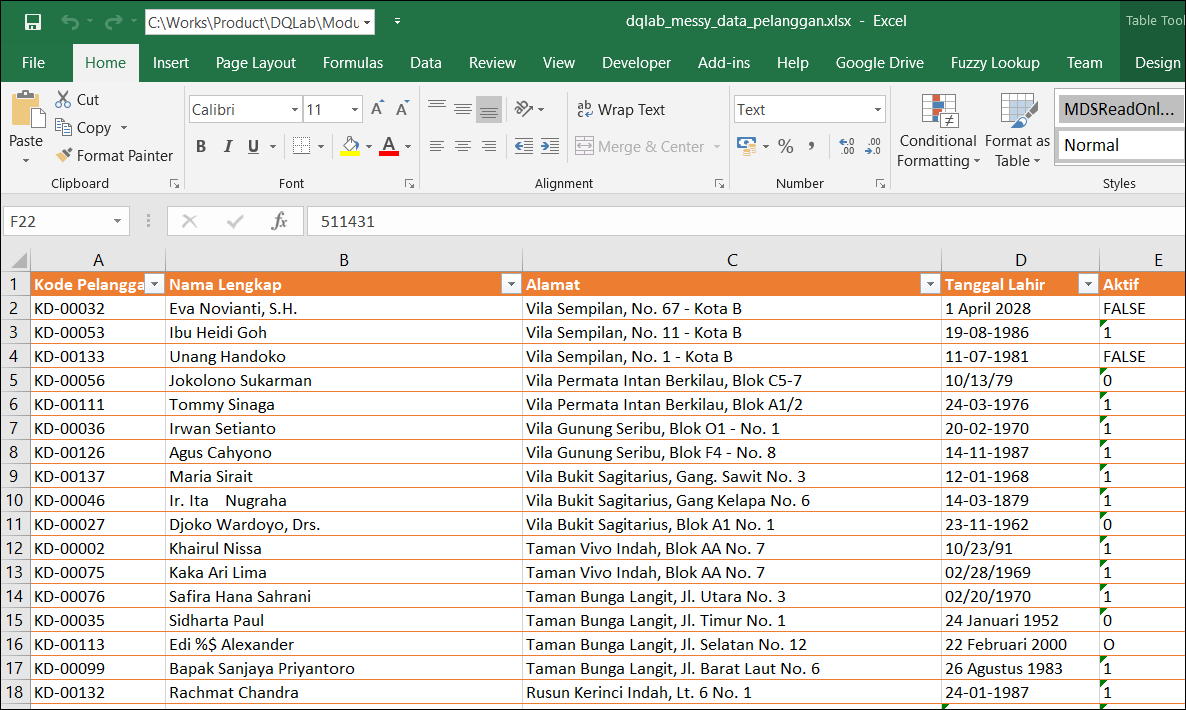



## [2] Kolom Kode Pelanggan
Kolom kode pelanggan adalah kolom identifikasi – yaitu kolom yang menjadi kunci pembeda antara baris data ini dengan baris data lainnya – di dalam dataset pelanggan.

Kolom identifikasi biasanya memiliki pola yang teratur, untuk dataset kita polanya adalah sebagai berikut.
- Memiliki prefix atau awalan teks yang fix bernilai "KD-"
- Memiliki suffix atau akhiran angka – dengan format lima digit angka.
- Karena pola yang fix tersebut, panjang total kolom tersebut adalah 8 karakter/digit.

Berikut adalah sebagian contoh data kode pelanggan.

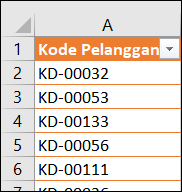

Namun pada baris tertentu ada pola yang tidak sesuai, dimana jumlah angka digit di belakang "KD-" hanya empat seperti terlihat pada screenshot berikut.

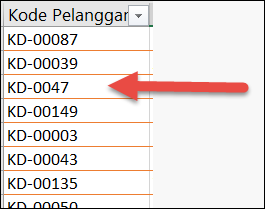

Dengan demikian, ada permasalahan inkonsitensi pola dengan panjang yang berbeda.

## [3] Kolom Nama Lengkap
Kolom Nama Lengkap adalah kolom kedua pada dataset dengan sebagian tampilan isinya adalah sebagai berikut.

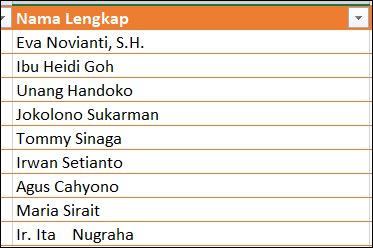

Disini terlihat ada contoh penulisan panggilan untuk data "Ibu Heidi Goh". Ini pada sebagian perusahaan tidak menjadi masalah, namun untuk industri perbankan yang mengharuskan standarisasi nama berdasarkan regulasi OJK (Otoritas Jasa Keuangan) – maka nama panggilan Ibu ini harus dihilangkan.

Kemudian terdapat spasi berlebih pada data dengan nama "Ir. Ita    Nugraha". Ini tentunya tidak standar secara umum.

Akan ada banyak permasalahan lain pada penulisan nama lengkap ini. Kita akan melakukan identifikasi lebih lanjut pada bab profiling.

## [4] Kolom Tanggal Lahir
Kolom Tanggal Lahir adalah kolom penting lainnya yang biasanya dipasangkan dengan nama untuk identifikasi individu. Sebagian tampilan isinya adalah sebagai berikut.

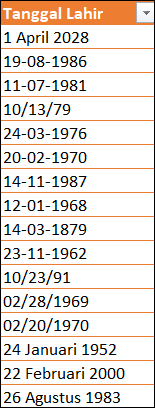

Disini sudah langsung terlihat masalahnya, yaitu ada beberapa pola yang penulisannya berbeda. Ada yang memiliki pemisah tanda minus (-) dan garis miring (/) dan penulisan nama bulan dan bukan angka pada sebagian data.

Selain itu ada tahun lahir pelanggan di 1879. Walaupun secara isi, data tersebut bisa dianggap tanggal yang valid. Namun secara bisnis, data tanggal lahir ini mungkin tidak logis dan butuh perbaiki.

Penulisan seperti ini sudah pasti perlu distandarisasi dan diperbaiki agar dapat diolah lebih lanjut untuk analisa.

## [5] Data Pelanggan yang Duplikat
Selain isi data yang tidak standar, ternyata dataset ini juga memiliki duplikat untuk pelanggan yang sama.

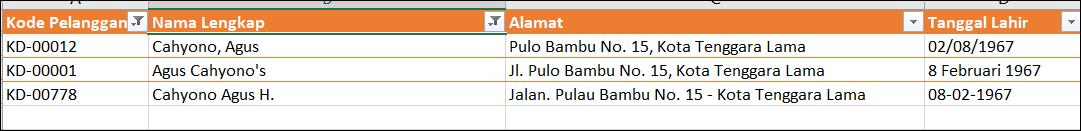

Terlihat tiga baris data dengan nama Agus Cahyono ini sebenarnya sama terlihat dari isi data Nama Lengkap, Alamat dan Tanggal Lahir. Hanya saja format penulisan semuanya berbeda.

Ini akan memiliki konsekusensi atau impact besar terhadap bisnis. Jika setiap pelanggan ini telah memiliki transaksi, maka kode-kode pelanggannya akan berbeda semua. Dan pada saat analisa data, maka seluruh data transaksi tersebut akan terpisah tiga dan nilai total tidak pernah didapatkan.

Dengan demikian, seluruh laporan transaksi untuk seorang Agus Cahyono akan lebih rendah dari seharusnya.

Dan jika ada program loyalty yang harusnya menyasar pelanggan dengan jumlah transaksi tertentu sebagai bentuk apresiasi dan menjual lebih, maka Agus Cahyono kemungkinan tidak akan terkena reach dan lost opportunity (kehilangan kesempatan) bagi bisnis.

Dengan demikian, akurasi laporan akan sangat rendah dan bisnis bisa mengambil keputusan yang salah.

Ini tentunya adalah tantangan besar dari sisi komputasi yang akan coba kita pecahkan dengan framework dan pengalaman dari DQLab pada enam bab ke depan.

## [6] Membaca dan review isi data file pelanggan
Dataset pelanggan berupa file Excel ini dapat dibaca dengan function read.xlsx seperti telah diperkenalkan pada course "Introduction to R", "Data Visualization with GGPlot2", dan "Data Wrangling Part 1".

In [7]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")
data.pelanggan

Kode.Pelanggan,Nama.Lengkap,Alamat,Tanggal.Lahir,Aktif,Kode.Pos,No.Telepon,Nilai.Belanja.Setahun
KD-00032,"Eva Novianti, S.H.","Vila Sempilan, No. 67 - Kota B",1 April 2028,FALSE,567130,085419651438216,1275600
KD-00053,Ibu Heidi Goh,"Vila Sempilan, No. 11 - Kota B",19-08-1986,1,567130,6282189517223455,317800
KD-00133,Unang Handoko,"Vila Sempilan, No. 1 - Kota B",11-07-1981,FALSE,567130,+6282952955586979,1537200
KD-00056,Jokolono Sukarman,"Vila Permata Intan Berkilau, Blok C5-7",10/13/79,0,876551,6289278629437370,1524700
KD-00111,Tommy Sinaga,"Vila Permata Intan Berkilau, Blok A1/2",24-03-1976,1,876551,084384621977881,655400
KD-00036,Irwan Setianto,"Vila Gunung Seribu, Blok O1 - No. 1",20-02-1970,1,876552,6285842418573681,1444400
KD-00126,Agus Cahyono,"Vila Gunung Seribu, Blok F4 - No. 8",14-11-1987,1,876552,089522699290044,350400
KD-00137,Maria Sirait,"Vila Bukit Sagitarius, Gang. Sawit No. 3",12-01-1968,1,877521,+6288389541238485,354600
KD-00046,Ir. Ita Nugraha,"Vila Bukit Sagitarius, Gang Kelapa No. 6",14-03-1879,1,877521,6288267903981205,541300
KD-00027,"Djoko Wardoyo, Drs.","Vila Bukit Sagitarius, Blok A1 No. 1",23-11-1962,0,877521,+6284871003581659,536000


In [23]:
data.pelanggan[5,]

,Kode.Pelanggan,Nama.Lengkap,Alamat,Tanggal.Lahir,Aktif,Kode.Pos,No.Telepon,Nilai.Belanja.Setahun
5,KD-00111,Tommy Sinaga,"Vila Permata Intan Berkilau, Blok A1/2",24-03-1976,1,876551,084384621977881,655400


## [7] Profil sederhana dataset dengan function str
Pembacaan dataset secara keseluruhan biasanya tidak selalu diperlukan. Kita lebih banyak kepentingan melihat ringkasan informasi dari data tersebut, misalkan berapa jumlah baris data yang ada.

Dan function str cukup untuk memenuhi kepentingan tersebut. Disiplinkan diri untuk selalu menggunakan function str ini pada saat mengolah data dengan R.

In [8]:
library(openxlsx)
library(bpa)

#Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

#Menampilkan struktur variable data.pelanggan
str(data.pelanggan)

'data.frame':	155 obs. of  8 variables:
 $ Kode.Pelanggan       : chr  "KD-00032" "KD-00053" "KD-00133" "KD-00056" ...
 $ Nama.Lengkap         : chr  "Eva Novianti, S.H." "Ibu Heidi Goh" "Unang Handoko" "Jokolono Sukarman" ...
 $ Alamat               : chr  "Vila Sempilan, No. 67 - Kota B" "Vila Sempilan, No. 11 - Kota B" "Vila Sempilan, No. 1 - Kota B" "Vila Permata Intan Berkilau, Blok C5-7" ...
 $ Tanggal.Lahir        : chr  "1 April 2028" "19-08-1986" "11-07-1981" "10/13/79" ...
 $ Aktif                : chr  "FALSE" "1" "FALSE" "0" ...
 $ Kode.Pos             : chr  "567130" "567130" "567130" "876551" ...
 $ No.Telepon           : chr  "085419651438216" "6282189517223455" "+6282952955586979" "6289278629437370" ...
 $ Nilai.Belanja.Setahun: num  1275600 317800 1537200 1524700 655400 ...


## [8] Kesimpulan
Sepanjang course ini, kita akan banyak bekerja dengan data cleansing dan memerlukan contoh dataset yang komprehensif.

DQLab membuat dataset pelanggan yang cukup berantakan. Beberapa permasalahan sudah terlihat dari screenshot dan deskripsi yang diberikan pada bab ini. Walaupun yang dibahas adalah kolom Kode Pelanggan, Nama Lengkap dan Tanggal Lahir dan duplikat data, namun kolom lainnya juga tidak terhindar dari masalah yang memerlukan data cleansing.

Permasalahan data seperti ini hampir sulit dihindari, walaupun sudah dicoba dengan pengembangan sistem entri yang baik – karena dari pengalaman kami dinamika bisnis lebih cepat dibandingkan dinamika pengembangan sistem entri terkomputerisasi.

Selain itu, menyangkut data pelanggan – ini biasanya perlu integrasi dari beberapa sistem seperti ERP (Enterprise Resource Planning), core banking, CRM (Customer Relationship Management) yang kemungkinan besar memiliki standar penulisan yang berbeda.

Klik tombol Next untuk melanjutkan ke bab berikutnya – dimana kita akan melakukan identifikasi pola data untuk menemukan potensi permasalahan pada dataset kita.

# Data Profiling
Data profiling adalah tahap awal untuk melakukan data cleansing. Di dalam proses ini melakukan aktifitas yang sederhana tapi penting.

## [1] Apa itu Data Profiling?
Data profiling adalah tahap awal untuk melakukan data cleansing. Di dalam proses ini melakukan aktifitas yang sederhana tapi penting :
- Kita akan mengidentifikasi pola-pola yang terdapat pada suatu kolom data.
- Dan membandingkannya dengan ekspektasi atau ukuran scientific yang wajar, untuk menemukan data yang perlu diperbaiki.

Teknik profiling bisa dilakukan dengan banyak cara, namun yang pasti secara umum akan menelusuri keseluruhan data.

Karena pola bisa banyak macam, kita akan memfokuskan profiling pada isi data dengan pola teks sederhana namun cukup efektif.

Agar dapat dipraktekkan dengan riil, secara spesifik kita akan menggunakan function dan operator berikut sepanjang bab ini.
- Function summary dari paket bawaan R.
- Function basic_pattern_analysis dari library bpa di R.
- Menggunakan operator == dan function grepl untuk menarik data untuk pola hasil temuan.

## [2] Menggunakan function summary
Jika pada Data Wrangling part 1 kita menggunakan function str untuk melihat struktur dan isi data, pada bab ini kita memperkenalkan function lain yaitu __summary__.

Function __summary__ adalah function yang akan memberikan ringkasan singkat data dengan menganalisa isi data.

Penggunaan function summary cukup sederhana, cukup satu objek yang ingin dianalisa.

> summary(objek)

Berbeda dengan output str, output dari summary ini akan berbeda untuk tiap tipe dari objek.
- Untuk tipe data numerik, maka summary akan memberikan nilai minimum, maksimum, median, mean, dan lain-lain.
- Untuk tipe data character akan melaporkan tipe data dan panjang saja.
- Untuk tipe data factor akan berisi mengenai nilai-nilai factor dan jumlah kemunculan data tersebut (frekuensi).

In [9]:
#Load library openxlsx
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

# Menggunakan function summary
summary(data.pelanggan)

 Kode.Pelanggan     Nama.Lengkap          Alamat          Tanggal.Lahir     
 Length:155         Length:155         Length:155         Length:155        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    Aktif             Kode.Pos          No.Telepon        Nilai.Belanja.Setahun
 Length:155         Length:155         Length:155         Min.   : 237400      
 Class :character   Class :character   Class :character   1st Qu.: 504800      
 Mode  :character   Mode  :character   Mode  :character   Median : 851600      
                                                          Mean  

## [3] Konversi factor dan hasil summary untuk kolom Aktif
Output summary sejauh ini tidak menceritakan banyak hal mengenai kondisi data kita, seluruhnya dibaca sebagai character dan tambahan informasi hanya length.

Kembali ke "Data Wrangling with R – Part 1", factor adalah tipe data yang dapat membantu. Pada praktek kali ini kita coba konversi kolom Aktif menjadi factor dan kita jalankan kembali fungsi summary.

In [10]:
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

# Merubah data.pelanggan$Aktif menjadi factor
data.pelanggan$Aktif <- as.factor(data.pelanggan$Aktif)

# Menggunakan function summary
summary(data.pelanggan)

 Kode.Pelanggan     Nama.Lengkap          Alamat          Tanggal.Lahir     
 Length:155         Length:155         Length:155         Length:155        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Aktif      Kode.Pos          No.Telepon        Nilai.Belanja.Setahun
 -    : 1   Length:155         Length:155         Min.   : 237400      
 0    :23   Class :character   Class :character   1st Qu.: 504800      
 1    :98   Mode  :character   Mode  :character   Median : 851600      
 FALSE:13                                         Mean   : 857227      
 I    : 1               

## [4] Summary untuk factor kolom lain
Pada praktek kali ini – dengan summary factor yang lebih bisa menceritakan kondisi data – kita akan melakukan konversi sisa kolom character lain ke dalam factor.

In [11]:
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

# Merubah kolom data selain Nilai.Belanja.Setahun menjadi factor
data.pelanggan$Kode.Pelanggan <- as.factor(data.pelanggan$Kode.Pelanggan)
data.pelanggan$Nama.Lengkap <- as.factor(data.pelanggan$Nama.Lengkap)
data.pelanggan$Alamat <- as.factor(data.pelanggan$Alamat)
data.pelanggan$Tanggal.Lahir <- as.factor(data.pelanggan$Tanggal.Lahir)
data.pelanggan$Aktif <- as.factor(data.pelanggan$Aktif)
data.pelanggan$Kode.Pos <- as.factor(data.pelanggan$Kode.Pos)
data.pelanggan$No.Telepon <- as.factor(data.pelanggan$No.Telepon)

# Menggunakan function summary
summary(data.pelanggan) 

  Kode.Pelanggan                   Nama.Lengkap
 KD-00001:  1    Abdul Kadir             :  2  
 KD-00002:  1    Bapak Sanjaya Priyantoro:  2  
 KD-00003:  1    Budi Setiawan           :  2  
 KD-00004:  1    Budi Yahya              :  2  
 KD-00005:  1    dr. Yati Octavianus     :  2  
 KD-00006:  1    Rachmat Chandra         :  2  
 (Other) :149    (Other)                 :143  
                                   Alamat             Tanggal.Lahir   Aktif   
 Bukit Vivo Indah, Blok C 2/4         :  2   02/28/1969      :  5   -    : 1  
 Jl. Bintang Supernova, No. 78        :  2   01/01/01        :  4   0    :23  
 Jl. Pulau Sentosa No. 133            :  2   01/31/01        :  3   1    :98  
 Jl. Puri Arteri Raya, No. 88 - Kota T:  2   13-11-1962      :  3   FALSE:13  
 Kompleks Pelaut Tangguh, No. 5A      :  2   19 Maret 1950   :  3   I    : 1  
 Perum Bimasakti Raya, Blok A No. 10  :  2   30 November 1954:  3   O    : 2  
 (Other)                              :143   (Other)         :1

## [5] Menggunakan library 'bpa'
Profiling dengan function summary terlihat cukup berguna untuk mengidentifikasi data numerik dan sebaran nilai di factor.

Namun untuk mengidentifikasi pola teks yang benar seperti keharusan prefix dua alfabet, diikuti tanda – dan terakhir dengan 5 angka digit pada kolom Kode Pelanggan, summary tidak dapat mengeluarkan hal tersebut.

Untuk menganalisa pola seperti ini kita dapat menggunakan library bpa (Basic Pattern Analysis).

## [6] Menggunakan function basic_pattern_analysis
Function untuk mengidentifikasi pola yang akan kita gunakan adalah basic_pattern_analysis dengan syntax yang akan kita gunakan sebagai berikut.

> basic_pattern_analysis(x= objek)

Dimana x adalah berupa objek angka, character, vector angka, vector character atau data frame. Untuk kasus kita, maka x adalah variable dari hasil pembacaan dataset pelanggan.

Output dari function ini adalah pengenalan karakter per karakter menjadi simbol berikut :
- Tiap huruf besar A s/d Z akan direpresentasikan oleh huruf A.
- Tiap huruf kecil a s/d z akan direpresentasikan oleh huruf a.
- Tiap angka 0 s/d 9 akan direpresentasikan oleh angka 9.
- Spasi dan tab akan direpresentasikan oleh huruf w.
- Semua simbol akan direpresentasikan oleh dirinya sendiri. Contoh: tanda minus (-) akan tetap direpresentasikan dengan tanda minus (-).
- Missing value NA akan direpresentasikan oleh NA.
- NaN (Not a Number) akan direpresentasikan sebagai "AaA".

Sebagai contoh, jika kita identifikasi pola teks "DQLab" dengan fungsi basic_pattern_analysis sebagi berikut :
> basic_pattern_analysis(x="DQLab")

akan menghasilkan output sebagai berikut:
> [1] "AAAaa"

Dimana [1] adalah tampilan index, sedangkan teks "AAAaa" adalah identifikasi pola tiga huruf besar diikuti dua huruf kecil.

Contoh lain, jika kita masukkan
> basic_pattern_analysis(x="17 Agustus 1945")

akan menghasilkan output sebagai berikut :
> [1] "99wAaaaaaaw9999"

Dimana [1] adalah tampilan index, sedangkan teks "99wAaaaaaaw9999" adalah identifikasi pola dua angka, satu spasi, satu huruf besar, enam huruf kecil, satu spasi, dan empat angka.

In [12]:
library(bpa)

# Menggunakan function basic_pattern_analysis
basic_pattern_analysis(x="DQLab")
basic_pattern_analysis(x="17 Agustus 1945")
basic_pattern_analysis(x=3.14)

[1] "AAAaa"

[1] "99wAaaaaaaw9999"

[1] "9.99"

## [7] Profiling terhadap vector
Selain satu teks, function basic_pattern_analysis juga bisa digunakan untuk vector seperti pada contoh berikut.

> basic_pattern_analysis(c("KD-001", "DQLab", "KD-002"))

Parameter x pada praktek sebelumnya tidak perlu dimasukkan lagi dalam hal ini. Dan output dari perintah di atas adalah sesuai urutan vector seperti berikut.

> [1] "AA-999" "AAAaa" "AA-999"

Terlihat teks pertama dan ketiga polanya sama, sedangkan teks kedua berbeda sendiri.

In [13]:
library(openxlsx)
library(bpa)

# Menggunakan function basic_pattern_analysis
basic_pattern_analysis(c("KD-008", "012345", "KD-010"))

[1] "AA-999" "999999" "AA-999"

## [8] Menggunakan parameter unique_only=TRUE
Kembali pada contoh pada lesson sebelumnya sebagai berikut.

> basic_pattern_analysis(c("KD-001", "DQLab", "KD-002"))

Yang menghasilkan output berikut.

> [1] "AA-999" "AAAaa" "AA-999"

Dimana terdapat dua pola yang sama. Tampilan pola dengan data satu per satu seperti ini masih bisa kita identifikasi karena kebetulan cuma tiga data.

Bagaimana jika datanya berjumlah puluhan bahkan ribuan? Tentunya akan lebih sulit proses identifikasinya mana pola yang sama atau berulang. Akan lebih bagus jika ada ringkasan informasi seperti summary di atas […]

Beruntung function ini juga memiliki parameter unique_only yang jika diberikan nilai TRUE akan memberikan pola yang unik saja dan jumlah dari masing-masing pola yang teridentifikasi.

Contoh pengunaannya dengan modifikasi perintah di atas jadinya adalah sebagai berikut:

> basic_pattern_analysis(c("KD-001", "DQLab", "KD-002"), unique_only=TRUE)

Kali ini perintahnya akan menghasilkan output sebagai berikut.

> AA-999  AAAaa      2      1

Dengan pola yang teridentifikasi adalah sebagai berikut:
- AA-999 muncul sebanyak 2 kali.
- AAAaa muncul sebanyak 1 kali.

Dengan informasi dari frekuensi ini, kita bisa mengidentifikasi distribusi pola yang tidak umum atau anomali.

In [14]:
library(bpa)

# Menggunakan function basic_pattern_analysis
basic_pattern_analysis(c("KD-008", "012345", "KD-010"), unique_only=TRUE)


999999 AA-999 
     1      2 

## [9] Profiling terhadap kolom Kode Pelanggan
Pada bab pengenalan dataset, telah diinformasikan bahwa kolom Kode Pelanggan memiliki pola yang berbeda – atau pola tidak standar atau anomali yang harus diperbaiki.

Pertanyaannya, bagaimana kita mencarinya dan berapa banyak jumlah anomali ini?

Jawabannya adalah dengan function basic_pattern_analysis yang telah kita gunakan di dua praktek sebelum ini, namun kali ini kita menggunakan input berupa kolom Kode.Pelanggan dari data.frame.

Berikut adalah contoh penggunaannya:

> basic_pattern_analysis(data.pelanggan$Kode.Pelanggan, unique_only = TRUE)

dimana:
- pelanggan adalah variable bertipe data.frame dari hasil pembacaan file pelanggan
- pelanggan$Kode.Pelanggan adalah kolom Kode.Pelanggan dari variable data.pelanggan
- unique_only = TRUE adalah parameter

Untuk mencoba function ini dan melihat hasil apa yang akan diperoleh, kita coba lakukan tugas praktek berikut.

Catatan: Kolom kode.pelanggan tidak perlu dikonversi menjadi factor untuk menggunakan function basic_pattern_analysis.

In [15]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

# Menggunakan function basic_pattern_analysis pada kolom Kode.Pelanggan
basic_pattern_analysis(data.pelanggan$Kode.Pelanggan, unique_only = TRUE)


 AA-9999 AA-99999 
       1      154 

Terlihat ada dua pola yang teridentifikasi yaitu "AA-9999" dengan jumlah data hanya 1, dan pola "AA-99999" dengan jumlah sebanyak 154 data.

Dengan melihat fungsi kolom Kode Pelanggan yang merupakan kolom identifikasi dan harusnya memiliki pola yang konsisten, satu diantara 154 data ini tentunya adalah anomali atau outlier.

Pada praktek berikutnya, kita akan melakukan filter terhadap dataset telah kita identifikasi pola outlier-nya.

## [10] Filter Data dengan pola anomali
Pada praktek praktek "Profiling terhadap kolom Kode Pelanggan", kita telah mendapatkan pola anomali yaitu "AA-9999". Tahap berikutnya adalah bagaimana mengambil porsi dari dataset pelanggan dengan pola ini.

Ada dua proses, yaitu pertama membandingkan seluruh pola dengan teks anomali menggunakan operator == (tanda sama dengan ganda).

Bentuk penggunaannya sebagai berikut.
> basic_pattern_analysis(data.pelanggan$Kode.Pelanggan)=="AA-9999"

Perintah ini akan menghasilkan daftar nilai TRUE/FALSE – dimana hasil akan TRUE jika operator == menemukan teks yang sama, FALSE jika sebaliknya, yaitu sebagai berikut.

In [16]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

basic_pattern_analysis(data.pelanggan$Kode.Pelanggan)=="AA-9999"

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Perhatikan bahwa hanya ada satu nilai TRUE dari seluruh data yang ditelusuri oleh operator ==.

Proses selanjutnya adalah menggunakan daftar nilai TRUE/FALSE ini untuk melakukan filter dengan konstruksi berikut.

> data.pelanggan[ daftar_nilai_true, ]

dimana data.pelanggan diikuti dengan indeks hasil scan diikuti tanda koma (,). Sehingga konstruksi selengkapnya ditulis sebagai berikut.

> data.pelanggan[ basic_pattern_analysis(data.pelanggan$Kode.Pelanggan)=="AA-9999" , ]

In [17]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

# Mengambil dataset yang memiliki pola teks "AA-9999" di kolom Kode.Pelanggan
data.pelanggan[ basic_pattern_analysis(data.pelanggan$Kode.Pelanggan)=="AA-9999" , ]

,Kode.Pelanggan,Nama.Lengkap,Alamat,Tanggal.Lahir,Aktif,Kode.Pos,No.Telepon,Nilai.Belanja.Setahun
51,KD-0047,Puspita Citra,"Perum Bimasakti Raya, Blok A No. 10",19 Maret 1950,1,764450,+6282793268821143,950200


Berikut adalah keterangan detil dari hasil tersebut.

| Komponen | Keterangan |
| :------- | :--------- |
| 51 | Posisi data yang ditemukan ada pada baris ke 51. |
| Kode.Pelanggan <br>KD-0047 | Detil data dimana kolom Kode.Pelanggan dari data yang ditemukan memiliki nilai KD-0047 |
| Nama.Lengkap <br>Puspita Citra | Detil data dimana kolom Nama.Lengkap dari data yang ditemukan memiliki nilai Puspita Citra |
| Alamat <br>Perum Bimasakti Raya, Blok A No. 10 | Detil data dimana kolom Alamat dari data yang ditemukan memiliki nilai Perum Bimasakti Raya, Blok A No. 10 |
| Tanggal.Lahir <br>19 Maret 1950 | Detil data dimana kolom Tanggal.Lahir dari data yang ditemukan memiliki nilai 19 Maret 1950 |
| dst... | dst... |

## [11] Profiling terhadap kolom Nama
Melanjutkan profiling kita, praktek kali ini kita akan memfokuskan diri pada kolom __Nama.Lengkap__ dengan masih menggunakan function yang sama.

Nah, pada praktek kali ini kita juga akan memberikan satu tip, disini kita akan mengambil kolom tersebut bukan dengan mencantumkan __Nama.Lengkap__, tapi dengan __Nama__ saja.

Ini memungkinkan karena kolom dengan awalan __Nama__ hanya ada satu. Sebagai perbandingan, kalau mencamtumkan __Kode__ tidak akan bisa karena awalan __Kode__ ada di dua kolom, yaitu __Kode.Pelanggan__ dan __Kode.Pos__.

In [18]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx",sheet="Pelanggan")

# Menggunakan function basic_pattern_analysis pada kolom Nama
basic_pattern_analysis(data.pelanggan$Nama, unique_only = TRUE)


                           A.wAaaaaaaa                      AA.wAaaaaawAaaaaa 
                                     1                                      1 
                     AA.wAaaaawAaaaaaa                    aa.wAaaawAaaaaaaaaa 
                                     1                                      2 
                    Aa.wAaawwwwAaaaaaa                                    Aaa 
                                     1                                      1 
               AAA.wAaaaawAaaaaaaaaaaa                   AAA.wAaaawAaaaaaaaaa 
                                     1                                      1 
                                 Aaaaa                                Aaaaaaa 
                                     2                                      5 
                         Aaaaaaa,wAaaa                               Aaaaaaaa 
                                     1                                      1 
                      AaaaaaaaaaawAaaa             

Terlihat ada pola nama yang mengandung 9. Ini artinya pada nama tersebut mengandung angka, sesuatu yang tidak lazim.

## [12] Perkenalan function grepl
Teknik filtering dengan menggunakan operator == hanya dapat digunakan untuk mengenal teks yang spesifik dan sama persis. Sebagai contoh kita ingin mencari pola "AA-9999".

Jika ingin mencari teks yang mengandung karakter tertentu di dalamnya,  seperti pada kasus profiling __Nama__ – kita ingin mencari teks yang mengandung karakter tapi bukan huruf. Ini tentunya akan banyak pola yang bisa terjadi, misalkan "Aaaaaaaa", "AaaaaawAA", dan lain-lain.

Jika dilakukan demikian, bentuk filteringnya adalah daftar teks yang akan panjang sekali dan belum tentu benar. Kita tidak menginginkan hal tersebut, tapi kita ingin kepastian akan satu mekanisme filtering yang pasti benar dan tidak merepotkan?

Untuk hal ini perlu penyaringan menggunakan konstruksi bernama __regular expression (regex)__ dan diimplementasikan di R dengan function bernama __grepl__.

Function __grepl__ digunakan untuk menyaring suatu data berdasarkan pola regex. Regex adalah suatu bahasa yang sangat lengkap untuk mendeteksi pola teks yang beragam.

Regex juga sangat kompleks, dan agar menjaga fokus di course ini maka kita tidak akan membahas regex secara mendalam. Tapi sebagai gantinya, akan diberikan penjelasan apa yang dilakukan oleh pola regex yang diberikan sebagai petunjuk untuk melakukan filter.

Penggunaan function grepl adalah sebagai berikut:
> grepl(pattern = __pola_pattern_regex__, x = __data__)

dimana:
- __pola_pattern_regex__ : adalah pola regular expression (regex) yang dapat digunakan untuk filter data.
- __data__ : adalah data berupa __teks__ atau vector dari character.

Hasil output dari grepl adalah nilai TRUE jika ada pola yang terdapat di dalam teks / data, sebaliknya FALSE jika tidak ada pola yang terdapat di dalam teks / data.

Berikut adalah beberapa pola regex dan penjelasannya.

| Pola regex | Apa yang dilakukan | Penjelasan Detil |
| :--------- | :----------------- | :--------------- |
| [a] | Mencari karakter a di dalam teks | [] = adalah character class, dimana kumpulan karakter yang akan dicari dikumpulkan di tanda kurung siku ini <br>a = karakter a |
| aa | Mencari dua karakter a berurutan di dalam teks | aa = dua karakter a berurutan |
| [ab] | Mencari karakter a atau b di dalam teks | [] = adalah character class, dimana kumpulan karakter yang akan dicari dikumpulkan di tanda kurung siku ini <br>ab = karakter a atau b |
| [^a] | Mencari karakter bukan a di dalam teks | [] = adalah character class, dimana kumpulan karakter yang akan dicari dikumpulkan di tanda kurung siku ini <br>^ = tanda ^ sebelum karakter merupakan tanda negasi (bukan) <br>^a = bukan karakter a |
| [^ab] | Mencari karakter yang bukan  a dan b dalam teks | [] = adalah character class, dimana kumpulan karakter yang akan dicari dikumpulkan di tanda kurung siku ini <br>^ = tanda ^ sebelum karakter merupakan tanda negasi (bukan) <br>^a = bukan karakter a |

In [19]:
grepl(pattern="[a]", x="pelanggan")
grepl(pattern="[^a]", x="pelanggan")
grepl(pattern="[bc]", x="pelanggan")
grepl(pattern="[^bc]", x="pelanggan")
grepl(pattern="[s]", x="pelanggan")
grepl(pattern="[^s]", x="pelanggan")
grepl(pattern="aa", x="pelanggan")

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

Berikut keterangan hasil-hasilnya

| Perintah  | Hasil | Penjelasan Detail |
| :-- | :-- | :-- |
| grepl(pattern="[a]", "pelanggan") | TRUE | Teks "pelanggan" mengandung karakter "a" |
| grepl(pattern="[^a]", "pelanggan") | TRUE | Teks "pelanggan" mengandung karakter bukan "a" seperti "p", "e", "l", "n", "g" |
| grepl(pattern="[bc]", "pelanggan") | FALSE | Teks "pelanggan" tidak mengandung karakter "b" ataupun "c" |
| grepl(pattern="[^bc]", "pelanggan") | TRUE | Teks "pelanggan" mengandung karakter bukan "b" dan "c" |
| grepl(pattern="[s]", "pelanggan") | FALSE | Teks "pelanggan" tidak mengandung karakter "s" |
| grepl(pattern="[^s]", "pelanggan") | TRUE | Teks "pelanggan" mengandung karakter bukan "s" |
| grepl(pattern="aa", "pelanggan") | FALSE | Teks "pelanggan" tidak mengandung dua karakter "a" secara berurutan |

## [13] Menemukan nama yang mengandung karakter tidak lazim
Dengan mengenal function grepl pada satu praktek sebelum ini, kita sudah siap untuk melakukan filter terhadap hasil profiling dari kolom Nama – dimana isi yang tidak lazim untuk suatu nama kita perlu temukan.

Langkah pertama, tentunya kita perlu mendefinisikan apa yang disebut tidak lazim?

Secara sederhana kita dapat mengatakan nama tidak lazim bila :
- Mengandung karakter bukan huruf, spasi, titik dan koma.
- Memiliki spasi lebih dari satu secara berurutan.

Dengan menggunakan simbol pola dari library bpa, maka definisi di atas dapat dimodelkan sebagai berikut dalam regex :
- [^Aaw.,]
- ww

Dan jika menggunakan grepl, maka konstruksinya adalah sebagai berikut :
- grepl(pattern="[^Aaw.,]", x=basic_pattern_analysis(data.pelanggan\$Nama))
- grepl(pattern="ww", x=basic_pattern_analysis(data.pelanggan\$Nama))

In [20]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Menggunakan function grepl untuk mengambil pola nama tidak lazim
data.pelanggan[grepl(pattern="[^Aaw.,]", x=basic_pattern_analysis(data.pelanggan$Nama)),]
data.pelanggan[grepl(pattern="ww", x=basic_pattern_analysis(data.pelanggan$Nama)),]

,Kode.Pelanggan,Nama.Lengkap,Alamat,Tanggal.Lahir,Aktif,Kode.Pos,No.Telepon,Nilai.Belanja.Setahun
15,KD-00113,Edi %$ Alexander,"Taman Bunga Langit, Jl. Selatan No. 12",22 Februari 2000,O,712984,6281413705348345,311000
36,KD-00010,"Ibu Sri Wahyuni@, IR","Perum Venus, Gg. Harimau No. 1A",23 Oktober 1991,1,987453,6284079659289143,389400
50,KD-00039,Joko Wiryanto Abadi (Pelanggan OKE),"Perum Indah Supernova II, No. 9",05-09-1990,1,764449,6289122766908102,1086300
68,KD-00005,Prihatin Setyonugroho (021-5555555544),"Jln. Tegal Sari Indah, No. D87 -- Kota H",19 Agustus 1986,1,476511,6286843623971825,1488900
70,KD-00001,Agus Cahyono's,"Jl. Pulo Bambu No. 15, Kota Tenggara Lama",8 Februari 1967,1,876511,08298911112222,1082900
88,KD-00063,Widianto Nuryajaya - 08222222999111),"Jl. Macan Buntung, No. 4F",29-02-1969,1,768091,6285463027900499,1100200
107,KD-00120,Dewi Sr|yani,"Jalan Ring Road Konstan, No. 5",11/29/1967,TRUE,567120,+6285239934324639,273400


,Kode.Pelanggan,Nama.Lengkap,Alamat,Tanggal.Lahir,Aktif,Kode.Pos,No.Telepon,Nilai.Belanja.Setahun
9,KD-00046,Ir. Ita Nugraha,"Vila Bukit Sagitarius, Gang Kelapa No. 6",14-03-1879,1,877521,6288267903981205,541300
35,KD-00117,Florensia Novianti,"Perumahan Bina Andromeda, Jl. Salmon No. 22",19/08/1950,0,987452,6283166638654813,854400
145,KD-00108,Ibu Jujur Suwito,"Apartement Clifften, Lantai 12 No. 3",02/28/1969,1,768035,6284037884325249,851600


Dari hasil di atas, dari syarat pertama ketidaklaziman data nama, ternyata ada 7 data yang ditemukan pada baris 15, 36, 50, 68, 70, 88, dan 107.

Selain itu, dari syarat kedua ketidaklaziman data nama, ternyata ada 3 data yang ditemukan pada baris 9, 35, dan 145.

## [14] Profiling terhadap seluruh kolom
Akan lebih tepat jika kita tetap melakukan profiling per tiap kolom. Tapi function __basic_pattern_analysis__ juga dapat melakukan untuk seluruh kolom dari data.frame Pelanggan.

Untuk melakukan hal ini, kita gunakan input data.frame langsung di dalam function __basic_pattern_analysis__.

In [24]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Profiling pola seluruh kolom
basic_pattern_analysis(data.pelanggan)

Kode.Pelanggan,Nama.Lengkap,Alamat,Tanggal.Lahir,Aktif,Kode.Pos,No.Telepon,Nilai.Belanja.Setahun
AA-99999,"AaawAaaaaaaa,wA.A.","AaaawAaaaaaaa,wAa.w99w-wAaaawA",9wAaaaaw9999,AAAAA,999999,999999999999999,9999999
AA-99999,AaawAaaaawAaa,"AaaawAaaaaaaa,wAa.w99w-wAaaawA",99-99-9999,9,999999,9999999999999999,999999
AA-99999,AaaaawAaaaaaa,"AaaawAaaaaaaa,wAa.w9w-wAaaawA",99-99-9999,AAAAA,999999,+9999999999999999,9999999
AA-99999,AaaaaaaawAaaaaaaa,"AaaawAaaaaaawAaaaawAaaaaaaa,wAaaawA9-9",99/99/99,9,999999,9999999999999999,9999999
AA-99999,AaaaawAaaaaa,"AaaawAaaaaaawAaaaawAaaaaaaa,wAaaawA9/9",99-99-9999,9,999999,999999999999999,999999
AA-99999,AaaaawAaaaaaaa,"AaaawAaaaaawAaaaaa,wAaaawA9w-wAa.w9",99-99-9999,9,999999,9999999999999999,9999999
AA-99999,AaaawAaaaaaa,"AaaawAaaaaawAaaaaa,wAaaawA9w-wAa.w9",99-99-9999,9,999999,999999999999999,999999
AA-99999,AaaaawAaaaaa,"AaaawAaaaawAaaaaaaaaa,wAaaa.wAaaaawAa.w9",99-99-9999,9,999999,+9999999999999999,999999
AA-99999,Aa.wAaawwwwAaaaaaa,"AaaawAaaaawAaaaaaaaaa,wAaaawAaaaaawAa.w9",99-99-9999,9,999999,9999999999999999,999999
AA-99999,"AaaaawAaaaaaa,wAaa.","AaaawAaaaawAaaaaaaaaa,wAaaawA9wAa.w9",99-99-9999,9,999999,+9999999999999999,999999


## [15] Menggabungkan hasil profiling ke dalam dataset awal
Data pola yang sudah kita dapatkan di praktek terakhir akan menarik jika digabungkan kembali ke sumber data asal, terutama untuk dua alasan berikut :
- Kita tidak perlu scan berulang-ulang untuk mendapatkan nama dengan pola tertentu, ini akan menghemat resource komputasi terutama jika datanya sangat besar. Cukup memfilter kolom pola terkait.
- Hasil penggabungan menjadi dataset baru yang bisa kita olah dengan aplikasi lain misalkan Excel atau SQL – dimana kita saat ini lebih terbiasa.

Tiga langkah proses penggabungan ini adalah sebagai berikut:
- Melakukan profiling terhadap seluruh kolom dari variable __data.pelanggan__ dan disimpan ke variable baru, pada contoh berikut namanya adalah __pola.data.pelanggan__.
> pola.data.pelanggan <- basic_pattern_analysis(data.pelanggan)

- Mengganti nama-nama kolom pada variable pola.data.pelanggan dengan menambahkan prefix "Pola." dengan perintah berikut.
> names(pola.data.pelanggan)<-paste("Pola",names(pola.data.pelanggan),sep=".")

- Menggabungkan kedua data.frame data.pelanggan dan pola.data.pelanggan dengan function cbind, dan disimpan kembali ke variable __data.pelanggan__.
> data.pelanggan <- cbind(data.pelanggan, pola.data.pelanggan)

Kita akan lakukan langsung praktek untuk melihat hasil akhir.

In [25]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Melakukan profiling terhadap seluruh kolom data.pelanggan 
pola.data.pelanggan <- basic_pattern_analysis(data.pelanggan)

# Merubah nama kolom
names(pola.data.pelanggan)<-paste("Pola",names(pola.data.pelanggan),sep=".")

# Menggabungkan dua data.frame
data.pelanggan <- cbind(data.pelanggan, pola.data.pelanggan)

#Menampilkan struktur
str(data.pelanggan)

'data.frame':	155 obs. of  16 variables:
 $ Kode.Pelanggan            : chr  "KD-00032" "KD-00053" "KD-00133" "KD-00056" ...
 $ Nama.Lengkap              : chr  "Eva Novianti, S.H." "Ibu Heidi Goh" "Unang Handoko" "Jokolono Sukarman" ...
 $ Alamat                    : chr  "Vila Sempilan, No. 67 - Kota B" "Vila Sempilan, No. 11 - Kota B" "Vila Sempilan, No. 1 - Kota B" "Vila Permata Intan Berkilau, Blok C5-7" ...
 $ Tanggal.Lahir             : chr  "1 April 2028" "19-08-1986" "11-07-1981" "10/13/79" ...
 $ Aktif                     : chr  "FALSE" "1" "FALSE" "0" ...
 $ Kode.Pos                  : chr  "567130" "567130" "567130" "876551" ...
 $ No.Telepon                : chr  "085419651438216" "6282189517223455" "+6282952955586979" "6289278629437370" ...
 $ Nilai.Belanja.Setahun     : num  1275600 317800 1537200 1524700 655400 ...
 $ Pola.Kode.Pelanggan       : Factor w/ 2 levels "AA-9999","AA-99999": 2 2 2 2 2 2 2 2 2 2 ...
 $ Pola.Nama.Lengkap         : Factor w/ 85 levels "A.wAaaaaa

Dengan hasil perintah str di atas, kita dapat mengambil kesimpulan penggabungan telah berhasil dilakukan dimana kolom-kolom beprefix "Pola" telah digabungkan dan isinya konsisten dengan keluaran function __basic_pattern_analysis__.

## [16] Menuliskan hasil ke dalam file Excel
Pada praktek kali ini kita akan menggunakan fitur tersebut dengan menuliskan data hasil penggabungan data source dan profile.

Perintah penulisan file yang kita gunakan adalah write.xlsx dengan contoh perintah sebagai berikut :

> write.xlsx(data.pelanggan, file="data.pelanggan.xlsx")

yang jika dijalankan akan menulis satu file bernama data.pelanggan.xlsx dengan isi variable data.pelanggan.

Kita akan lakukan langsung praktek untuk melakukan hal ini.

In [26]:
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Melakukan profiling terhadap seluruh kolom data.pelanggan 
pola.data.pelanggan <- basic_pattern_analysis(data.pelanggan)

# Merubah nama kolom
names(pola.data.pelanggan)<-paste("Pola",names(pola.data.pelanggan),sep=".")

# Menggabungkan dua data.frame
data.pelanggan <- cbind(data.pelanggan, pola.data.pelanggan)

# Menulis File Excel
write.xlsx(data.pelanggan, file="data.pelanggan.xlsx")

Note: zip::zip() is deprecated, please use zip::zipr() instead


Jika dibuka di Excel maka tampilan sebagian datanya akan terlihat sebagai berikut.

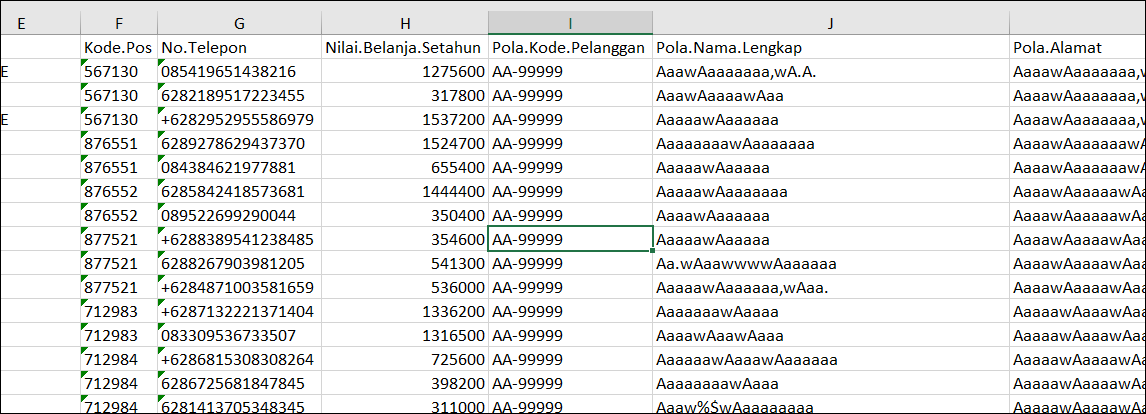

## [17] Kesimpulan
Data profiling adalah tahap awal untuk melakukan data cleansing. Di dalam proses ini melakukan aktifitas yang sederhana tapi penting :
- Identifikasi berbagai pola yang terdapat pada satu kolom data.
- Melakukan perbandingan dengan ekspektasi atau ukuran scientific yang wajar, untuk menemukan data yang perlu diperbaiki.

Kedua proses ini telah dipraktekkan dengan sangat detil menggunakan fungsi dan operator berikut :
- Function __summary__ dari paket bawaan R.
- Function __basic_pattern_analysis__ dari library bpa di R.
- Menggunakan operator == dan function __grepl__ untuk menarik data untuk pola hasil temuan.

Dengan penguasaan keterampilan profiling ini, Anda bisa mengenal outlier dan mengambil datanya – telah ditunjukkan untuk kolom Kode.Pelanggan dan Nama. Tanpa kemampuan identifikasi dan pengambilan data ini, tentu proses data cleansing atau perbaikan data tidak dapat dilakukan.

Terakhir, kita lakukan penggabungan pola dan data asal menjadi satu dataset dan dituliskan ke file agar bisa dilihat atau dikelola menggunakan aplikasi lain seperti Excel. Pada bab berikutnya, kita akan mulai menggunakan dataset gabungan ini tetapi dibaca dari sistem database MySQL, bukan file lagi.

# SQL dan Sistem Database Relasional
Kemampuan data wrangling tidak terlepas dari kemampuan untuk membaca berbagai sumber data, salah satu yang paling populer adalah membaca sistem database relasional.

## [1] Pendahuluan
Kemampuan data wrangling tidak terlepas dari kemampuan untuk membaca berbagai sumber data, salah satu yang paling populer adalah membaca sistem database relasional.

Walaupun proses pembelajaran pengolahan data cleansing tidak perlu melibatkan sistem database relasional. Namun karena sedemikian populernya, maka DQLab memutuskan untuk tetap memberikan materi SQL setelah di course sebelumnya kita selalu membaca data dari file teks maupun Excel.

Dengan demikian dari bab ini sampai penutup, kita akan tetap membaca dari sistem database. Namun tetap diingat, sumber data tetap bisa dibaca dari teks file maupun Excel.

Walaupun cukup banyak konsep yang perlu dikenalkan, DQLab akan usahakan untuk memberikan penjelasan yang gamblang dengan menghilangkan banyak detil yang tidak diperlukan.

## [2] Apa itu Sistem Database Relasional?
Ada dua kategori sistem database yang sangat populer saat ini, yaitu :
- Sistem database relasional atau SQL based database: adalah sistem database yang mengusung konsep objek database yang saling berelasi dengan skema dari objek-objek tersebut telah didefinisikan dengan jelas. <br>Contoh produk: Microsoft Access, MySQL, Oracle, SQL Server, PostgreSQL, dan lain-lain.
- NoSQL: adalah sistem database yang mengusung konsep objek database dengan skema yang fleksibel dan tidak kaku seperti relasional.
<br>Contoh produk: seperti MongoDB, Apache Cassandra, Apache HBase, dan lain-lain.

Sistem database yang pertama atau relasional adalah yang paling banyak digunakan di hampir seluruh perusahaan di Indonesia yang menggunakan sistem informasi komputer.

Sebuah sistem database dirancang untuk melakukan tiga fungsi berikut :
- Menyimpan Data
- Mengorganisasikan Data
- dan Mengambil Data

Dan untuk relasional database, kemampuan untuk melakukan tiga hal tersebut bisa menggunakan bahasa khusus yang dinamakan SQL (Structured Query Language). Dengan SQL kita memiliki konstruksi bahasa yang lebih mudah untuk berinteraksi dengan objek-objek data seperti database, table, kolom, dan lain-lain.

Sepanjang course ini kita akan fokus menggunakan SQL untuk fungsi terakhir, yaitu mengambil data. Produk yang akan kita gunakan adalah MySQL – yang bisa dikatakan sebagai produk database open source paling populer.

## [3] Server, Database, Table, Row dan Column
SQL tentunya membutuhkan interaksi dengan objek-objek sistem database dimana isi atau datanya sendiri disimpan.

Disini, DQLab akan mengambil konsep spreadsheet Excel sebagai analogi untuk menjelaskan objek-objek database sebagai berikut :
- Database: adalah satu file spreadsheet Excel yang memiliki banyak sheet.
- Table: adalah sheet pada Excel. Dengan demikian database terdiri dari beberapa table.
- Row: Tiap sheet memiliki table data yang memiliki row data.

Sedangkan MySQL server adalah analoginya adalah lokasi folder di komputer dimana kita bisa menyimpan banyak file.

Jika dikaitkan ke R, table, kolom, dan baris dapat disamakan dengan data.frame, kolom data.frame, dan isi data.frame.

## [4] Package RMySQL
Untuk dapat berinteraksi dengan sistem database MySQL di dalam R, kita bisa gunakan package RMySQL – yang sudah terinstalasi di server.

Sisa praktek dari bab ini akan diperkenalkan.

Function-function yang akan digunakan untuk melakukan koneksi dan mengambil data dari database yang disimpan di MySQL server.
Perintah SELECT yang merupakan bagian dari SQL untuk mengambil kolom tertentu dan dengan filter isi dengan pola yang dimengerti oleh MySQL.

## [5] Koneksi Database
Seperti halnya produk server umumnya, MySQL juga memerlukan koneksi dari aplikasi lain sebelum dapat memberikan data kepada aplikasi.

Dengan RMySQL, kita gunakan function dbConnect untuk melakukan koneksi ke MySQL. Berikut adalah contoh penggunaannya.

> dbConnect(MySQL(), host="localhost", user="root", password="",dbname="dqlabdatawrangling")

Keterangan parameter yang digunakan.
- __MySQL()__ : adalah function yang merupakan keharusan untuk load driver MySQL ke R.
- __host__ : ini merupakan lokasi server, bisa dalam bentuk alamat IP atau nama host. Untuk praktek course ini, kita gunakan nama host "mysqlhost".
- __user__ : ini merupakan nama user yang diperbolehkan untuk melakukan koneksi ke server. Untuk praktek course ini, kita gunakan user c.
- __password__ : password yang digunakan oleh user. Untuk praktek course ini, kita gunakan password "demo".
- __dbname__ : nama database yang digunakan. Untuk praktek course ini, kita gunakan database dengan nama "dqlabdatawrangling".

Function tersebut akan mengembalikan objek connection yang perlu kita simpan dalam suatu variable. Berikut adalah contoh dengan variable bernama con.   

> con <- dbConnect(MySQL(), host="localhost", user="root", password="", dbname="dqlabdatawrangling")

Pada akhir script kita perlu memutuskan koneksi dengan function dbDisconnect dengan input variable connection yang telah kita buat. Selengkapnya adalah sebagai berikut.

> dbDisconnect(con)

Namun, kadangkala koneksi yang telah dibuat pada setiap sesi R tidak terputus secara otomatis dengan berbagai alasan, sehingga kita tambahkan perintah berikut untuk memutuskan semua koneksi yang masih dikenali oleh sesi R.

> all_cons <- dbListConnections(MySQL())
<br>for(con in all_cons) dbDisconnect(con)

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",dbname="dqlabdatawrangling")
#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

## [6] Mengambil data dengan SELECT
Untuk mengambil selurh data dari suatu table koneksi database MySQL yang telah kita buat, maka diperlukan beberapa proses berikut.

Pertama tentunya adalah membuat perintah sql untuk mengambil data, yaitu SELECT dengan contoh konstruksi lengkap berikut.
> SELECT * FROM nama_table

dimana:
- tanda bintang (*) disini memiliki arti mengambil semua kolom dari table.
- nama_table yang akan kita ambil datanya, seperti disebutkan di awal course, nama table kita adalah dqlab_messy_data.

Kita bisa membuat variable untuk menampung perintah SQL ini seperti contoh berikut:
> sql <- "SELECT * FROM dqlab_messy_data"

Proses kedua adalah mengirimkan perintah SQL tadi ke server dengan function dbSendQuery seperti terlihat pada contoh berikut.
> rs <- dbSendQuery(con, sql)

Perintah ini mengirimkan perintah SQL – yang kemudian kita akan sebut query, dan telah disimpan pada variable bernama __sql__ – ke server MySQL – yang sudah disimpan koneksinya dengan variable bernama __con__. Hasil pengiriman ini ditampung pada variable __rs__.

Perintah tersebut biasanya dimodifikasi dengan function tryCatch. Yang berfungsi untuk menagani error apabila ada perintah yang salah atau koneksi terputus di tengah jalan, sehingga perintah akhirnya menjadi seperti bentuk berikut.
> rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

rs hanyalah sebuah pointer atau masih berupa connector ke data, belum mengambil data sebenarnya. Untuk mengambil data, kita perlu tambahan satu function lagi yaitu fetch.

Function fetch memerlukan dua parametre yaitu res yang meminta hasil eksekusi dari dbSendQuery, dan jumlah data yang diinginkan pada parameter n – jika nilainya -1 maka kita mengambil semua data.

Pada contoh kita, bentuknya adalah sebagai berikut.
> fetch(res=rs, n=-1)

Hasil dari fetch bisa disimpan dalam bentuk variable.
> data.pelanggan <- fetch(res=rs, n=-1)

In [ ]:
library(RMySQL)

# Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",dbname="dqlabdatawrangling")

# Konstruksi SQL
sql <- "SELECT * FROM dqlab_messy_data"

# Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

# Mengambil data
data.pelanggan <- fetch(rs, n=-1)
str(data.pelanggan)

# Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

## [7] Mengambil kolom Kode Pelanggan dan Nama
Dengan perintah SELECT kita bisa mengambil beberapa kolom tertentu saja. Kolom-kolom yang ingin kita ambil kita daftarkan dengan pemisah koma.

Berkaitan dengan contoh kita, jika kita ingin mengambil kolom nama dan tanggal_lahir maka perintahnya adalah sebagai berikut.
> SELECT nama, tanggal_lahir FROM dqlab_messy_data

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama FROM dqlab_messy_data"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [ ]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

## [8] Melakukan filtering data dengan where
Sejauh ini kita sudah bisa mengambil hanya beberapa kolom dari table database, namun masih seluruh mengambil seluruh baris data. Yang tentunya untuk banyak kasus tidak diperlukan.

Proses filtering data ini dapat dilakukan dengan perintah SELECT dengan menambahkan WHERE setelah FROM [nama_table].

Mengikuti where adalah operasi logika yang melibatkan nama kolom dan nilai pengecekan dari table.

Lebih jelasnya, kita perhatikan contoh berikut.
> SELECT kode_pelanggan, nama FROM dqlab_messy_data WHERE nama = 'agus cahyono'

Terlihat WHERE ditempatkan setelah nama table dqlab_messy_data, diikuti oleh kolom nama, operator perbandingan =, dan teks 'agus cahyono'.

__Catatan__ : Tanda kutip untuk filter teks harus merupakan kutip tunggal.

Dengan konstruksi demikian, kita akan memperoleh data berikut.
>kode_pelanggan         nama
<br>1       KD-00126 Agus Cahyono

Perhatikan pada konfigurasi MySQL di DQLab, huruf besar dan kecil tidak menjadi masalah untuk filter dengan operator sama dengan (=).

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama FROM dqlab_messy_data WHERE nama = 'Safira Hana Sahrani'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [15]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)
library(bpa)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

# Memilih Data dengan syarat
data.pelanggan[grepl(pattern="Safira Hana Sahrani", x=data.pelanggan$Nama.Lengkap),]

,Kode.Pelanggan,Nama.Lengkap
13,KD-00076,Safira Hana Sahrani
154,KD-00298,Safira Hana Sahrani


## [9] Melakukan filtering data dengan where … like
Like adalah operator pada bahasa SQL untuk mencari isi data yang memiliki karakter-karakter tertentu. Like sangat berguna untuk mencari isi yang mengandung prefix, infix ataupun suffix.

Untuk melakukan hal tersebut, like berpasangan dengan satu simbol yaitu simbol % yang mewakili karakter apapun – atau disebut juga wild character.

Misalkan kita memiliki data nama berikut:

| Nama |
| :--: |
| Maria Sirait |
| Ir. Ita    Nugraha |
| Djoko Wardoyo, Drs. |
| Khairul Nissa |
| Kaka Ari Lima |

Jika kita ingin mencari data yang memiliki tanda koma, maka kita bisa menulis konstruksi like sebagai berikut.
> Nama like '%,%'

Ini artinya Nama tanda koma diapit oleh karakter apapun – tanda persen di sebelah kiri dan kanan tanda koma.

Kemudian jika kita ingin mencari Nama yang berawalan huruf K, maka kita bisa gunakan konstruksi like berikut.
> Nama like 'K%'

Ini artinya Nama diawali huruf K dan diikuti dengan karakter apapun.

Lebih jelasnya, kita perhatikan contoh berikut.
> SELECT kode_pelanggan, nama FROM dqlab_messy_data WHERE nama like 'a%'

Konstruksi filter ini akan mencari semua data nama yang berawalan a. Huruf besar dan kecil tidak menjadi masalah.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama FROM dqlab_messy_data WHERE nama like 'B%'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [14]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

# Memilih Data dengan syarat prefixnya B
data.pelanggan[grepl(pattern="^B", x=data.pelanggan$Nama.Lengkap),]

,Kode.Pelanggan,Nama.Lengkap
16,KD-00099,Bapak Sanjaya Priyantoro
32,KD-00134,Budi Yahya
49,KD-00087,Budi Setiawan
78,KD-00130,Bapak Jujur Suwito
93,KD-00106,Budi Yahya
112,KD-00098,B. Sulaiman
135,KD-00147,Budi Setiawan
153,KD-00192,Bapak Sanjaya Priyantoro


## [10] Melakukan filtering data dengan where … REGEXP
REGEXP adalah operator khusus untuk melakukan filter berdasarkan regular expression pada MySQL. Fungsinya seperti function grepl di R.

REGEXP dapat memberikan solusi filtering yang tidak dapat dilakukan oleh operator = maupun LIKE.

Sebagai contoh, kita ingin data yang yang mengandung huruf q atau z maka konstruksi perintahnya terlihat sebagai berikut.
> SELECT kode_pelanggan, nama FROM dqlab_messy_data WHERE nama REGEXP '[qz]'

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama FROM dqlab_messy_data WHERE nama REGEXP '[qz]'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [11]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

# Memilih Data dengan syarat ada huruf x/z/Z (case sensitif)
# Huruf
data.pelanggan[grepl(pattern="[xZz]", x=data.pelanggan$Nama.Lengkap),]

,Nama.Lengkap,Kode.Pelanggan
15,Edi %$ Alexander,KD-00113
33,Fauzan Amir,KD-00064
41,Zulkifli Kirana,KD-00062


## [11] Kesimpulan
Kemampuan data wrangling tidak terlepas dari kemampuan untuk membaca berbagai sumber data, termasuk di dalamnya sistem database relasional.

Pada bab ini kita telah mempelajari dasar:
- Perkenalan singkat konsep database relasional, SQL dan NoSQL.
- Perkenalan singkat MySQL sebagai salah produk database relasional.
- Penggunaaan function-function pada library RMySQL untuk melakukan koneksi dan mengambil data dengan eksekusi perintah SQL
- Perkenalan konstruksi SELECT untuk mengambil keseluruhan data, sebagian kolom, dan sebagian data dengan filtering.

Dengan bekal pengetahuan dan keterampilan ini kita akan mengkombinasikan skillset R dan SQL sehingga kontrol pengolahan data menjadi semakin baik di tangan kita.

# Data Cleansing pada Kolom Nama
Bab ini memfokuskan diri memperbaiki teks nama yang tidak lazim. Sesuai dengan definisi pada bab "Data Profiling".

## [1] Pendahuluan
Bab ini akan memfokuskan diri memperbaiki teks nama yang tidak lazim - sesuai dengan definisi pada bab "Data Profiling".

Kita akan banyak memperkenalkan function-function dan pola regex untuk mengolah isi sepanjang bab dan sisa course.

Pada kesempatan ini juga, DQLab akan akan memperkenalkan cara kerja atau metodologi sistematis kita bekerja dengan data pelanggan ini sebagai berikut :
- Sumber data dibaca dari __database MySQL__ – dengan demikian membiasakan diri Anda untuk menggunakan perintah SELECT.
- Data cleansing akan dilakukan __per kolom__ – dengan demikian Anda membiasakan diri mengolah data per tahap yang selain memberi fokus juga lebih "memberi nafas" kepada sistem R sehingga meningkatkan kinerja secara total.
- Perkenalan __pola regex__ untuk mengidentifikasi dan mengganti isi data.
- Regex dan pola dari bpa akan banyak tumpang tindihnya, keduanya akan digunakan bergantian. Rule of thumbnya: __regex dari sisi performa jauh lebih lambat__ karena butuh komputasi yang besar. Jadi gunakan regex ketika pola bpa tidak bisa.
- Hasilnya akan disimpan per file Excel dengan format nama "staging.nama.kolom.xlsx" – dengan demikian kontrol pengolahan data masih ada pada Anda.
- File-file ini pada akhir course akan __disatukan__, dan ditulis ke dalam satu file – menyambung point kedua di atas, akhirnya file-file "serpihan" ini harus dapat diintegrasikan kembali.

Dengan demikian sepanjang praktek, server database MySQL hanya digunakan untuk "read only" – dalam arti tidak ada penulisan apapun ke dalam database – sesuai kondisi riil yang dihadapi para data analis di lapangan.

## [2] Menghilangkan spasi tambahan
Salah satu definisi nama yang tidak lazim atau salah tulis adalah spasi berlebih. Kebutuhan kita adalah menemukan spasi berlebih tersebut dan menggantinya dengan satu spasi saja.

Spasi berlebih sendiri jika dirinci lebih lanjut adalah karakter spasi dengan jumlah lebih dari satu dan posisinya berurutan, atau singkatnya spasi berulang.

Pola regex konkrit dari spasi berulang adalah " {2,}", dimana :
- " " : karakter spasi.
- {2,} : adalah pola repetisi dimana karakter muncul berulang, minimal dua kali sampai dengan tidak terhingga.

Pola regex ini kita gunakan dengan function __gsub__ untuk mengganti nilainya. Contoh penggunaan __gsub__ untuk mengakomodir kebutuhan kita adalah sebagai berikut.
> gsub(" {2,}", " ", data.pelanggan$nama)

Keterangan :
- gsub: function untuk mencari dan mengganti teks.
- " {2,}": pola regex spasi berulang yang akan dicari.
- " ": karakter satu spasi untuk menggantikan pola regex yang dicari.
- pelanggan$nama: sumber data yang kita gunakan.

__Catatan__ : Regex memiliki shorthand class \s yang dapat mewakili spasi dan tab, namun karena perlu tambahan adaptasi code penulisan ke MySQL dan gsub perlu dilakukan, maka shorthand ini tidak akan dibahas pada bab ini.

Terakhir, ada kemungkinan spasi hanya satu tapi letaknya sebelum atau sesudah nama. Ini juga sesuatu yang kita tidak inginkan. Kondisi ini bisa kita perbaiki dengan menggunakan function __trimws__. Contoh penggunaan __trimws__ untuk mengakomodir kebutuhan kita sebagai berikut.
> trimws(data.pelanggan$nama,which="both")

Keterangan:
> trimws: function untuk menghilangkan spasi di awal dan/atau setelah teks.
> pelanggan$nama: sumber data yang kita gunakan.
> which="both" : parameter yang menginformasikan kepada triwms untuk menghilangkan spasi sebelum dan sesudah nama.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama from dqlab_messy_data where nama REGEXP ' {2,}'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan
data.pelanggan$nama <- gsub(" {2,}", " ", data.pelanggan$nama)
data.pelanggan$nama <- trimws(data.pelanggan$nama,which="both")
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [27]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

# Mengambil data dengan jumlah spasi berurut 2/lebih
data.pelanggan <- data.pelanggan[grepl(pattern=" {2,}", x=data.pelanggan$Nama.Lengkap),]
print('Nama yang memiliki spasi berlebih')
print(data.pelanggan)


# Mengganti spasi berlebih dengan 1 spasi
data.pelanggan$Nama.Lengkap <- gsub(" {2,}", " ", data.pelanggan$Nama.Lengkap)

# Menghapus spasi di awal dan akhir nama
data.pelanggan$Nama.Lengkap <- trimws(data.pelanggan$Nama.Lengkap,which="both")

print('-------------------------------------------')
print('Setelah di bersihkan')
print(data.pelanggan)

[1] "Nama yang memiliki spasi berlebih"
              Nama.Lengkap Kode.Pelanggan
9       Ir. Ita    Nugraha       KD-00046
35  Florensia     Novianti       KD-00117
145      Ibu Jujur  Suwito       KD-00108
[1] "-------------------------------------------"
[1] "Setelah di bersihkan"
          Nama.Lengkap Kode.Pelanggan
9      Ir. Ita Nugraha       KD-00046
35  Florensia Novianti       KD-00117
145   Ibu Jujur Suwito       KD-00108


## [3] Menghilangkan angka dan simbol
Perbaikan selanjutnya untuk kolom nama adalah menghilangkan angka-angka dan simbol selain tanda baca titik dan koma. Kebutuhan kita adalah menemukan pola tersebut dan menggantinya dengan karakter kosong.

Dengan mendefinisikan ulang kebutuhan tersebut, polanya menjadi seluruh karakter yang __bukan__ huruf, spasi, tanda titik dan tanda koma.

Pola regex konkrit dari definisi terakhir adalah "[^A-Za-z .,]", dimana :
- [] : pasangan kurung siku pembuka dan penutup merupakan tempat kita memasukkan karakter-karakter yang kita perlukan.
- ^ : tanda ini di awal artinya __negasi__ atau pernyataan __bukan__ untuk karakter-karakter yang akan mengikuti.
- A-Z: karakter huruf besar dari A sampai Z.
- a-z: karakter huruf kecil dari a sampai z.
- : tanda spasi
- . : tanda titik.
- , : tanda koma.

Pola regex ini kita gunakan dengan function __gsub__ untuk menghilangkan karakternya. Contoh penggunaan __gsub__ untuk mengakomodir kebutuhan kita adalah sebagai berikut.
> gsub("[^A-Za-z .,]", "", data.pelanggan$Nama)

Keterangan :
- gsub: function untuk mencari dan mengganti teks.
- [^A-Za-z .,]: pola regex bukan huruf, spasi, tanda titik dan tanda koma.
- "": karakter kosong.
- pelanggan$Nama: sumber data yang kita gunakan.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama from dqlab_messy_data where nama REGEXP '[^A-Za-z .,]'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan
data.pelanggan$nama <- gsub("[^A-Za-z .,]", "", data.pelanggan$nama)
data.pelanggan$nama <- trimws(data.pelanggan$nama, which="both")
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [28]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

# Mengambil data
data.pelanggan <- data.pelanggan[grepl(pattern="[^A-Za-z .,]", x=data.pelanggan$Nama.Lengkap),]
print('Sebelum dibersihkan')
print(data.pelanggan)


# Menghapus karakter yang tidak dikehendaki (mengganti dengan karakter kosong)
data.pelanggan$Nama.Lengkap <- gsub("[^A-Za-z .,]", "", data.pelanggan$Nama.Lengkap)

# Menghapus spasi di awal dan akhir nama
data.pelanggan$Nama.Lengkap <- trimws(data.pelanggan$Nama.Lengkap,which="both")

print('-------------------------------------------')
print('Setelah di bersihkan')
print(data.pelanggan)

[1] "Sebelum dibersihkan"
                              Nama.Lengkap Kode.Pelanggan
15                        Edi %$ Alexander       KD-00113
36                    Ibu Sri Wahyuni@, IR       KD-00010
50     Joko Wiryanto Abadi (Pelanggan OKE)       KD-00039
68  Prihatin Setyonugroho (021-5555555544)       KD-00005
70                          Agus Cahyono's       KD-00001
88    Widianto Nuryajaya - 08222222999111)       KD-00063
107                           Dewi Sr|yani       KD-00120
[1] "-------------------------------------------"
[1] "Setelah di bersihkan"
                         Nama.Lengkap Kode.Pelanggan
15                     Edi  Alexander       KD-00113
36                Ibu Sri Wahyuni, IR       KD-00010
50  Joko Wiryanto Abadi Pelanggan OKE       KD-00039
68              Prihatin Setyonugroho       KD-00005
70                      Agus Cahyonos       KD-00001
88                 Widianto Nuryajaya       KD-00063
107                       Dewi Sryani       KD-00120


Jika berjalan dengan lancar, diperoleh hasil demikian

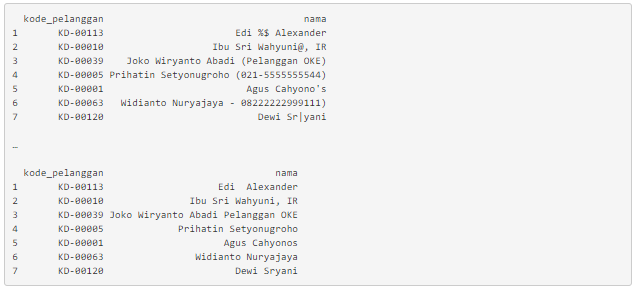

Terlihat kalau data sebelum dan sesudah terjadi penggantian teks, nama menjadi lebih rapi. Tapi perhatikan kalau masih ada tiga data yang masih aneh yaitu :
- "Edi Alexander" masih memiliki spasi tambahan setelah terjadi pergantian menjadi " Edi Alexander"
- "Joko Wiryanto Abadi Pelanggan OKE", harusnya "" karena " Joko Wiryanto Abadi" hanya keterangan.
- "Ibu Sri Wahyuni, IR" memiliki kata panggilan "Ibu" yang kemungkinan besar adalah panggilan dan bukan nama. Dan "IR" sendiri jika gelar maka penulisannya salah. Tapi ini memang di luar pola definisi kita.

Hasil ini menunjukkan dua hal :
- Bahwa setiap pola harus dilakukan berantai. Sebagai contoh untuk kasus ini, setelah menghilangkan angka dan simbol kita perlu melanjutkan dengan menghilangkan spasi berulang. Urutan pola mana yang dieksekusi terlebih dahulu menjadi faktor penting.
- Pola definisi yang sudah kita pikirkan sudah benar ternyata tidak bisa berlaku universal, akan ada kondisi lain yang membuat salah – keterangan-keterangan tambahan pada contoh di atas menunjukkan hal itu dengan jelas.

Dari poin terakhir, jelas sekali kita selalu bisa melewatkan pola kotor baru sehingga definisi dan urutan eksekusi pola cleansing yang ada menjadi tidak berlaku lagi.

Inilah yang menjadi basis argumen bahwa data tidak bisa 100 persen menjadi bersih atau clean. Harus ada intervensi manusia dengan proses yang dinamakan __data stewarding__ – dimana pengecekan manual perlu dilakukan namun tentunya tidak seluruh data.

Teknik dan metodologi untuk membantu data stewarding cukup banyak, namun iterasi bertahap dari proses profiling data dan pembuatan definisi adalah metodologi yang terbukti efektif dan ampuh untuk mempermudah sekaligus mempercepat proses data stewarding.

## [4] Menghilangkan kata panggilan dan perbaikan penulisan gelar
Pada contoh data pelanggan ditemukan lagi masalah baru, yaitu terdapat panggilan seperti "Ibu", "Bapak", dan lain-lain – yang tidak cocok dimasukkan. Kecuali memang nama yang diberikan adalah seperti itu, namun kemungkinan yang lebih besar adalah salah tulis.

Selain itu, pada praktek sebelumnya juga ada gelar yang salah tulis dari segi huruf besar dan kecil.

Contoh: "Ir" yang merupakan singkatan dari "Insinyur" ditulis dengan "IR".

Kedua kondisi di atas tidak dapat ditemukan dengan teknik profiling yang telah kita pelajari. Agar standar kita buat rentetan perintah gsub dengan input berupa nama panggilan dan gelar yang salah tulis beserta teks standar penggantinya. Untuk selanjutnya, proses ini kita sebut __standarisasi data__.

Kita tetap gunakan function __gsub__ dengan pola regex __\b__. Dan karena setiap pola regex yang memiliki backslash tunggal \ harus ditulis dua kali pada gsub, maka __\b__ diubah menjadi __\\b__ pada saat digunakan pada function gsub.

Pola __\\b__ menunjukkan bahwa kata yang menjadi input itu harus sama persis. Sebagai contoh pola "\\bibu\\b" akan cocok dengan kata "Ibu", "ibu" dan "iBu". Tapi tidak dengan kata "sibuk" dan "ribut".

Kemudian pada function tersebut juga ada tambahan parameter ignore.case = TRUE dengan tujuan pola berlaku untuk huruf besar maupun kecil.
> ```data.pelanggan$nama <- gsub("\\bir\\b", "Ir",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("\\bibu\\b", "",data.pelanggan$nama, ignore.case = TRUE)
```

Agar seragam, maka teks yang dicari seperti "ir" dan "ibu" semua ditulis dengan huruf kecil.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama from dqlab_messy_data where nama like '%ibu%' or nama like '%bapak%'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan
data.pelanggan$nama <- gsub("[^A-Za-z .,]", "", data.pelanggan$nama)
data.pelanggan$nama <- gsub("\\bbapak\\b", "",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("\\bibu\\b", "",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("\\bir\\b", "Ir",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("[ ]{2,}", " ", data.pelanggan$nama)
data.pelanggan$nama <- trimws(data.pelanggan$nama, which="both")
data.pelanggan

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [5]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))

# Mengambil data yang mengandung kata Ibu atau Bapak
library(sqldf)
data.pelanggan <- sqldf("SELECT Kode_Pelanggan, Nama_Lengkap FROM data WHERE Nama_Lengkap LIKE '%ibu%' OR Nama_Lengkap LIKE '%bapak%'")
#data.pelanggan <- data.pelanggan[grepl(pattern='(Ibu|Bapak)', x=data.pelanggan$Nama_Lengkap),]
print('Sebelum dibersihkan')
print(data.pelanggan)

# Melakukan beberapa jenis pembersihan (hapus karakter yang tidak seharusnya, spasi berlebih, dll)
data.pelanggan$Nama_Lengkap <- gsub("[^A-Za-z .,]", "", data.pelanggan$Nama_Lengkap)
data.pelanggan$Nama_Lengkap <- gsub("\\bbapak\\b", "",data.pelanggan$Nama_Lengkap, ignore.case = TRUE)
data.pelanggan$Nama_Lengkap <- gsub("\\bibu\\b", "",data.pelanggan$Nama_Lengkap, ignore.case = TRUE)
data.pelanggan$Nama_Lengkap <- gsub("\\bir\\b", "Ir",data.pelanggan$Nama_Lengkap, ignore.case = TRUE)
data.pelanggan$Nama_Lengkap <- gsub("[ ]{2,}", " ", data.pelanggan$Nama_Lengkap)
data.pelanggan$Nama_Lengkap <- trimws(data.pelanggan$Nama_Lengkap, which="both")

print('-------------------------------------------')
print('Setelah di bersihkan')
print(data.pelanggan)

[1] "Sebelum dibersihkan"
  Kode_Pelanggan             Nama_Lengkap
1       KD-00053            Ibu Heidi Goh
2       KD-00099 Bapak Sanjaya Priyantoro
3       KD-00010     Ibu Sri Wahyuni@, IR
4       KD-00130       Bapak Jujur Suwito
5       KD-00108        Ibu Jujur  Suwito
6       KD-00192 Bapak Sanjaya Priyantoro
[1] "-------------------------------------------"
[1] "Setelah di bersihkan"
  Kode_Pelanggan       Nama_Lengkap
1       KD-00053          Heidi Goh
2       KD-00099 Sanjaya Priyantoro
3       KD-00010    Sri Wahyuni, Ir
4       KD-00130       Jujur Suwito
5       KD-00108       Jujur Suwito
6       KD-00192 Sanjaya Priyantoro


## [5] Konsolidasi Proses Cleansing
Pola dan proses cleansing berupa standarisasi kolom __nama__ yang kita lakukan sejauh ini hanya kita terapkan pada sebagian porsi baris data untuk menjaga fokus.

Sekarang saatnya kita konsolidasi prosesnya dengan mengambil keseluruhan data untuk kolom __nama__, dan kemudian diolah dengan seluruh pola yang telah kita buat.

Hasil ini akan ditulis ke dalam file Excel yang akan kita gabungkan dengan standarisasi kolom lain di akhir course ini.

Agar dapat diintegrasikan, kita juga akan mengambil kolom __kode_pelanggan__. Dan juga supaya bisa dibandingkan, kolom nama diduplikasi dengan nama lain agar kondisi sebelum standarisasi juga akan diikutkan. Perintahnya adalah sebagai berikut :
> ```data.pelanggan$nama.before <- data.pelanggan$nama```

In [ ]:
library(openxlsx)
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, nama from dqlab_messy_data"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data.pelanggan <- fetch(rs, n=-1)
data.pelanggan$nama.before <- data.pelanggan$nama
data.pelanggan$nama <- gsub("[^A-Za-z .,]", "", data.pelanggan$nama)
data.pelanggan$nama <- gsub("\\bbapak\\b", "",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("\\bibu\\b", "",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("\\bir\\b", "Ir",data.pelanggan$nama, ignore.case = TRUE)
data.pelanggan$nama <- gsub("[ ]{2,}", " ", data.pelanggan$nama)
data.pelanggan$nama <- trimws(data.pelanggan$nama, which="both")
write.xlsx(data.pelanggan, file="staging.nama.xlsx")

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [17]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data.pelanggan <- read.xlsx("dqlab_messy_data_pelanggan.xlsx", sheet="Pelanggan")

# Memilih kolom kode_pelanggan dan nama
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Lengkap')]

# Menyimpan data awal ke variabel baru
data.pelanggan$Nama.Awal <- data.pelanggan$Nama.Lengkap

# Melakukan beberapa jenis pembersihan (hapus karakter yang tidak seharusnya, spasi berlebih, dll) pada Nama.Lengkap
data.pelanggan$Nama.Lengkap <- gsub("[^A-Za-z .,]", "", data.pelanggan$Nama.Lengkap)
data.pelanggan$Nama.Lengkap <- gsub("\\bbapak\\b", "",data.pelanggan$Nama.Lengkap, ignore.case = TRUE)
data.pelanggan$Nama.Lengkap <- gsub("\\bibu\\b", "",data.pelanggan$Nama.Lengkap, ignore.case = TRUE)
data.pelanggan$Nama.Lengkap <- gsub("\\bir\\b", "Ir",data.pelanggan$Nama.Lengkap, ignore.case = TRUE)
data.pelanggan$Nama.Lengkap <- gsub("[ ]{2,}", " ", data.pelanggan$Nama.Lengkap)
data.pelanggan$Nama.Lengkap <- trimws(data.pelanggan$Nama.Lengkap, which="both")

# Mengatur Susunan Kolom
data.pelanggan <- data.pelanggan[c('Kode.Pelanggan','Nama.Awal','Nama.Lengkap')]

# Menyimpan hasil cleaning
write.xlsx(data.pelanggan, file="staging.nama.byme.xlsx")

## [6] Kesimpulan
Sepanjang bab ini, Anda telah menyelesaikan teknik cleansing atau standarisasi untuk kolom nama dengan tahapan berikut :
- Membaca sumber data dari database MySQL dengan filter regex dan operator like.
- Mengenal berbagai pola regex untuk menangani spasi berulang, non huruf, dan daftar kata yang fix.
- Melakukan konsolidasi atau penyusunan pola regex dalam urutan yang tepat dan diterapkan ke seluruh data.
- Hasil konsolidasi disimpan dalam file Excel yang akan kita integrasikan di akhir course ini.

# Data Cleansing untuk Kolom Character Lain
Bab ini memfokuskan diri menangani cleansing beberapa kolom character selain nama yaitu alamat, kode pos, aktif, dan nomor telepon

## [1] Pendahuluan
Setelah fokus ke kolom nama dan membiasakan diri dengan proses cleansing, pada bab ini kita akan fokus mengenali pola outlier dan standarisasi untuk sisa kolom character lain dengan urutan berikut :
- No Telepon
- Kode Pos
- Alamat
- Aktif

## [2] Profiling kolom Nomor Telepon (1)
Pola yang kita dapatkan dari bab "Data Profiling" sebelumnya telah disimpan di dalam table __dqlab_messy_data__ di dalam MySQL. Hal ini membuat kita tidak perlu setiap kali menggunakan function dari bpa, dan juga akan memberi banyak keuntungan performa ketika data kita sangat besar.

Kembali ke dataset kita, kolom __no_telepon__ adalah data yang sangat penting. Komunikasi dengan aplikasi populer seperti Whatsapp sekarang ini semuanya berbasiskan nomor telepon. Dengan demikian, jika ada anomali dari data ini perlu cepat diketahui sehingga dapat segera ditindaklanjuti.

Kita akan lakukan analisa kolom no_telepon melalui kolom lain, yaitu __pola_no_telepon__ –kolom hasil output dari function __basic_pattern_analysis__.

Gunakan perintah SQL berikut untuk melakukan hal tersebut.
> SELECT pola_no_telepon, length(pola_no_telepon) as panjang_text, count(*) as jumlah_data
<br>from dqlab_messy_data
<br>group by pola_no_telepon

Keterangan dari perintah SQL di atas.

| Elemen Perintah | Keterangan |
| :-------------- | :--------- |
| SELECT | Konstruksi awal perintah SQL untuk mengambil kolom data |
| pola_no_telepon | Mengambil kolom "pola_no_telepon" |
| count(*) as jumlah_data |- Menggunakan fungsi count di SQL untuk menghitung jumlah baris data. <br>- * mewakili seluruh kolom yang di-count.<br>- as jumlah_data: merupakan penamaan kolom dari hasil count(*) menjadi jumlah_data. |
| length(pola_no_telepon) as panjang_text | - Menggunakan fungsi length di SQL untuk menghitung jumlah karakter.<br>- pola_no_telepon : kolom yang di-count.<br>- as panjang_text: merupakan penamaan kolom dari hasil length(pola_no_telepon) menjadi panjang_text. |
| group by pola_no_telepon | Pengelompokan nilai count dan length berdasarkan kolom pola_no_telepon |

Hasil dari eksekusi perintah tersebut tampak sebagai berikut.

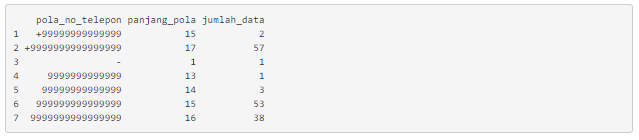

Berikut adalah analisa dari hasil di atas.
- Ada tujuh pola yang teridentifikasi.
- Mayoritas jumlah ada pada pola nomor 2, 6 dan 7.
- Panjang data pada 2, 6 dan 7 adalah 17, 15 dan 16. Namun karena pola no 2 ada tanda +, jadi kemungkinan panjangnya sebenarnya adalah 16. Sama dengan pola no 7.
- Tidak ada karakter lain selain angka dan tanda +. Kecuali satu data di pola no. 3 hanya tanda minus (-). Ini bisa dianggap missing value.
- Pola lain yang tidak biasa adalah pola no 1 (+99999999999999, jumlahnya hanya 2 data), 4 (9999999999999, jumlahnya hanya 1 data), dan 5 (99999999999999, hanya 3 data).
- Pola nomor 1, 3, 4 dan 5 akan kita flag sebagai outlier yang perlu ditindaklanjuti pada praktek selanjutnya.
- Ada perbedaan jumlah teks antara pola no 5, 6 dan 2 (jumlah teks masing-masing adalah 15, 16, dan 17), kita asumsikan ini disebabkan angka awal mobile 0, 62 dan +62 di depannya. Ini akan kita cek dengan query tambahan pada profiling selanjutnya.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT pola_no_telepon, length(pola_no_telepon) as panjang_text, count(*) as jumlah_data from dqlab_messy_data group by pola_no_telepon"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
profil_no_telepon <- fetch(rs, n=-1)
print(profil_no_telepon)

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [45]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")
data <- data['Pola.No.Telepon']

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Memilih kolom Pola Nomor Telepon
profil_no_telepon <- sqldf("SELECT Pola_No_Telepon, length(Pola_No_Telepon) AS panjang_text, count(Pola_No_Telepon) AS jumlah_data FROM data GROUP BY Pola_No_Telepon")
profil_no_telepon

Pola_No_Telepon,panjang_text,jumlah_data
+99999999999999,15,2
+9999999999999999,17,57
-,1,1
9999999999999,13,1
99999999999999,14,3
999999999999999,15,53
9999999999999999,16,38


## [3] Profiling kolom Nomor Telepon (2)
Menganalisa jumlah data dari pola pada praktek sebelumnya dengan memperhatikan angka akan lebih menarik jika langsung divisualisasikan.

Untuk analisa distribusi dari pola no_telepon ini kita bisa gunakan visualisasi bar chart seperti gambar berikut.

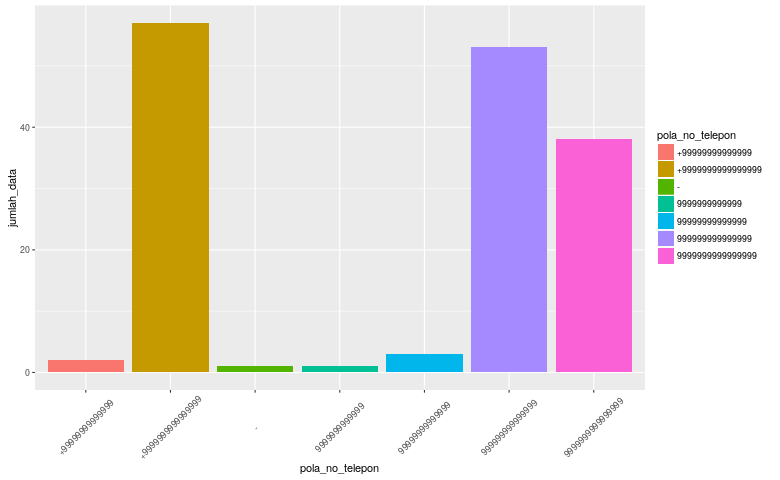

Disini langsung terlihat ada tiga pola mayoritas dan yang jauh lebih kecil sebagai outlier.

Untuk menghasilkan chart tersebut, kita tambahkan code ggplot berikut dari praktek sebelumnya.
> plot.profile <- ggplot(data=profil_no_telepon, aes(x = pola_no_telepon, y = jumlah_data, fill = pola_no_telepon))
<br>plot.profile <- plot.profile + theme(axis.text.x = element_text(angle=45,vjust = 0.5))
<br>plot.profile + geom_bar(stat="identity")

In [ ]:
library(RMySQL)
library(ggplot2)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT pola_no_telepon, length(pola_no_telepon) as panjang_text, count(*) as jumlah_data from dqlab_messy_data group by pola_no_telepon"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
profil_no_telepon <- fetch(rs, n=-1)
print(profil_no_telepon)

#Plotting data
plot.profile <- ggplot(data=profil_no_telepon, aes(x = pola_no_telepon, y = jumlah_data, fill = pola_no_telepon))
plot.profile <- plot.profile + theme(axis.text.x = element_text(angle=45,vjust = 0.5))
plot.profile + geom_bar(stat="identity")

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


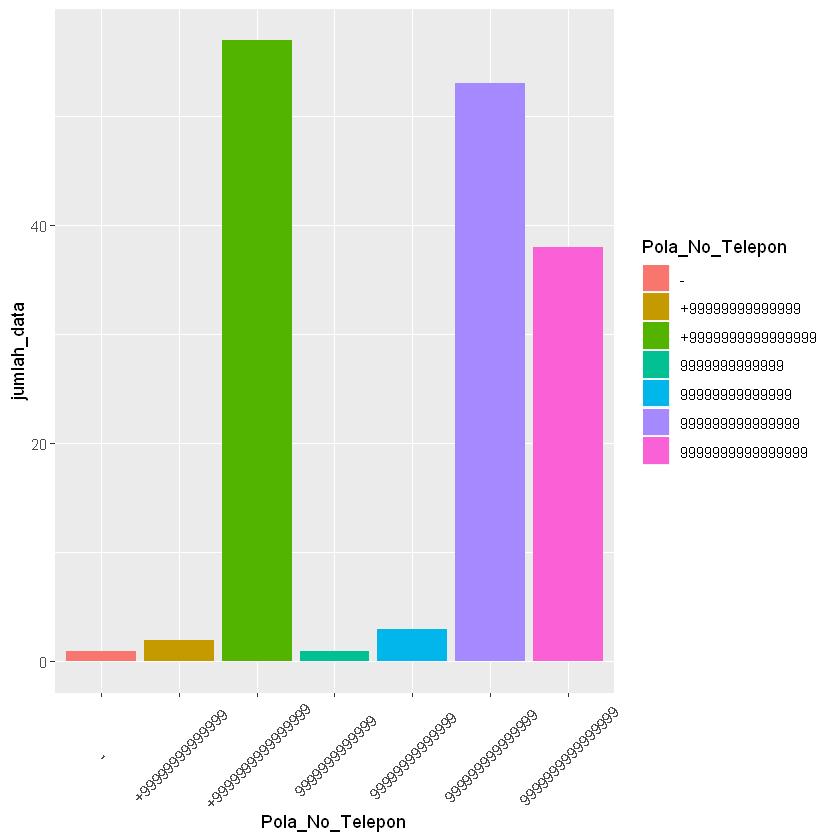

In [46]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")
data <- data['Pola.No.Telepon']

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Memilih kolom Pola Nomor Telepon
profil_no_telepon <- sqldf("SELECT Pola_No_Telepon, length(Pola_No_Telepon) AS panjang_text, count(Pola_No_Telepon) AS jumlah_data FROM data GROUP BY Pola_No_Telepon")

#Plotting data
library(ggplot2)
plot.profile <- ggplot(data=profil_no_telepon, aes(x = Pola_No_Telepon, y = jumlah_data, fill = Pola_No_Telepon))
plot.profile <- plot.profile + theme(axis.text.x = element_text(angle=45,vjust = 0.5))
plot.profile + geom_bar(stat="identity")

## [4] Profiling kolom Nomor Telepon (3)
Kembali ke hasil profiling pada praktek sebelumnya, sebagai berikut.

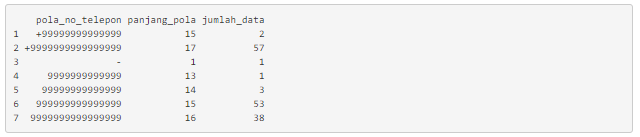

Terlihat ada perbedaan antara pola 6, 7 dan 2 dari sisi jumlah teks (15, 16 dan 17). Kita asumsikan ini dikarenakan variasi penulisan awal nomor mobile berupa angka 0, 62 dan +62.

Kita akan uji asumsi ini dengan mengambil :
- satu karakter pertama dari isi kolom no_telepon untuk pola nomor 6 (999999999999999).
- dua karakter pertama dari isi kolom no_telepon untuk pola nomor 7 (9999999999999999).
- tiga karakter pertama dari isi kolom no_telepon untuk pola nomor 2 (+9999999999999999).

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL untuk Profil 1
sql <- "SELECT left(no_telepon,1) as prefix_no_telepon, pola_no_telepon from dqlab_messy_data where pola_no_telepon = '999999999999999' group by left(no_telepon,1), pola_no_telepon"

#Mengirimkan query untuk Profil 1
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data untuk Profil 1
profil_no_telepon <- fetch(rs, n=-1)
print(profil_no_telepon)

#Clear resultset untuk Profil 1
dbClearResult(rs)

#Konstruksi SQL untuk Profil 2
sql <- "SELECT left(no_telepon,2) as prefix_no_telepon, pola_no_telepon from dqlab_messy_data where pola_no_telepon = '9999999999999999' group by left(no_telepon,2), pola_no_telepon"

#Mengirimkan query untuk Profil 2
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data untuk Profil 2
profil_no_telepon <- fetch(rs, n=-1)
print(profil_no_telepon)

#Clear resultset untuk Profil 2
dbClearResult(rs)

#Konstruksi SQL untuk Profil 3
sql <- "SELECT left(no_telepon,3) as prefix_no_telepon, pola_no_telepon from dqlab_messy_data where pola_no_telepon = '+9999999999999999' group by left(no_telepon,3), pola_no_telepon"

#Mengirimkan query untuk Profil 3
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data untuk Profil 3
profil_no_telepon <- fetch(rs, n=-1)
print(profil_no_telepon)

#Clear resultset untuk Profil 3
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [1]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))

library(sqldf)
# mengambil satu karakter pertama dari isi kolom no_telepon untuk pola nomor 6 (999999999999999)
#profil_no_telepon <- sqldf("SELECT left(No_Telepon,1) AS prefix_no_telepon, Pola_No_Telepon FROM data WHERE Pola_No_Telepon = '999999999999999' GROUP BY left(No_Telepon,1), Pola_No_Telepon")
profil_no_telepon <- sqldf("SELECT No_Telepon AS prefix_no_telepon, Pola_No_Telepon FROM data WHERE Pola_No_Telepon = '999999999999999'")
profil_no_telepon

Warning message:
"package 'sqldf' was built under R version 3.6.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"Loading required package: RSQLite


prefix_no_telepon,Pola_No_Telepon
085419651438216,999999999999999
084384621977881,999999999999999
089522699290044,999999999999999
083309536733507,999999999999999
086210781145764,999999999999999
081902807450191,999999999999999
086663398617904,999999999999999
083468728620812,999999999999999
084094392278758,999999999999999
086621940809359,999999999999999


Perhatikan hasilnya bahwa digit pertamanya adalah 0.

In [3]:
# melihat 2 karakter pertama dari isi kolom no_telepon untuk pola nomor 7 (9999999999999999)
profil_no_telepon <- sqldf("SELECT No_Telepon AS prefix_no_telepon, Pola_No_Telepon FROM data WHERE Pola_No_Telepon = '9999999999999999'")
profil_no_telepon

prefix_no_telepon,Pola_No_Telepon
6282189517223455,9999999999999999
6289278629437370,9999999999999999
6285842418573681,9999999999999999
6288267903981205,9999999999999999
6286725681847845,9999999999999999
6281413705348345,9999999999999999
6283203183708137,9999999999999999
6289176501199576,9999999999999999
6285991672131933,9999999999999999
6289323214692782,9999999999999999


Perhatikan hasilnya bahwa 2 digit pertamanya adalah 62.

In [4]:
# melihat 3 karakter pertama dari isi kolom no_telepon untuk pola nomor 2 (+99999999999999999)
profil_no_telepon <- sqldf("SELECT No_Telepon AS prefix_no_telepon, Pola_No_Telepon FROM data WHERE Pola_No_Telepon = '+9999999999999999'")
profil_no_telepon

prefix_no_telepon,Pola_No_Telepon
+6282952955586979,+9999999999999999
+6288389541238485,+9999999999999999
+6284871003581659,+9999999999999999
+6287132221371404,+9999999999999999
+6286815308308264,+9999999999999999
+6281729600654645,+9999999999999999
+6282352225142570,+9999999999999999
+6285986817540683,+9999999999999999
+6287066745737382,+9999999999999999
+6282607473168157,+9999999999999999


Perhatikan hasilnya bahwa 3 digit pertamanya adalah +62.

## [5] Standarisasi kolom Nomor Telepon
Pada umumnya nomor telepon diberi kode negara dan pada saat dial kita menggunakan tanda +. Berdasarkan kedua hal tersebut, untuk dataset kita diputuskan untuk menggunakan standarisasi dimana nomor telepon dimulai dari tanda + diikuti 62 (kode negara untuk Indonesia).

Untuk melakukan hal ini maka ada dua hal yang perlu kita lakukan berdasarkan profiling kita pada praktek sebelumnya :
- Menambahkan awalan "+" untuk pola "9999999999999999" (16 digit angka).
- Mengganti awalan "0" menjadi "+62" untuk pola "999999999999999" (15 digit angka).

Pertama yang kita perlu ketahui adalah filter dataset setelah dibaca di R, karena dari MySQL akan kita tarik seluruh data.

Jika data yang ditarik dinamakan data.telepon, maka berikut adalah cara melakukan filter :
> data.telepon[__data.telepon$pola_no_telepon=="9999999999999999"__,]

Teks yang dibold adalah konstruksi filter yang kemudian dijadikan index untuk mengambil data.telepon sesuai filter.

Untuk menambahkan "+" untuk pola "9999999999999999" kita gunakan function __paste –__ yang membutuhkan input berupa beberapa teks yang akan digabungkan, dan pemisah teks dengan parameter __sep=""__.

Berikut adalah perintah lengkapnya untuk kasus kita.
> ```paste("+", data.telepon[data.telepon$pola_no_telepon=="9999999999999999",]$no_telepon, sep="")```

Terakhir, untuk mengganti awalah  "0" menjadi "+62" untuk data berpola "999999999999999" kita tetap gunakan function __gsub__ dengan pola regex "^0" dimana tanda topi (^) menunjukkan bahwa pola 0 harus di bagian awal dari teks, bukan di tengah atau di akhir.

Berikut adalah perintah lengkapnya untuk kasus kita.
> ```gsub("^0","+62",  data.telepon[data.telepon$pola_no_telepon=="999999999999999",]$no_telepon)```

In [ ]:
library(RMySQL)
library(openxlsx)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL untuk Profil 1
sql <- "select kode_pelanggan, no_telepon, pola_no_telepon from dqlab_messy_data"

#Mengirimkan query untuk standarisasi no_telepon
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data untuk standarisasi no_telepon
data.telepon <- fetch(rs, n=-1)
data.telepon$anomali_no_telepon <- TRUE

data.telepon[data.telepon$pola_no_telepon=="9999999999999999",]$no_telepon <- paste("+", data.telepon[data.telepon$pola_no_telepon=="9999999999999999",]$no_telepon, sep="")
data.telepon[data.telepon$pola_no_telepon=="999999999999999",]$no_telepon <- gsub("^0","+62",  data.telepon[data.telepon$pola_no_telepon=="999999999999999",]$no_telepon)
data.telepon[data.telepon$pola_no_telepon=="+9999999999999999",]$anomali_no_telepon <- FALSE 
data.telepon[data.telepon$pola_no_telepon=="9999999999999999",]$anomali_no_telepon <- FALSE 
data.telepon[data.telepon$pola_no_telepon=="999999999999999",]$anomali_no_telepon <- FALSE
print(data.telepon)

write.xlsx(file="staging.no_telepon.xlsx", x=data.telepon)

#Clear resultset untuk standarisasi
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)


In [7]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))

# Mengambil beberapa kolom
library(sqldf)
data.telepon <- sqldf("SELECT Kode_Pelanggan, No_Telepon, Pola_No_Telepon FROM data")

# Membuat Kolom Baru
data.telepon$anomali_no_telepon <- TRUE

# Proses Standarisasi Nomor Telepon
data.telepon[data.telepon$Pola_No_Telepon=="9999999999999999",]$No_Telepon <- paste("+", data.telepon[data.telepon$Pola_No_Telepon=="9999999999999999",]$No_Telepon, sep="")
data.telepon[data.telepon$Pola_No_Telepon=="999999999999999",]$No_Telepon <- gsub("^0","+62",  data.telepon[data.telepon$Pola_No_Telepon=="999999999999999",]$No_Telepon)
data.telepon[data.telepon$Pola_No_Telepon=="+9999999999999999",]$anomali_no_telepon <- FALSE 
data.telepon[data.telepon$Pola_No_Telepon=="9999999999999999",]$anomali_no_telepon <- FALSE 
data.telepon[data.telepon$Pola_No_Telepon=="999999999999999",]$anomali_no_telepon <- FALSE

data.telepon

# Menyimpan Hasil Standarisasi ke File Excel
write.xlsx(file="staging.no_telepon.byme.xlsx", x=data.telepon)


Kode_Pelanggan,No_Telepon,Pola_No_Telepon,anomali_no_telepon
KD-00032,+6285419651438216,999999999999999,FALSE
KD-00053,+6282189517223455,9999999999999999,FALSE
KD-00133,+6282952955586979,+9999999999999999,FALSE
KD-00056,+6289278629437370,9999999999999999,FALSE
KD-00111,+6284384621977881,999999999999999,FALSE
KD-00036,+6285842418573681,9999999999999999,FALSE
KD-00126,+6289522699290044,999999999999999,FALSE
KD-00137,+6288389541238485,+9999999999999999,FALSE
KD-00046,+6288267903981205,9999999999999999,FALSE
KD-00027,+6284871003581659,+9999999999999999,FALSE


Note: zip::zip() is deprecated, please use zip::zipr() instead


## [6] Profiling kolom Kode Pos (1)
Kolom selanjutnya yang akan kita profiling adalah kode_pos. Teknik profilenya sama dengan proses profiling no_telepon pada subbab "Menganalisa Profil kolom Nomor Telepon (1)".

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT pola_kode_pos, length(pola_kode_pos) as panjang_text, count(*) as jumlah_data from dqlab_messy_data group by pola_kode_pos"


#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
profil_kode_pos <- fetch(rs, n=-1)
print(profil_kode_pos)

dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)


In [10]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Memilih kolom Pola Kode Pos
profil_kode_pos <- sqldf("SELECT Pola_Kode_Pos, length(Pola_Kode_Pos) AS panjang_text, count(*) AS jumlah_data FROM data GROUP BY Pola_Kode_Pos")
profil_kode_pos

Pola_Kode_Pos,panjang_text,jumlah_data
-,1,5
999999,6,147
99999A,6,1
9999A9,6,2


## [7] Profiling kolom Kode Pos (2)
Teks '99999A' dan '9999A9' adalah dua pola anomali yang kita temukan pada praktek di subbab sebelumnya. Dari pola ini terlihat ada huruf diantara angka. Harusnya kode pos terdiri dari angka semua.

Ok, kita sudah tau pola. Apa isinya? Dengan mengetahui isi kita bisa mengetahui apa yang perlu diganti.

Untuk dua teks ini kita bisa menggunakan perintah SELECT… WHERE… IN, seperti berikut.
> SELECT kode_pos, pola_kode_pos from dqlab_messy_data where pola_kode_pos in ('99999A', '9999A9')"

Dimana dengan menggunakan operator __IN__ kita bisa filter daftar nilai yang terdapat pada kolom pola_kode_pos.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT kode_pelanggan, kode_pos, pola_kode_pos from dqlab_messy_data where pola_kode_pos in ('99999A', '9999A9')"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data_kode_pos <- fetch(rs, n=-1)
print(data_kode_pos)

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [11]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data dengan syarat Pola_Kode_Pos
data_kode_pos <- sqldf("SELECT Kode_Pelanggan, Kode_Pos, Pola_Kode_Pos from data WHERE Pola_Kode_Pos IN ('99999A', '9999A9')")
data_kode_pos

Kode_Pelanggan,Kode_Pos,Pola_Kode_Pos
KD-00093,96722O,99999A
KD-00083,8765I1,9999A9
KD-00085,9876O1,9999A9


Terlihat terdapat huruf O, yang harusnya 0 (nol) untuk kode_pelanggan = 'KD-00093'  dan untuk kode_pelanggan = 'KD-00085'. Setelah itu terdapat huruf I yang mungkin maksudnya adalah angka 1.

Pada tahap selanjutnya kita coba gantikan dulu dengan asumsi kita, O menjadi 0. Dan I menjadi 1.

## [8] Standarisasi kolom Kode Pos (1)
Untuk standarisasi kolom kode pos pada dataset kita tidak ada hal yang khusus, hanya mengganti apa yang salah – dan kebetulan minor.

Kembali ke hasil profiling kode pos sebelumnya, maka action item kita adalah :
- Mengganti huruf O menjadi 0.
- Mengganti huruf I menjadi 1.

Dan untuk ini cukup menggunakan function gsub seperti yang sudah kita praktekkan beberapa kali. Sebagai contoh, untuk mengganti huruf O menjadi 0 pada data frame data_kode_pos$kode_pos adalah sebagai berikut.
> ```data_kode_pos$kode_pos <- gsub("O","0",  data_kode_pos$kode_pos)```

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")
#Konstruksi SQL
sql <- "SELECT kode_pelanggan, kode_pos, pola_kode_pos from dqlab_messy_data where pola_kode_pos in ('99999A', '9999A9')"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data_kode_pos <- fetch(rs, n=-1)

#Merubah nilai O dan I
data_kode_pos$kode_pos <- gsub("O","0",  data_kode_pos$kode_pos)
data_kode_pos$kode_pos <- gsub("I","1",  data_kode_pos$kode_pos)
print(data_kode_pos)

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [13]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data dengan syarat Pola_Kode_Pos
data_kode_pos <- sqldf("SELECT Kode_Pelanggan, Kode_Pos, Pola_Kode_Pos from data WHERE Pola_Kode_Pos IN ('99999A', '9999A9')")

#Merubah nilai O dan I
data_kode_pos$Kode_Pos <- gsub("O","0",  data_kode_pos$Kode_Pos)
data_kode_pos$Kode_Pos <- gsub("I","1",  data_kode_pos$Kode_Pos)

data_kode_pos

Kode_Pelanggan,Kode_Pos,Pola_Kode_Pos
KD-00093,967220,99999A
KD-00083,876511,9999A9
KD-00085,987601,9999A9


## [9] Standarisasi kolom Kode Pos (2)
Seperti halnya pada kolom nama dan nomor telepon, pada praktek kali ini kita akan membaca seluruh  data,  melakukan pergantian (untuk seluruh data – karena O dan I tidak akan ditemukan di data lain – dan data masih cukup kecil) dan menulis ke staging file.

In [ ]:
library(RMySQL)
library(openxlsx)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")
#Konstruksi SQL
sql <- "SELECT kode_pelanggan, kode_pos, pola_kode_pos from dqlab_messy_data"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
#Mengambil data
data_kode_pos <- fetch(rs, n=-1)

#Merubah nilai O menjadi 0 pada kolom kode_pos
data_kode_pos$kode_pos <- gsub("O","0",  data_kode_pos$Kode_Pos)
#Merubah nilai I menjadi 1 pada kolom kode_pos
data_kode_pos$kode_pos <- gsub("I","1",  data_kode_pos$Kode_Pos)
print(data_kode_pos)
#Menulis data ke file
write.xlsx(file="staging.kode_pos.xlsx", x=data_kode_pos)

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [14]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data dengan syarat Pola_Kode_Pos
data_kode_pos <- sqldf("SELECT Kode_Pelanggan, Kode_Pos, Pola_Kode_Pos from data")

#Merubah nilai O dan I
data_kode_pos$Kode_Pos <- gsub("O","0",  data_kode_pos$Kode_Pos)
data_kode_pos$Kode_Pos <- gsub("I","1",  data_kode_pos$Kode_Pos)

data_kode_pos

#Menulis data ke file
write.xlsx(file="staging.kode_pos.byme.xlsx", x=data_kode_pos)

Kode_Pelanggan,Kode_Pos,Pola_Kode_Pos
KD-00032,567130,999999
KD-00053,567130,999999
KD-00133,567130,999999
KD-00056,876551,999999
KD-00111,876551,999999
KD-00036,876552,999999
KD-00126,876552,999999
KD-00137,877521,999999
KD-00046,877521,999999
KD-00027,877521,999999


## [10] Profiling kolom Alamat
Kolom alamat sebenarnya cukup sulit diprofile. Tapi pastinya harus memiliki karakteristik dimana kolom ini merupakan campuran huruf dan angka dengan mayoritas berupa huruf.

Berbasiskan karakteristik tersebut kita bisa cari anomali selain isi yang kosong, alamat juga tidak boleh terdiri dari huruf (plus spasi) semua dan angka (plus spasi) semua.

Karena kita ada dua kolom yang berkaitan dengan alamat, yaitu kolom alamat dan pola_alamat. Kedua-duanya bisa digunakan untuk filtering dengan REGEXP untuk karakteristik di atas, tapi lebih mudah dengan menggunakan pola_regex.

Jika kita gunakan regex untuk kolom __alamat__ maka kita gunakan:
> ```^[A-Za-z ]+$
^[0-9 ]+$```

Jika kita gunakan regex untuk kolom __pola_alamat__ maka kita gunakan:
> ```^[aAw]+$
^[9w]+$```

Catatan: Tanda topi (^) di awal pola regex dan $ (dollar) di akhir pola regex adalah penanda bahwa pola berlaku dari awal sampai akhir teks.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")
#Konstruksi SQL
sql <- "SELECT kode_pelanggan, alamat, pola_alamat from dqlab_messy_data where pola_alamat REGEXP '^[aAw]+$' or pola_alamat REGEXP '^[9w]+$'"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data_alamat <- fetch(rs, n=-1)
print(data_alamat)

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [23]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data dengan syarat Pola_Kode_Pos
data_alamat <- sqldf("SELECT Kode_Pelanggan, Alamat, Pola_Alamat FROM data WHERE Pola_Alamat LIKE '^[aAw]+$' OR Pola_Alamat LIKE '^[9w]+$'")
data_alamat

Kode_Pelanggan,Alamat,Pola_Alamat


Jika berhasil, maka sebagian hasil output akan tampak sebagai berikut.

>```[1] kode_pelanggan alamat         pola_alamat   
<0 rows> (or 0-length row.names)```

Ini artinya tidak ada pola yang terdiri dari karakter semua atau angka semua. Tahap berikutnya hanya melakukan standarisasi yang kita perlukan, misalkan singkatan "jln." menjadi "jalan ".

## [11] Standarisasi kolom Alamat
Penulisan alamat dengan sistem yang paling kaku sekalipun biasanya harus memiliki input free text dimana user bisa bebas melakukan input.

Akitabnya banyak penulisan yang tidak standar, misalkan untuk "jalan" menjadi "jl" dan "jln" seperti terlihat pada sebagian dataset kita sebagai berikut.
> ```Jl. Pulo Bambu No. 15, Kota Tenggara Lama
Jln. Tegal Sari Indah, No. D87 -- Kota H
Jalan Hang Tuah, No. 11, Kota DM
Jl. Puri Arteri Raya, No. 88 - Kota T
Jl. Pahlawan, No. 69CCD
Jl. Bintang Supernova, No. 78
Jl. Wisma Tenteram Saja, No. A22
Jln. Manggis II, Gang Buntu No. 1
Jalan. Kebon Jahe, No. F16 - Kota E```

Untuk kondisi ini, tidak ada jalan lain selain mengumpulkan daftar "kesalahan umum" (common mistakes) ini dan perbaiki berdasarkan daftar tersebut.

Dan untuk contoh di atas, kita akan ganti semua variasi singkatan di atas dengan "Jalan".

Pola regexnya adalah sebagai berikut :
>```jln[ ]*\\.
\\bjln\\b
jl[ ]*\\.
\\bjl\\b
jalan\\.```

dimana
- \\b adalah penanda batas kata.
- \\. adalah penulisan titik.
- [ ]*\\. menunjukkan perulangan spasi yang mungkin mengikuti sebelum tanda titik.

Catatan : Pola ini hanya contoh untuk kasus kita, pada prakteknya Anda perlu mengumpulkan pola-pola ini untuk melakukan standarisasi.

In [ ]:
library(RMySQL)
library(openxlsx)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")
#Konstruksi SQL
sql <- "SELECT kode_pelanggan, alamat from dqlab_messy_data"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
#Mengambil data
data_alamat <- fetch(rs, n=-1)

#Merubah singkatan jl, jln, jl. dan jln. menjadi Jalan
data_alamat$alamat <- gsub("jln[ ]*\\.", "Jalan", data_alamat$alamat,ignore.case = TRUE)
data_alamat$alamat <- gsub("\\bjln\\b", "Jalan", data_alamat$alamat, ignore.case = TRUE)
data_alamat$alamat <- gsub("jl[ ]*\\.", "Jalan", data_alamat$alamat, ignore.case = TRUE)
data_alamat$alamat <- gsub("\\bjl\\b", "Jalan", data_alamat$alamat, ignore.case = TRUE)
data_alamat$alamat <- gsub("jalan\\.", "Jalan", data_alamat$alamat, ignore.case = TRUE)

print(data_alamat)
#Menulis data ke file
write.xlsx(file="staging.alamat.xlsx", x= data_alamat)

#Clear resultset
dbClearResult(rs)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [2]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data
data_alamat <- sqldf("SELECT Kode_Pelanggan, Alamat FROM data ")

#Merubah singkatan jl, jln, jl. dan jln. menjadi Jalan
data_alamat$Alamat <- gsub("jln[ ]*\\.", "Jalan", data_alamat$Alamat,ignore.case = TRUE)
data_alamat$Alamat <- gsub("\\bjln\\b", "Jalan", data_alamat$Alamat, ignore.case = TRUE)
data_alamat$Alamat <- gsub("jl[ ]*\\.", "Jalan", data_alamat$Alamat, ignore.case = TRUE)
data_alamat$Alamat <- gsub("\\bjl\\b", "Jalan", data_alamat$Alamat, ignore.case = TRUE)
data_alamat$Alamat <- gsub("jalan\\.", "Jalan", data_alamat$Alamat, ignore.case = TRUE)

print(data_alamat)

#Menulis data ke file
write.xlsx(file="staging.alamat.byme.xlsx", x= data_alamat)

    Kode_Pelanggan                                              Alamat
1         KD-00032                      Vila Sempilan, No. 67 - Kota B
2         KD-00053                      Vila Sempilan, No. 11 - Kota B
3         KD-00133                       Vila Sempilan, No. 1 - Kota B
4         KD-00056              Vila Permata Intan Berkilau, Blok C5-7
5         KD-00111              Vila Permata Intan Berkilau, Blok A1/2
6         KD-00036                 Vila Gunung Seribu, Blok O1 - No. 1
7         KD-00126                 Vila Gunung Seribu, Blok F4 - No. 8
8         KD-00137            Vila Bukit Sagitarius, Gang. Sawit No. 3
9         KD-00046            Vila Bukit Sagitarius, Gang Kelapa No. 6
10        KD-00027                Vila Bukit Sagitarius, Blok A1 No. 1
11        KD-00002                     Taman Vivo Indah, Blok AA No. 7
12        KD-00075                     Taman Vivo Indah, Blok AA No. 7
13        KD-00076               Taman Bunga Langit, Jalan Utara No. 3
14    

Note: zip::zip() is deprecated, please use zip::zipr() instead


## [12] Profiling kolom Aktif (1)
Kolom terakhir yang perlu Anda tangani adalah kolom Aktif. 

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "SELECT pola_aktif, count(*) as jumlah_data from dqlab_messy_data group by pola_aktif"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
profil_aktif <- fetch(rs, n=-1)
print(profil_aktif)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [25]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data
profil_aktif <- sqldf("SELECT Pola_Aktif, count(*) as jumlah_data FROM data GROUP BY Pola_Aktif")
profil_aktif

Pola_Aktif,jumlah_data
-,1
9,121
A,3
AAAA,17
AAAAA,13


Terlihat angka (pola 9) merupakan mayoritas, ada tiga data yang merupakan satu huruf (A). Dan seperti pernah diprofile di bab "Data Profiling" ada dua teks yang juga ada di kolom Aktif ini, yaitu TRUE dan FALSE. Ini tercerminkan di dua pola: AAAA untuk TRUE dan AAAAA untuk FALSE.

Jika kita analisa, harusnya seluruh data kita konversi ke dalam bentuk angka. Angka 1 untuk mewakili pelanggan aktif dan 0 untuk mewakili pelanggan tidak aktif.

## [13] Profiling kolom Aktif (2)
Dengan lima pola yang telah kita identifikasi pada profiling kolom aktif sebelumnya, jika kita keluarin isi riilnya dan digrouping, ekspektasi kita hanya akan ada tujuh nilai dengan detil berikut.
- Satu nilai, yaitu – untuk pola pertama.
- Dua nilai, yaitu 0 dan 1 untuk pola kedua.
- Dua nilai, yaitu "0" dan "1" untuk pola ketiga.
- Satu nilai, yaitu "TRUE" untuk pola keempat.
- Satu nilai, yaitu "FALSE" untuk pola kelima.

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "select aktif, pola_aktif, count(*) as jumlah_data from dqlab_messy_data group by aktif, pola_aktif"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
profil_aktif <- fetch(rs, n=-1)
print(profil_aktif)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)

In [34]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data
profil_aktif <- sqldf("SELECT Aktif, Pola_Aktif, count(*) as jumlah_data FROM data GROUP BY Aktif,Pola_Aktif")
profil_aktif

Aktif,Pola_Aktif,jumlah_data
-,-,1
0,9,23
1,9,98
FALSE,AAAAA,13
I,A,1
O,A,2
TRUE,AAAA,17


Melihat hasil tersebut, dapat kita simpulkan bahwa asumsi kita sebelumnya benar untuk jumlah data, namun salah untuk isi data pada pola "A". Pola "A" ternyata isinya adalah "I" dan "O", salah tulis untuk angka "1" dan "0".

Kita akan perbaiki dan lakukan standarisasi pada praktek selanjutnya.

## [14] Standarisasi Profil kolom Aktif
Dari hasil profil, kita akan lakukan tugas berikut untuk melakukan standarisasi nilai, dimana :
- "I" akan diubah menjadi 1.
- "O" akan diubah menjadi 0.
- "TRUE" akan diubah menjadi 1.
- "FALSE" akan diubah menjadi 0.

In [ ]:
library(RMySQL)
library(openxlsx)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Konstruksi SQL
sql <- "select kode_pelanggan, aktif, pola_aktif from dqlab_messy_data"

#Mengirimkan query
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))

#Mengambil data
data_aktif <- fetch(rs, n=-1)
data_aktif$aktif <- gsub("I","1",data_aktif$aktif)
data_aktif$aktif <- gsub("O","0",data_aktif$aktif)
data_aktif$aktif <- gsub("TRUE","1",data_aktif$aktif)
data_aktif$aktif <- gsub("FALSE","0",data_aktif$aktif)
print(data_aktif)

#Menulis output ke file Excel
write.xlsx(file="staging.aktif.xlsx", x=data_aktif)

#Menutup Koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons) dbDisconnect(con)


In [36]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil Data
data_aktif <- sqldf("SELECT Kode_Pelanggan, Aktif, Pola_Aktif FROM data")

# Standarisasi Data
data_aktif$Aktif <- gsub("I","1",data_aktif$Aktif)
data_aktif$Aktif <- gsub("O","0",data_aktif$Aktif)
data_aktif$Aktif <- gsub("TRUE","1",data_aktif$Aktif)
data_aktif$Aktif <- gsub("FALSE","0",data_aktif$Aktif)
print(data_aktif)

#Menulis output ke file Excel
write.xlsx(file="staging.aktif.byme.xlsx", x=data_aktif)

    Kode_Pelanggan Aktif Pola_Aktif
1         KD-00032     0      AAAAA
2         KD-00053     1          9
3         KD-00133     0      AAAAA
4         KD-00056     0          9
5         KD-00111     1          9
6         KD-00036     1          9
7         KD-00126     1          9
8         KD-00137     1          9
9         KD-00046     1          9
10        KD-00027     0          9
11        KD-00002     1          9
12        KD-00075     1          9
13        KD-00076     1          9
14        KD-00035     0          9
15        KD-00113     0          A
16        KD-00099     1          9
17        KD-00132     1          9
18        KD-00088     1          9
19        KD-00119     1          9
20        KD-00096     1          9
21        KD-00139     1          9
22        KD-00090     0          9
23        KD-00074     1          9
24        KD-00021     1          9
25        KD-00045     1       AAAA
26        KD-00012     0          9
27        KD-00030     0    

## [15] Konsolidasi Data
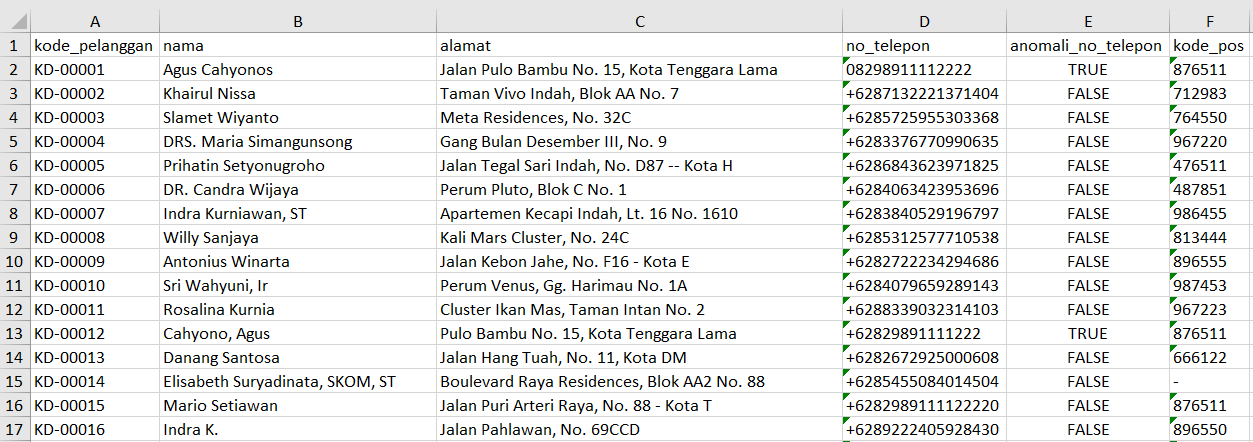

Sampai pada bab ini, Anda telah menyelesaikan profiling dan standarisasi untuk lima kolom berikut :
- Nama
- No Telepon
- Kode Pos
- Alamat
- Aktif

Dan menyimpan hasil standarisasi ke dalam file-file berikut:
- nama.xlsx
- no_telepon.xlsx
- kode_pos.xlsx
- alamat.xlsx
- aktif.xlsx

Kita akan menyatukan seluruh file ini ke dalam satu file: staging.teks.xlsx dengan proses berikut :
- Membaca tiap file Excel dan menyimpannya dalam berbagai variable.
- Menggabungkan variable-variable dengan function merge.
- Hasil gabungan ini kita ambil field "kode_pelanggan", "nama", "alamat", "no_telepon", "kode_pos", dan "aktif".
- Hasil gabungan kita tulis ke dalm file teks.xlsx.

Khusus untuk function merge, berikut adalah contohnya:
> ```staging.teks <- merge(x=staging.nama, y=staging.no_telepon, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)```

Berikut adalah penjelasannya.

| Elemen | Keterangan |
| :----- | :--------- |
| staging.text | Nama variable untuk menyimpan hasil penggabungan. Variable ini akan digunakan secara berulang dan bertahap untuk digabungkan kembali dengan variable lainnya. |
| x = staging.nama | - x = Merupakan parameter untuk variable pertama <br>- staging.nama = Variable pertama yang akan digabung |
| y = staging.no_telepon | - y = Merupakan parameter untuk variable kedua <br>- staging.no_telepon = Variable kedua yang akan digabung |
| by.x = "kode_pelanggan" | Penggabungan memerlukan referensi. Dan referensi untuk data frame adalah mana kolom yang nilainya sama dari kedua sisi.<br><br>Parameter by.x ini adalah menyatakan referensi kolom dari variable pertama, yaitu kolom "kode_pelanggan" |
| by.y = "kode_pelanggan" | Parameter by.y ini adalah menyatakan referensi kolom dari variable kedua, yaitu kolom "kode_pelanggan" |

In [45]:
library(openxlsx)

#Membaca tiap file staging Excel dan menyimpannya dalam variable bernama awalan staging 
staging.nama <- read.xlsx("staging.nama.xlsx")
staging.no_telepon <- read.xlsx("staging.no_telepon.xlsx")
staging.kode_pos <- read.xlsx("staging.kode_pos.xlsx")
staging.alamat <- read.xlsx("staging.alamat.xlsx")
staging.aktif <- read.xlsx("staging.aktif.xlsx")

#Menggabungkan variable staging dengan function merge
staging.teks <- merge(x=staging.nama, y=staging.no_telepon, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)
staging.teks <- merge(x=staging.teks, y=staging.kode_pos, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)
staging.teks <- merge(x=staging.teks, y=staging.alamat, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)
staging.teks <- merge(x=staging.teks, y=staging.aktif, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)
staging.teks <- staging.teks[c("kode_pelanggan","nama", "alamat", "no_telepon", "anomali_no_telepon", "kode_pos")]
write.xlsx(file = "staging.teks.byme.xlsx", staging.teks)

## [16] Kesimpulan
Anda telah menyelesaikan dua bab yang cukup intensif ini dengan mengidentifikasi pola dan berbagai cara mengganti teks sehingga menjadi standar yang diterima.

Untuk rangkuman, berbeda dengan bab sebelumnya. Kali ini kita berikan rangkuman table untuk daftar fungsi, pola regex dan SQL dari apa yang telah Anda telah pelajari dan lakukan untuk melakukan profiling dan standarisasi.

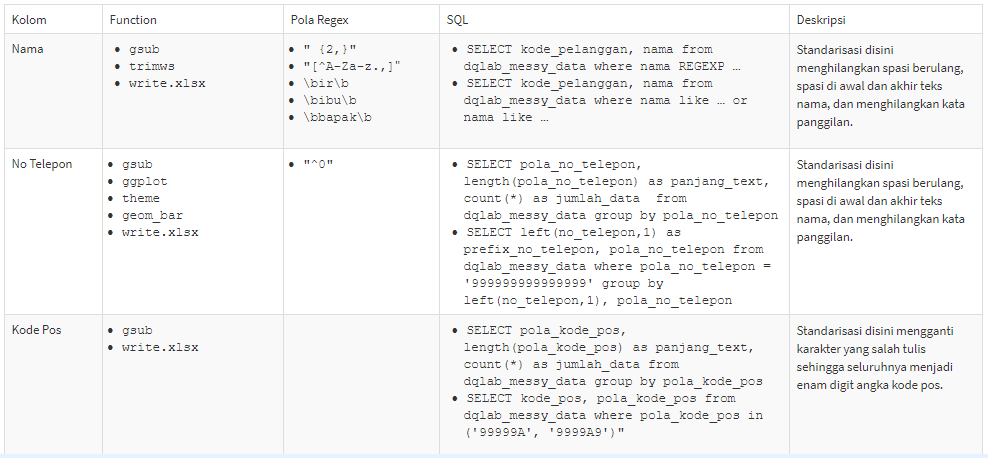

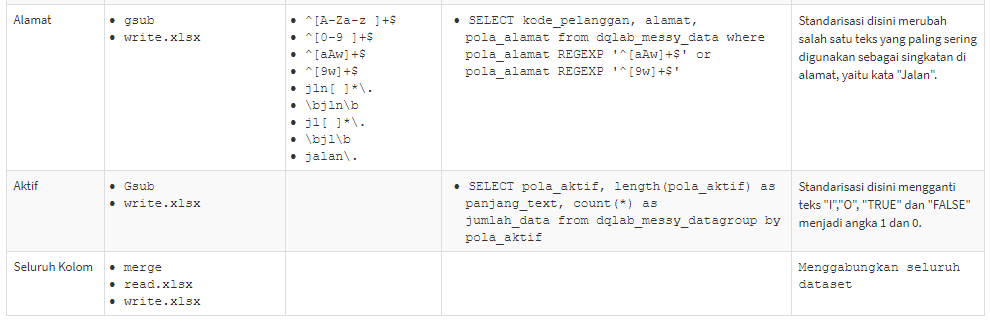

# SQL dan Sistem Database Relasional
Kemampuan data wrangling tidak terlepas dari kemampuan untuk membaca berbagai sumber data, salah satu yang paling populer adalah membaca sistem database relasional.

## [1] Pendahuluan
Kolom __tanggal lahir__ pada data pelanggan adalah kolom lain yang berisi informasi sangat penting. Dengan data tanggal yang benar, kita bisa menghitung umur dan bisa mengenal demografik pelanggan dengan lebih baik.

Ini berimplikasi pada cara kita melakukan pemaketan produk, pemasaran, pendekatan relasi, dan lain-lain.

Pada bab ini kita akan melakukan profiling dan standarisasi yang diperlukan untuk data tanggal lahir yang pada bab awal telah ditampilkan sebagian sebagai berikut.

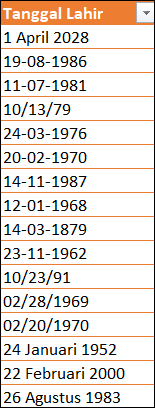

## [2] Identifikasi awal kolom Tanggal Lahir
Profiling tanggal lahir jika menggunakan observasi seperti pada pengantar, kita akan mendapatkan tiga pola berikut :
- Terdapat format yang terdiri dari angka hari, nama bulan dan angka tahun dengan pemisah spasi (" ") dengan panjang nama bulan bervariasi. Format ini di beberapa aplikasi biasanya ditulis dengan dd MMM yyyy.
- Terdapat format yang terdiri dari angka hari, angka bulan dan angka tahun dengan pemisah tanda minus ("-"). Format ini di beberapa aplikasi biasanya ditulis dengan dd-MM-yyyy. Di R kita bisa menggunakan
- Terdapat format yang terdiri dari angka bulan, angka hari dan angka tahun dengan pemisah garis miring ("/"). Format ini di beberapa aplikasi biasanya ditulis dengan MM/dd/yyyy.

Untuk melakukan profiling awal apakah format ini benar semua sebelum kita lakukan standarisasi, maka bisa diambil strategi berikut (nomor urut sesuai format no urut di atas) :
- Melakukan pengelompokan terhadap komponen non huruf untuk memastikan nama bulan konsisten semua, misalkan bulan pertama ditulis Januari, dan tidak ada variasi seperti January atau Jan.
- Menggunakan statistik max dan min untuk tiap angka hari, bulan dan tahun. Ini tentunya tidak memberi jaminan akan memberikan pola yang benar. Sebagai contoh untuk tanggal 31-02-1998, ini adalah tanggal yang tidak valid. Tapi jika pisahkan komponennya: 31 untuk hari, 2 untuk bulan dan 1998 untuk tahun – semuanya angka valid untuk min dan max.
- Menggunakan statistik max dan min untuk tiap angka hari, bulan dan tahun. Ini tentunya tidak memberi jaminan tanggal yang benar dengan alasan yang sama dengan poin no 2.

Profiling nomor 2 dan 3 tidak akan kita lakukan karena alasan yang disebutkan. Kita akan fokus ke profiling pertama dengan menggunakan gabungan perintah SQL dan function-function di R.

Berikut adalah tahapannya:
- Gunakan perintah SQL untuk mengambil kolom tanggal lahir dengan filter pola tanggal yang memiliki huruf.

> ```SELECT tanggal_lahir from dqlab_messy_data where pola_tanggal_lahir like '%A%'```

Atau menggunakan pola regex [A-Za-z] – artinya mengandung huruf kecil atau besar dari a sampai z – maka perintah SQL nya adalah sebagai berikut.

>```SELECT tanggal_lahir from dqlab_messy_data where tanggal_lahir REGEXP '[A-Za-z]'```

Untuk jawaban tugas praktek, kita akan gunakan versi regex.
- Menghapus karakter digit dan spasi dengan function __gsub__ dan pola regex [0-9 ].
> ```gsub('[0-9 ]','', data.pelanggan$tanggal_lahir)```

- Menggunakan fungsi __unique__ yang akan melakukan grouping nilai teks nama bulan.
>```unique(data.pelanggan$tanggal_lahir)```

In [ ]:
library(RMySQL)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Melakukan query data untuk format tanggal yang memiliki huruf dengan regex [A-Za-z]
sql <- "SELECT tanggal_lahir from dqlab_messy_data where tanggal_lahir REGEXP '[A-Za-z]'"
rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)

# Menghapus karakter digit dan spasi dengan function gsub dan pola regex [0-9 ].
data.pelanggan$tanggal_lahir <- gsub('[0-9 ]','', data.pelanggan$tanggal_lahir)

#Melakukan grouping nama bulan dengan function unique
unique(data.pelanggan$tanggal_lahir)

#Menutup seluruh koneksi
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [48]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


library(sqldf)
# Mengambil data untuk format tanggal yang memiliki huruf dengan regex [A-Za-z] atau like '%A%'
data.pelanggan <- sqldf("SELECT Tanggal_Lahir FROM data WHERE Pola_Tanggal_Lahir LIKE '%A%'")

# Menghapus karakter digit dan spasi dengan function gsub dan pola regex [0-9 ].
data.pelanggan$Tanggal_Lahir <- gsub('[0-9 ]','', data.pelanggan$Tanggal_Lahir)

#Melakukan grouping nama bulan dengan function unique
unique(data.pelanggan$Tanggal_Lahir)

[1] "April"     "Januari"   "Februari"  "Agustus"   "Desember"  "Maret"    
 [7] "Juni"      "Juli"      "Oktober"   "September" "November"  "Mei"

Pada hasil di atas, perhatihan bahwa nama bulan ada 12 dan tidak ada variasi. Dengan demikian data tinggal dirubah sesuai list ini pada praktek selanjutnya.

## [3] Mengganti Januari s/d Desember menjadi angka
Hasil profiling praktek sebelumnya mendapatkan daftar nama bulan yang akan menjadi dasar kita untuk merubah daftar nama ini menjadi angka pada praktek berikut. Untuk melakukannya kita menggunakan aturan sederhana (simple rule) atau penggantian sederhana, dari teks satu menjadi teks lainnya.

Kita tetap menggunakan function __gsub__ namun tanpa pola regex – mengganti nama bulan dengan angka bulan terkait.  Jadi "Januari" diganti menjadi "1", "Februari" diganti menjadi "2", dan seterusnya.

Namun selain angka, kita akan sekalian merubah format ini menjadi dd-MM-yyyy dengan pemisah tanda minus (-). Dengan demikian, karena nama bulan merupakan teks yang diapit oleh hari dan bulan. Maka "Januari" diubah menjadi "-1-", "Februari" diganti menjadi "-2-", dan seterusnya.

Berikut adalah contoh gsub untuk mengganti "__Januari__" menjadi "__1__" untuk variable __data.pelanggan$tanggal_lahir__.
>```gsub("Januari","-01-", data.pelanggan$tanggal_lahir)```

In [ ]:
library(RMySQL)
#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Melakukan query untuk data yang mengandung huruf alfabet
sql <- "select tanggal_lahir from dqlab_messy_data where tanggal_lahir regexp '[a-z]'"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)
#Menghilangkan spasi
data.pelanggan$tanggal_lahir <- gsub(" ","", data.pelanggan$tanggal_lahir)

#Melakukan standarisasi nama bulan ke angka bulan
data.pelanggan$tanggal_lahir <- gsub("Januari","-01-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Februari","-02-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Maret","-03-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("April","-04-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Mei","-05-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Juni","-06-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Juli","-07-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Agustus","-08-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("September","-09-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Oktober","-10-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("November","-11-", data.pelanggan$tanggal_lahir)
data.pelanggan$tanggal_lahir <- gsub("Desember","-12-", data.pelanggan$tanggal_lahir)
data.pelanggan

#Menutup seluruh koneksi MySQL
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [55]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))

library(sqldf)
# Mengambil data untuk format tanggal yang memiliki huruf dengan regex [A-Za-z] atau like '%A%'
data.pelanggan <- sqldf("SELECT Tanggal_Lahir FROM data WHERE Pola_Tanggal_Lahir LIKE '%A%'")

#Menghilangkan spasi
data.pelanggan$Tanggal_Lahir <- gsub(" ","", data.pelanggan$Tanggal_Lahir)

#Melakukan standarisasi nama bulan ke angka bulan
data.pelanggan$Tanggal_Lahir <- gsub("Januari","-01-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Februari","-02-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Maret","-03-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("April","-04-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Mei","-05-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Juni","-06-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Juli","-07-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Agustus","-08-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("September","-09-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Oktober","-10-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("November","-11-", data.pelanggan$Tanggal_Lahir)
data.pelanggan$Tanggal_Lahir <- gsub("Desember","-12-", data.pelanggan$Tanggal_Lahir)
data.pelanggan

Tanggal_Lahir
1-04-2028
24-01-1952
22-02-2000
26-08-1983
1-12-1964
14-03-1979
28-02-1969
20-06-2001
14-07-1977
23-10-1991


## [4] Melakukan Standarisasi Format dd-MM-yyyy
Pada praktek sebelumnya kita telah mengganti format tanggal yang memiliki nama bulan ke format dd-MM-yyyy. Untuk sisa format satunya lagi yang masih dalam bentuk MM/dd/yyyy, kita akan lakukan standarisasi juga menjadi dd-MM-yyyy.

Banyak cara untuk melakukan ini, tapi untuk praktek ini kita lakukan dengan tahapan berikut.

### Memisahkan Kolom
Tahap pertama, kita akan memisahkan teks tanggal menjadi tiga kolom, yaitu hari, bulan dan tahun- dengan pemisah adalah tanda garis miring (/).

Function colsplit dari package reshape2 sangat cocok untuk mencapai tujuan ini. Syntax dari colsplit adalah sebagai berikut.
>```colsplit(string, pattern, names)```

dimana:
- string: adalah teks yang akan dipisahkan.
- pattern: pola regex yang digunakan untuk memisahkan teks.
- names: vector yang berisi nama-nama kolom yang dipisahkan.

Dan menyesuaikan kebutuhan kita, penggunaannya adalah sebagai berikut.
>```colsplit(string, pattern, names)```

Menggabungkan kembali tiga kolom: hari, bulan dan tahun dengan function paste dan tanda minus (-) sebagai karakter penggabungan.
>```tanggal.split <- colsplit(data.pelanggan$tanggal_lahir,"/",c("bulan","hari","tahun"))```

dimana:
- __split__ : variable untuk menyimpan hasil split
- __pelanggan$tanggal_lahir__ : data dari kolom tanggal_lahir dari variable data.pelanggan.
- __"/"__ : tanda garis miring, pola yang digunakan untuk memisahkan teks.
- __c("bulan","hari","tahun")__ : vector yang berisi nama-nama kolom yang dipisahkan secara terurut, yaitu dimulai dari bulan yang kemudian diikuti hari dan tahun.


### Menggabungkan Kolom
Tahap kedua adalah menggabungkan kembali tiga kolom tersebut dengan urutan hari, bulan dan tahun dengan function paste dan tanda minus (-) sebagai karakter penggabungan. Syntaxnya adalah sebagai berikut.
>```paste(..., sep = " ")```

dimana:
- … : adalah daftar variable atau teks dengan pemisah koma.
- sep = " " : adalah karakter antara pada saat penggabungan teks. Pada contoh ini adalah karakter spasi.

Dan menyesuaikan kebutuhan kita, maka function paste yang digunakan adalah sebagai berikut.
>```paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")```

dimana:
- __split\$hari__ : kolom __hari__ dari variable __tanggal.split__. Ini kita dapatkan dari hasil split sebelumnya.
- __split\$bulan__ : kolom __bulan__ dari variable __tanggal.split__. Ini kita dapatkan dari hasil split sebelumnya.
- __split$tahun__ : kolom __tahun__ dari variable __tanggal.split__. Ini kita dapatkan dari hasil split sebelumnya.
- __sep = "-"__   : adalah karakter antara pada saat penggabungan teks. Pada contoh ini adalah karakter minus (-).

In [1]:
library(RMySQL)
library(reshape2)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")
#Mengambil data yang memiliki tanda garis miring /
sql <- "select tanggal_lahir from dqlab_messy_data where tanggal_lahir like '%/%'"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)

#Melakukan split dan menyimpannya ke variable tanggal.split dengan urutan bulan, hari dan tahun
tanggal.split <- colsplit(data.pelanggan$tanggal_lahir,"/",c("bulan","hari","tahun"))

#Menggabungkan kembali dalam urutan hari, bulan dan tahun dan menyimpannya kembali ke data.pelanggan$tanggal_lahir
data.pelanggan$tanggal_lahir <- paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")
data.pelanggan$tanggal_lahir 
#Menutup seluruh koneksi MySQL
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [6]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))

library(sqldf)
# Mengambil data yang memiliki tanda garis miring /
data.pelanggan <- sqldf("SELECT Tanggal_Lahir as tanggal_lahir FROM data WHERE Tanggal_Lahir LIKE '%/%'")

#Melakukan split dan menyimpannya ke variable tanggal.split dengan urutan bulan, hari dan tahun
tanggal.split <- colsplit(data.pelanggan$tanggal_lahir,"/",c("bulan","hari","tahun"))
tanggal.split$tahun

#Menggabungkan kembali dalam urutan hari, bulan dan tahun dan menyimpannya kembali ke data.pelanggan$tanggal_lahir
data.pelanggan$tanggal_lahir <- paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")
data.pelanggan$tanggal_lahir

[1]   79   91 1969 1970    1    1 1983 1987   77 1967 1987 1977 1950    1 1969
[16] 1969 1977 1987 1987 1972 1987 1974 1990 1969 1988 1988    1 1964    1 1990
[31] 1978 1969 1971    1 2008 1968   77 1997 1967 1967   68 1968 1987 1987    1
[46] 1968 1963    1 1997    1 1967 1987   86   95 1988 1969   79   68 1970

[1] "13-10-79"   "23-10-91"   "28-2-1969"  "20-2-1970"  "1-1-1"     
 [6] "1-1-1"      "26-8-1983"  "17-7-1987"  "7-7-77"     "8-2-1967"  
[11] "14-11-1987" "12-7-1977"  "8-19-1950"  "31-1-1"     "28-2-1969" 
[16] "28-2-1969"  "12-7-1977"  "25-2-1987"  "17-7-1987"  "12-1-1972" 
[21] "25-6-1987"  "25-7-1974"  "5-9-1990"   "28-2-1969"  "14-1-1988" 
[26] "18-8-1988"  "1-1-1"      "1-12-1964"  "31-1-1"     "24-9-1990" 
[31] "24-2-1978"  "29-2-1969"  "12-1-1971"  "31-1-1"     "8-8-2008"  
[36] "23-12-1968" "20-12-77"   "15-2-1997"  "29-11-1967" "30-11-1967"
[41] "7-7-68"     "7-7-1968"   "20-10-1987" "14-11-1987" "21-1-1"    
[46] "23-6-1968"  "29-12-1963" "20-6-1"     "15-2-1997"  "1-1-1"     
[51] "29-12-1967" "20-10-1987" "17-8-86"    "23-10-95"   "3-10-1988" 
[56] "28-2-1969"  "23-10-79"   "7-7-68"     "20-2-1970"

Pada hasil, perhatikan bahwa  terlihat ada ketidakseragaman format tahun. Ada yang 1, 79, 81, dan seterusnya. Ini harus diperbaiki dengan rule sederhana pada praktek selanjutnya.

## [5] Memperbaiki format tahun satu dan dua digit
Dan berdasarkan praktek sebelumnya juga, kita perlu definisikan rule standarisasi yang harus dilakukan untuk tahun.

Untuk yang dua digit – angka 10 sampai dengan 99 – secara logika maka harusnya adalah di tahun berawalan 19. Contoh: 79 adalah 1979. Sedangkan jika satu digit – angka 0 sampai dengan 9 – adalah tahun berawalan angka 200. Contoh: 1 adalah tahun 2001.

Ini hal yang tentu perlu diperdebatkan. Tapi dengan menggunakan tingkat kemungkinan dan kesepakatan, maka rule inilah yang akan jadi patokan nanti ke praktek selanjutnya.

Dengan kesepakatan ini, jika menggunakan gsub akan sangat panjang. Tapi kita menggunakan function __sapply__ untuk iterasi seluruh data dan melakukan pergantian. Perintahnya adalah sebagai berikut.
>```sapply(tanggal.split$tahun, function(x) if(x>=0 & x<10) 2000+x else if(x>=10 & x<100) 1900+x else x)```

Berikut adalah keterangan tahap demi tahap dari perintah di atas.

| Elemen Perintah | Keterangan |
| :-------------- | :--------- |
| sapply | Adalah fungsi untuk mengakses satu per satu item data frame ataupun list, dan mengolahnya dengan function yang kita definisikan di dalam argumen kedua. |
| tanggal.split\$tahun | Kolom tahun dari variable tanggal.split. |
| function(x) | Definisi function dengan x mewakili tiap item yang diakses oleh sapply, dalam hal ini tiap item dari tanggal.split$tahun.|

Kemudian ada konstruksi if...else sebagai berikut.

| Elemen Perintah | Keterangan |
| :-------------- | :--------- |
| if(x>=0 & x<10) 2000+x | Penggunaan if untuk cek kondisi. Ini artinya jika item x lebih besar dari angka 0 dan lebih kecil dari angka 10 maka x ditambahkan dengan 2000. |
| else if(x>=10 & x<100) 1900+x | Jika kondisi di atas tidak dipenuhi, kita cek kondisi berikutnya yaitu jika item x lebih besar sama dengan dari angka 10 dan lebih kecil dari angka 100 maka x ditambahkan dengan 1900. |
| else x | Jika seluruh kondisi di atas tidak terpenuhi, maka kita kembalikan nilai asli yaitu x. |

In [ ]:
library(RMySQL)
library(reshape2)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

sql <- "select tanggal_lahir from dqlab_messy_data where tanggal_lahir like '%/%'"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)

#Melakukan split dan menyimpannya ke variable tanggal.split dengan urutan bulan, hari dan tahun
tanggal.split <- colsplit(data.pelanggan$tanggal_lahir,"/",c("bulan","hari","tahun"))

#Memperbaiki data tahun dengan format satu dan dua digit angka dengan sapply
tanggal.split$tahun <- sapply(tanggal.split$tahun, function(x) if(x>=0 & x<10) 2000+x else if(x>=10 & x<100) 1900+x else x)
  
#Menggabungkan kembali dalam urutan hari, bulan dan tahun dengan tanda separator "-" dan menyimpannya kembali ke data.pelanggan$tanggal_lahir 
data.pelanggan$tanggal_lahir <- paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")
data.pelanggan$tanggal_lahir
  
#Menutup seluruh koneksi MySQL
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [7]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))

library(sqldf)
# Mengambil data yang memiliki tanda garis miring /
data.pelanggan <- sqldf("SELECT Tanggal_Lahir as tanggal_lahir FROM data WHERE Tanggal_Lahir LIKE '%/%'")

#Melakukan split dan menyimpannya ke variable tanggal.split dengan urutan bulan, hari dan tahun
tanggal.split <- colsplit(data.pelanggan$tanggal_lahir,"/",c("bulan","hari","tahun"))

#Memperbaiki data tahun dengan format satu dan dua digit angka dengan sapply
tanggal.split$tahun <- sapply(tanggal.split$tahun, function(x) if(x>=0 & x<10) 2000+x else if(x>=10 & x<100) 1900+x else x)
tanggal.split$tahun
    
#Menggabungkan kembali dalam urutan hari, bulan dan tahun dan menyimpannya kembali ke data.pelanggan$tanggal_lahir
data.pelanggan$tanggal_lahir <- paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")
data.pelanggan$tanggal_lahir

[1] 1979 1991 1969 1970 2001 2001 1983 1987 1977 1967 1987 1977 1950 2001 1969
[16] 1969 1977 1987 1987 1972 1987 1974 1990 1969 1988 1988 2001 1964 2001 1990
[31] 1978 1969 1971 2001 2008 1968 1977 1997 1967 1967 1968 1968 1987 1987 2001
[46] 1968 1963 2001 1997 2001 1967 1987 1986 1995 1988 1969 1979 1968 1970

[1] "13-10-1979" "23-10-1991" "28-2-1969"  "20-2-1970"  "1-1-2001"  
 [6] "1-1-2001"   "26-8-1983"  "17-7-1987"  "7-7-1977"   "8-2-1967"  
[11] "14-11-1987" "12-7-1977"  "8-19-1950"  "31-1-2001"  "28-2-1969" 
[16] "28-2-1969"  "12-7-1977"  "25-2-1987"  "17-7-1987"  "12-1-1972" 
[21] "25-6-1987"  "25-7-1974"  "5-9-1990"   "28-2-1969"  "14-1-1988" 
[26] "18-8-1988"  "1-1-2001"   "1-12-1964"  "31-1-2001"  "24-9-1990" 
[31] "24-2-1978"  "29-2-1969"  "12-1-1971"  "31-1-2001"  "8-8-2008"  
[36] "23-12-1968" "20-12-1977" "15-2-1997"  "29-11-1967" "30-11-1967"
[41] "7-7-1968"   "7-7-1968"   "20-10-1987" "14-11-1987" "21-1-2001" 
[46] "23-6-1968"  "29-12-1963" "20-6-2001"  "15-2-1997"  "1-1-2001"  
[51] "29-12-1967" "20-10-1987" "17-8-1986"  "23-10-1995" "3-10-1988" 
[56] "28-2-1969"  "23-10-1979" "7-7-1968"   "20-2-1970"

Terlihat data tanggal lahir untuk porsi data yang memiliki tanda garis miring sekarang sudah terstandarisai sesuai keinginan kita.

## [6] Menggabungkan data standarisasi dengan rbind
Perhatikan query untuk mengambil data yang digunakan pada dua praktek sebelumnya mewakili dua segmen dataset yang berbeda.


### Dua Porsi Data
Standarisasi perlu dilakukan per segmen, dan pada akhirnya perlu digabungkan. Kita akan gunakan dua query berikut, satunya adalah untuk query yang mengembalikan hasil dimana tanggal mengandung garis miring sebagai berikut :
>```select tanggal_lahir from dqlab_messy_data where tanggal_lahir like '%/%'```

Ini akan kita lakukan standarisasi dengan melakukan pemisahan dan penggabungan kolom.

Dan untuk query yang tidak mengandung garis miring sebagai berikut.
>```select tanggal_lahir from dqlab_messy_data where not tanggal_lahir like '%/%'```

dimana porsi data ini akan mengembalikan dua format, yaitu :
- data yang memiliki nama bulan
- dan data tanggal dengan format dd-MM-yyyy.

Dengan demikian, standarisasi yang kita lakukan akan sama dengan praktek standarisasi simple rule untuk nama bulan dimana porsi format dd-MM-yyyy tidak akan terkena efek apapun.

### RBind

Function rbind – yang merupakan singkatan dari row bind – digunakan untuk menggabungkan data secara vertikal dari baris-baris data yang memiliki struktur kolom dan tipe data yang sama perlu.

Syntaxnya sangat simple, isi argumennya adalah kumpulan vector, data frame, ataupun matrix.
>```rbind(data.frame1, data.frame2, …)```

Hasilnya adalah vector, data.frame ataupun matrix yang sudah tergabung.


Pada praktek kali ini kita akan melakukan proses-proses berikut :
- Melakukan dua query ke database untuk mendapatkan dua porsi data: satu yang mengandung garis miring dan satu yang tidak.
- Query pertama adalah berikut, hasilnya akan dimasukkan ke variable __pelanggan1__.
>```select kode_pelanggan, tanggal_lahir from dqlab_messy_data where tanggal_lahir like '%/%'```

- Query kedua adalah berikut, hasilnya akan dimasukkan ke variable __pelanggan2__.
>```select kode_pelanggan, tanggal_lahir from dqlab_messy_data where not tanggal_lahir like '%/%'```

- Setelah itu tiap porsi data akan dilakukan standarisasi berikut.
    - Untuk data.pelanggan1 akan dilakukan standarisasi menggunakan __split__, __paste__ dan __sapply__.
    - Untuk data.pelanggan2 akan dilakukan standarisasi nama bulan menjadi angka menggunakan _simple rule_ dengan __gsub__.
- Setelah standarisasi kedua dataset ini akan digabungkan kembali menggunakan __rbind__.
- Hasil penggabungan ini akan kita tuliskan di file Excel bernama __xlsx__ dengan function __write.xlsx__.

In [ ]:
library(RMySQL)
library(reshape2)
library(openxlsx)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Mengambil data yang memiliki tanda garis miring /
sql <- "select kode_pelanggan, tanggal_lahir from dqlab_messy_data where tanggal_lahir like '%/%'"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan1 <- fetch(rs, n=-1)
dbClearResult(rs)
#Melakukan split dan menyimpannya ke variable tanggal.split dengan urutan bulan, hari dan tahun
tanggal.split <- colsplit(data.pelanggan1$tanggal_lahir,"/",c("bulan","hari","tahun"))

#Memperbaiki data tahun dengan format satu dan dua digit angka
tanggal.split$tahun <- sapply(tanggal.split$tahun, function(x) if(x>=0 & x<10) 2000+x else if(x>=10 & x<100) 1900+x else x)	   

#Menggabungkan kembali dalam urutan hari, bulan dan tahun dan menyimpannya kembali ke data.pelanggan$tanggal_lahir
data.pelanggan1$tanggal_lahir <- paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")

#Mengambil data yang tidak memiliki tanda garis miring /
sql <- "select kode_pelanggan, tanggal_lahir from dqlab_messy_data where not tanggal_lahir like '%/%'"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan2 <- fetch(rs, n=-1)
dbClearResult(rs)

#Mengganti Januari s/d Desember menjadi angka
data.pelanggan2$tanggal_lahir <- gsub(" ","", data.pelanggan2$tanggal_lahir)

data.pelanggan2$tanggal_lahir <- gsub("Januari","-01-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Februari","-02-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Maret","-03-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("April","-04-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Mei","-05-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Juni","-06-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Juli","-07-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Agustus","-08-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("September","-09-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Oktober","-10-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("November","-11-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Desember","-12-", data.pelanggan2$tanggal_lahir) 
#Menggabungkan dua porsi data pelanggan secara vertikal dengan rbind sesuai urutan porsi data yang diquery
data.gabungan <- rbind(data.pelanggan1, data.pelanggan2)
data.gabungan
write.xlsx(data.gabungan, file="staging_tanggal_lahir1.xlsx")

#Menutup seluruh koneksi MySQL
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)


In [9]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)
library(reshape2)
library(sqldf)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))



# Mengambil data yang memiliki tanda garis miring / (data.pelanggan1)
data.pelanggan1 <- sqldf("SELECT Kode_Pelanggan as kode_pelanggan, Tanggal_Lahir as tanggal_lahir FROM data WHERE Tanggal_Lahir LIKE '%/%'")

# Melakukan split dan menyimpannya ke variable tanggal.split dengan urutan bulan, hari dan tahun
tanggal.split <- colsplit(data.pelanggan1$tanggal_lahir,"/",c("bulan","hari","tahun"))

# Memperbaiki data tahun dengan format satu dan dua digit angka dengan sapply
tanggal.split$tahun <- sapply(tanggal.split$tahun, function(x) if(x>=0 & x<10) 2000+x else if(x>=10 & x<100) 1900+x else x)
    
#Menggabungkan kembali dalam urutan hari, bulan dan tahun dan menyimpannya kembali ke data.pelanggan$tanggal_lahir
data.pelanggan1$tanggal_lahir <- paste(tanggal.split$hari, tanggal.split$bulan, tanggal.split$tahun, sep="-")
    

    
# Mengambil data yang tidak memiliki tanda garis miring / (data.pelanggan2)
data.pelanggan2 <- sqldf("SELECT Kode_Pelanggan as kode_pelanggan, Tanggal_Lahir as tanggal_lahir FROM data WHERE NOT Tanggal_Lahir LIKE '%/%'")

# Mengganti Januari s/d Desember menjadi angka
data.pelanggan2$tanggal_lahir <- gsub(" ","", data.pelanggan2$tanggal_lahir)

data.pelanggan2$tanggal_lahir <- gsub("Januari","-01-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Februari","-02-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Maret","-03-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("April","-04-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Mei","-05-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Juni","-06-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Juli","-07-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Agustus","-08-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("September","-09-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Oktober","-10-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("November","-11-", data.pelanggan2$tanggal_lahir)
data.pelanggan2$tanggal_lahir <- gsub("Desember","-12-", data.pelanggan2$tanggal_lahir) 
      
                              
# Menggabungkan dua porsi data pelanggan secara vertikal dengan rbind sesuai urutan porsi data yang diquery
data.gabungan <- rbind(data.pelanggan1, data.pelanggan2)
data.gabungan
write.xlsx(data.gabungan, file="staging_tanggal_lahir1.byme.xlsx")

kode_pelanggan,tanggal_lahir
KD-00056,13-10-1979
KD-00002,23-10-1991
KD-00075,28-2-1969
KD-00076,20-2-1970
KD-00088,1-1-2001
KD-00119,1-1-2001
KD-00096,26-8-1983
KD-00090,17-7-1987
KD-00045,7-7-1977
KD-00012,8-2-1967


## [7] Menggunakan as.Date untuk pengecekan konversi keseluruhan
Dari hasil standarisasi praktek terakhir terlihat ada masalah di data tanggal lahir ini. Untuk melihat data mana yang bermasalah, kita coba gunakan kembalian error dari function as.Date – yang mencoba melakukan konversi terhadap kolom tanggal lahir.

Syntax dari function __as.Date__ adalah sebagai berikut.
>```as.Date(data, format)```

dimana:
- __data__   : teks yang akan dikonversi menjadi tipe data Date.
- __format__ : pola format data tanggal dengan elemen berikut.

| Simbol | Representase | Contoh |
| :----- | :----------- | :----- |
| %d | hari (0-31) | 01-31 |
| %m | bulan (00-12) | 00-12 |
| %b<br>%B | Nama bulan yang dipersingkat (Inggris)<br>Nama bulan penuh (Inggris) | Feb <br>February |
| %y <br>%Y | 2-digit tahun <br>4-digit tahun | 92 <br>1992 |

Dan menyesuaikan kebutuhan kita – dengan anggapan format yang kita butuhkan untuk standarisasi dd-MM-yyyy – maka function as.Date adalah sebagai berikut.
>``` as.Date(data.pelanggan$tanggal_lahir, "%d-%m-%Y")```

Function ini akan mengembalikan tanggal jika berhasil atau missing value NA jika tidak berhasil.  

Seluruh hasil as.Date perlu dikonversi lagi ke dalam standar format kita dengan tambahan function format berikut.
>```format(as.Date(data.pelanggan$tanggal_lahir, "%d-%m-%Y"),"%d-%m-%Y")```

In [16]:
library(openxlsx)
#Membaca file staging Excel hasil standarisasi tanggal lahir 
data.pelanggan <- read.xlsx("staging_tanggal_lahir1.xlsx")

#Menggunakan as.Date untuk melakukan konversi kolom tanggal_lahir dan menyimpannya kembali ke kolom tersebut
data.pelanggan$tanggal_lahir <- format(as.Date(data.pelanggan$tanggal_lahir, "%d-%m-%Y"),"%d-%m-%Y")
data.pelanggan

#Menulis hasil ke file staging_tanggal_lahir2.xlsx
write.xlsx(data.pelanggan, file="staging_tanggal_lahir2.byme.xlsx")

kode_pelanggan,tanggal_lahir
KD-00056,13-10-1979
KD-00002,23-10-1991
KD-00075,28-02-1969
KD-00076,20-02-1970
KD-00088,01-01-2001
KD-00119,01-01-2001
KD-00096,26-08-1983
KD-00090,17-07-1987
KD-00045,07-07-1977
KD-00012,08-02-1967


## [8] Mengidentifikasi Tanggal Lahir Tidak Logis
Sampai tahap ini, kita bisa berkesimpulan kalau seluruh tanggal sudah distandarisasi dengan baik, dimana tanggal yang tidak valid dikonversi menjadi missing value (NA).

Tahap berikutnya berkaitan dengan proses bisnis. Katakanlah bisnis kita baru berdiri 5 tahun dan hanya menerima pelanggan maksimum 75 tahun. Dengan demikian maksimum umur pelanggan yang tercatat haruslah 80 tahun (75 + 5).  Jika lebih dari itu maka diasumsikan salah catat.

Untuk menghitung umur maka kita sebenarnya menghitung perbedaan diantara tanggal lahir dengan tanggal sekarang atau tanggal referensi yang kita gunakan. Tujuan ini bisa tercapati dengan menggunakan function difftime.

Berikut adalah contoh penggunaannya.
>```difftime(tanggal_referensi , data.pelanggan$tanggal_lahir , units = "days"```

dimana:
- __difftime__ : adalah function untuk menghitung perbedaan dua tanggal.
- __tanggal_referensi__ : variable dengan tipe data Date yang akan menjadi referensi untuk menghitung umur.
- __pelanggan$tanggal_lahir__ : variable dengan tipe data Date yang akan menjadi pembanding.
- __unit = "days"__ : perbedaan dalam unit hari (days). Selain hari kita bisa memasukkan detik (secs), menit (mins), jam (hours), dan minggu (weeks).

Perhatikan, karena tidak ada tahun – maka hitungan difftime ini perlu kita konversi ke tahun dengan menggunakna function as.Numeric dan kemudian dibagi dengan angka 365. Lengkapnya sebagai berikut.
>```as.numeric(difftime(tanggal_referensi , data.pelanggan$tanggal_lahir , units = "days"))/365```

dimana:
- numeric: adalah function untuk melakukan konversi data ke numerik.
- /365 : membagi angka dengan 365.

Dengan memasukkan 27 April 2018 sebagai tanggal referensi dan melakukanpengecekan apakah umur di atas 80 tahun dengan perintah berikut, yaitu
>```data.pelanggan$umur_valid <- data.pelanggan$umur <= 80 pengecekan apakah umur di atas 80 tahun dengan perintah berikut.```

diperoleh hasil sebagai berikut.

In [26]:
#format(as.Date('27-04-2018', "%d-%m-%Y"),"%d-%m-%Y")
as.Date('27-4-2018', "%d-%m-%Y")

[1] "2018-04-27"

In [27]:
library(openxlsx)
data.pelanggan <- read.xlsx("staging_tanggal_lahir2.xlsx")

#Membaca data tanggal_lahir sebagai tipe data Date
data.pelanggan$tanggal_lahir <- as.Date(data.pelanggan$tanggal_lahir, "%d-%m-%Y")

#Set tanggal referensi ke 27 April 2018
tanggal_referensi <- as.Date("27-4-2018", "%d-%m-%Y")

#Menghitung perbedaan tanggal dalam tahun
data.pelanggan$umur <- as.numeric(difftime(tanggal_referensi , data.pelanggan$tanggal_lahir , units = "days"))/365

#Pengecekan umur maksimal 80 tahun
data.pelanggan$umur_valid <- data.pelanggan$umur <= 80 

#Format ulang tanggal lahir
data.pelanggan$tanggal_lahir <- format(data.pelanggan$tanggal_lahir, "%d-%m-%Y")

#Menampilkan data.pelanggan
data.pelanggan

#Menulis hasil ke file staging_tanggal_lahir3.xlsx
write.xlsx(data.pelanggan, file="staging_tanggal_lahir3.byme.xlsx")

kode_pelanggan,tanggal_lahir,umur,umur_valid
KD-00056,13-10-1979,38.56438,TRUE
KD-00002,23-10-1991,26.52877,TRUE
KD-00075,28-02-1969,49.19178,TRUE
KD-00076,20-02-1970,48.21370,TRUE
KD-00088,01-01-2001,17.32877,TRUE
KD-00119,01-01-2001,17.32877,TRUE
KD-00096,26-08-1983,34.69315,TRUE
KD-00090,17-07-1987,30.80000,TRUE
KD-00045,07-07-1977,40.83288,TRUE
KD-00012,08-02-1967,51.24932,TRUE


## [9] Konsolidasi Data
Tiba saatnya kita konsolidasi data antara hasil standarisasi bab sebelumnya (kolom bertipe teks) dengan bab ini (kolom bertipe tanggal).

Kita akan menggabungkan file "staging.teks.xlsx" dan file "staging_tanggal_lahir3.xlsx" dengan function merge.

In [29]:
library(openxlsx)
#Membaca tiap file staging Excel dan menyimpannya dalam variable bernama awalan staging 
staging.teks <- read.xlsx("staging.teks.xlsx")
staging.tanggal <- read.xlsx("staging_tanggal_lahir3.xlsx")

#Menggabungkan variable staging dengan function merge
staging.final <- merge(x=staging.teks, y=staging.tanggal, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)

#Menulis hasil ke file staging.final.xlsx
write.xlsx(staging.final, file="staging.final.byme.xlsx")

## [10] Kesimpulan
Pada bab ini Anda telah menyelesaikan standarisasi untuk tanggal lahir, dengan demikian berarti standarisasi dari seluruh kolom data. Berikut adalah rangkuman sebagai pelengkap dari bab sebelumnya. Terlihat walaupun sederhana standarisasi dari tanggal ini, tapi function yang digunakan cukup banyak.

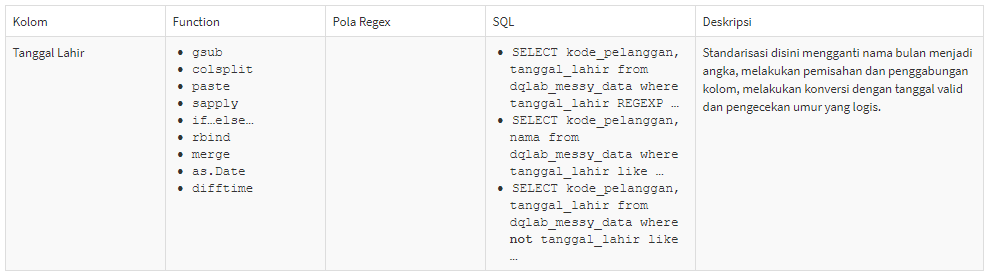

Pada bab ini juga konsolidasi data secara keseluruhan ke dalam satu file yang dapat kita gunakan untuk menjalankan praktek menemukan duplikasi data (data deduplication) dan mealakukan pengisian kolom yang kosong (data enrichment).

# Mencari dan Menangani Data Duplikat
Data duplikat adalah salah satu tantangan paling berat yang perlu ditemukan agar kualitas data meningkat. Bab ini akan mengajarkan bagaimana mencari dan menangani data duplikat.

## [1] Pendahuluan
Duplikasi data adalah kondisi dimana dalam suatu dataset terdapat lebih dari satu data yang sebenarnya mewakili satu entity tapi tidak berhasil dikelompokkan menjadi satu.

Contohnya adalah sebagai berikut, terdapat tiga data pelanggan dengan variasi nama dan alamat yang berbeda, tapi sebenarnya merujuk ke satu orang. Terlihat kodenya juga berbeda-beda.

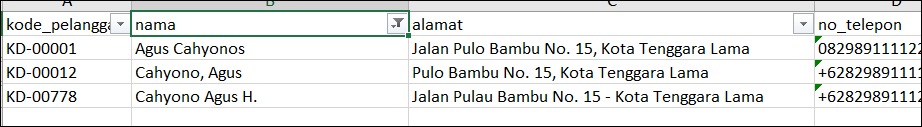

Dengan demikian jika kita menganalisa transaksi juga akan terbagi menjadi tiga. Jika duplikasi ini tidak diperbaiki dengan mengelompokkannya jadi satu – maka kita tidak akan pernah mendapatkan _single customer view_ atau gambaran menyeluruh untuk pelanggan ini.

Dari sisi bisnis, ini bisa mengakibatkan kesempatan yang hilang _(opportunity lost)_. Sebagai contoh, di suatu group bisnis andaikan kita bisa mengintegrasikan seluruh pelanggan, maka kita bisa tahu perilaku belanja tiap orang dan bisa melakukan penawaran yang lebih baik.  

Dengan demikian, menekan biaya pemasaran dan malah meningkatkan penjualan. Tetapi, kesempatan untuk mendapatkan privilege ini hilang karena data yang tidak berhasil ditemukan duplikat dan dengan demikian tidak bisa disatukan.

Masalah ini adalah salah satu hal yang paling memusingkan buat banyak pihak, terutama para untuk para analis termasuk di dalamnya analis bisnis (business analyst) dan data scientist.  Dan saking umumnya, dapat diestimasi bahwa 90 persen perusahaan di seluruh Indonesia mengalami hal seperti ini.

PHI-Integration – perusahaan data management – bahkan mengklaim kalau data duplikat dan kotor seperti ini merupakan indikasi growth bisnis yang bagus.

"Bisnis selalu lebih cepat daripada pengembangan sistem dan sop yang stabil. Dengan demikian pengawalan terhadap data sering dikompromi, ini diperparah dengan kemungkinan human error yang tinggi"

Disclaimer: PHI-Integration adalah perusahaan yang berkontribusi terhadap content di DQLab.id.

Bab ini akan memfokuskan diri membahas teori dan praktek untuk memecahkan masalah ini dengan R.

## [2] Jarak Teks
Dasar dari penemuan duplikat dari kebanyakan sistem database bisnis – yang kebanyakan masih menyimpan teks – adalah mencari persamaan atau mencari "jarak"-nya.

Sebagai contoh :
> Teks __"Agus Cahyono"__ dan __"Agus Cahyono"__ memiliki persamaan 100% atau tidak memiliki jarak, atau jaraknya 0.
<br>Lalu bagaimana dengan teks __"Agus Cahyono"__ dan __"Cahyono Agus"__? Berapa tingkat persamaannya? Berapa jaraknya? Pertanyaan yang sama juga untuk teks __"Agus Cahyono"__ dan __"Cahyono, Agus"__.

Dengan menggunakan ukuran jarak teks, maka dua data dapat dikatakan duplikat jika jaraknya semakin dekat.

Jika dilihat dengan mata manusia seluruh teks tersebut "harusnya" sama dan jaraknya 0. Tapi bagaimana dengan sistem software yang mengenali teks karakter per karakter. Kedua contoh terakhir pasti dikenali tidak sama.

Namun beruntung, di area text mining telah dikembangkan banyak variasi metode dan algoritma untuk menghitung jarak teks dengan berbagai kasus, seperti nama kata yang terbalik di atas.

Pada R, terdapat package yang bernama "stringdist" yang akan kita gunakan untuk menghitung jarak teks dengan function yang kita gunakan adalah __stringdist__. Berikut adalah contoh langsung penggunaannya.
>```stringdist("Agus Cahyono", "Cahyono, Agus", method="cosine")```

dimana:
- __stringdist__ : function untuk menghitung jarak antar teks.
- __"Agus Cahyono"__ : teks pertama yang akan dibandingkan.
- __"Cahyono, Agus"__ : teks kedua yang akan dibandingkan.
- __method="cosine"__ : metode perhitungan jarak teks, dalam hal ini "cosine". Metode ini digunakan karena menggunakan teks dipecah menjadi vector dari sejumlah pasangan karakter (2 karakter, 3 karakter, dan seterusnya) dan tidak melihat posisi karakter.

Catatan: Function __stringdist__ adalah case sensitive, artinya huruf besar dan kecil dari alfabet yang sama dianggap berbeda.

Metode __cosine__ adalah yang akan kita gunakan secara intensif di bab ini. Namun, selain cosine ada metode-metode lain seperti:
- __lv__: Levenstein distance. Perhitungan jarak berdasarkan berapa banyak karakter yang dihapus, ditambahkan, dan dirubah sehingga kedua teks menjadi sama. Nilai jaraknya adalah bilangan integer dari 0 sampai dengan nilai integer tertentu.
- __dl__ : Damerau-Levenstein distance. Pengembangan dari Levenstein distance dimana memperbolehkan transposisi karakter (berpindah tempat). Nilai jaraknya adalah bilangan integer dari 0 sampai dengan nilai integer tertentu.
- __hamming__ : jarak Hamming – jumlah karakter yang berbeda antara kedua teks – dan panjang kedua teks harus sama. Jika tidak, akan mengembalikan Inf. Nilai jaraknya adalah bilangan integer dari 0 sampai dengan nilai integer tertentu.
- __osa__ : Optimal string alignment - mirip dengan dl tapi setiap teks hanya boleh diedit sekali. Nilai jaraknya adalah bilangan integer dari 0 sampai dengan nilai integer tertentu. Ini adalah metode default untuk stringdist.
- __lcs__ : longest common substring – berapa banyak karakter yang harus dibuang dari kedua teks sehingga menjadi teks yang sama. Nilai jaraknya adalah bilangan integer dari 0 sampai dengan nilai integer tertentu.
- __qgram__ : Berapa banyak pasangan n-gram (yaitu potongan n karakter dari teks) yang berbeda. Nilai jaraknya adalah bilangan integer dari 0 sampai dengan nilai integer tertentu.
- __jaccard__ : Adalah jarak yang dihitung berdasarkan berapa banyaknya pasangan n-gram yang berbeda dibagi jumlah pasangan n-gram total. Nilai jaraknya adalah nilai desimal antara 0 sampai dengan 1.
- __jw__ : metode Jaro Wrinkler menghitung perpindahan karakter minimum yang diperlukan sehingga satu teks bertransformasi menjadi teks lain. Nilai jaraknya adalah nilai desimal antara 0 sampai dengan 1.
- __soundex__ : metode jarak antara teks berdasarkan perbedaan pengucapan dalam bahasa Inggris.

In [31]:
#Load library stringdist
library("stringdist")

#Melakukan perhitungan jarak teks
stringdist("Agus Cahyono", "Agus Cahyono", method="cosine")
stringdist("Agus Cahyono", "agus cahyono", method="cosine")
stringdist("Agus Cahyono", "Agus Tjahyono", method="cosine")
stringdist("Agus Cahyono", "Cahyono Agus", method="cosine")
stringdist("Agus Cahyono", "Cahyono, Agus", method="cosine")
stringdist("Agus Cahyono", "Justin Bieber", method="cosine")

[1] 0

[1] 0.131401

[1] 0.1029148

[1] 0

[1] 0.03390822

[1] 0.7407185

## [3] Mencari Duplikat pada Vector
Dengan mengerti konsep jarak teks _(string distance)_ maka kita bisa kaitkan kembali permasalahan awal kita, yaitu mencari duplikat di antara sekian banyak data.

Duplikat dapat didefinisikan sebagai suatu angka hasil _stringdist_ antara dua teks yang di bawah batas maksimal yang diperbolehkan atau _threshold_.

Misalkan, kita bisa putuskan 0.15 dengan metode cosine sebagai _threshold_. Jarak di bawah 0.15 akan dianggap sebagai duplikat.

Bagaimana kita melakukan hal tersebut?

Pada R, dataset biasanya masuk ke data.frame, dan pengecekan duplikat dimulai dari tiap kolom,  dan tiap kolom biasanya disimpan dalam bentuk vector.

Dan dengan demikian, pengecekan kita lakukan di vector. Agar mudah dipahami, mari kita lihat contoh berikut.

Kita ada satu teks nama "Agus Cahyono" yang perlu dibandingkan. Kita biasakan simpan teks ini dalam suatu nama variable – misalkan dengan nama __referensi__, sehingga ketika pengembangan code R nya nanti akan lebih mudah.
>```referensi <- "Agus Cahyono"```

Kemudian kita buat vector yang berisi empat teks nama, kita simpan dengan variable __nama.pelanggan__.
>```nama.pelanggan <- c("Agus Cahyono", "Justin Bieber", "Agus Tjahyono", "Cahyono Agus")```

Tahap berikutnya, kita hitung jarak teks antara referensi dengan vector dengan __stringdist__ menggunakan metode __cosine__. Hasil perhitungan ini kita simpan ke satu variable, misalkan __jarak.teks__.
>```jarak.teks <- stringdist(referensi, nama.pelanggan, method="cosine")```

Jika ditampilkan, hasilnya akan terlihat sebagai berikut.

In [33]:
referensi <- "Agus Cahyono"
nama.pelanggan <- c("Agus Cahyono", "Justin Bieber", "Agus Tjahyono", "Cahyono Agus")
jarak.teks <- stringdist(referensi, nama.pelanggan, method="cosine")
jarak.teks

[1] 0.0000000 0.7407185 0.1029148 0.0000000

Terlihat isi vector indeks pertama ("Agus Cahyono") dan keempat ("Cahyono Agus") persis sama. Dan kalau menggunakan _threshold_ 0.15, maka isi indeks ketiga ("Agus Tjahyono") masih tergolong sama.

Nah, terakhir kita bisa filter isi nama.pelanggan dengan jarak.teks yang lebih kecil sama dengan angka 0.15.
>```nama.pelanggan[jarak.teks <= 0.15]```

Hasilnya akan terlihat sebagai berikut.

In [34]:
nama.pelanggan[jarak.teks <= 0.15]

[1] "Agus Cahyono"  "Agus Tjahyono" "Cahyono Agus"

Dengan demikian tiga item yang dikenali sebagai duplikat telah didapatkan semua.

Catatan: Threshold 0.15 ini adalah contoh. Pada praktek sebenarnya, threshold ini tidak menjadi jaminan akan mendapatkan hasil yang bagus. Sebagai contoh, "Budi Sanjaya" dan "Rudi Sanjaya" adalah entitas yang bisa berbeda tapi masih masuk threshold.

Contoh ini menunjukkan bahwa otomatisasi pencarian duplikat tidak bisa 100%.

In [35]:
#Load library stringdist
library("stringdist")

#Membuat variable referensi dan vector nama
referensi <- "Agus Cahyono"
nama.pelanggan <- c("Agus Cahyono", "Justin Bieber", "Agus Tjahyono", "Cahyono Agus")

#Menghitung jarak referensi dengan vector nama
jarak.teks <- stringdist(referensi, nama.pelanggan, method="cosine")

#Menampilkan variable jarak.teks
jarak.teks

#Data nama pelanggan yang telah difilter dengan threshold 0.15
nama.pelanggan[jarak.teks <= 0.15]

[1] 0.0000000 0.7407185 0.1029148 0.0000000

[1] "Agus Cahyono"  "Agus Tjahyono" "Cahyono Agus"

## [4] Menambahkan Informasi Grouping Duplikat
Dari mekanisme praktek sebelumnya, kita telah belajar bagaimana mengambil referensi dan membandingkan jarak teks ke seluruh item vector.

Pada praktek ini, kita akan melangkah ke tahap selanjutnya yaitu menambahkan informasi grouping seperti berikut.

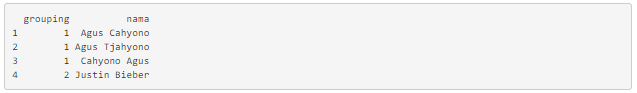

Nomor grouping yang sama menyatakan bahwa data-datanya dianggap sama (duplikat). Pada contoh di atas grouping 1 memiliki tiga data, sedangkan grouping 2 hanya 1 data (tidak ada duplikat).

Untuk melakukan hal ini, banyak cara, yaitu (salah satunya) dengan logika sebagai berikut.
1. Variable __pelanggan__ diisi dengan vector data awal.
2. Inisialisasi variable nomor grouping __(grouping_no)__ ke nilai 1.
3. Proses penemuan duplikat akan dimulai dengan mengambil __referensi__ dari item pertama vector.
4. Variable __pelanggan__ akan dihilangkan item per penemuan duplikat sehingga akhirnya akan hilang semua atau panjang vector menjadi nol.
5. Hitung __jarak teks__ antara referensi dengan seluruh item nama.pelanggan.
6. Filter nama.pelanggan yang memiliki jarak teks sesuai threshold, dan disimpan ke variable __hasil__.
7. Membuat variable __temp__ berupa data frame yang berisi nomor grouping saat ini dan hasil duplikat.
8. Menggabungkan var.temp dengan hasil sebelumnya ke variable __akhir__.
9. Menghilangkan item yang sudah didapatkan duplikatnya dari nama.pelanggan, dengan cara filter item dengan jarak teks di atas threshold.
10. Menaikkan nilai grouping_no sebesar 1.
11. Jika item masih ada, maka proses diulangi dari tahap no 2.

In [28]:
#Load library stringdist
library("stringdist")

#Membuat variable vector nama
nama.pelanggan <- c("Agus Cahyono", "Justin Bieber", "Agus Tjahyono", "Cahyono Agus","Reynold","Reynolds")

#Inisialisai variable untuk hasil.akhir
hasil.akhir <- NULL

#Inisialiasi variable grouping_no dengan nilai 1
grouping_no <- 1

#Melakukan perulangan proses pencarian dengan perintah while, sampai akhirnya isi vector menjadi kosong (panjang = 0)
while(length(nama.pelanggan)>0)
{
  #Variable referensi diisi dengan item pertama variable nama.pelanggan
  referensi <- nama.pelanggan[1]

  #Menghitung jarak antara referensi dengan item-item nama.pelanggan
  jarak.teks <- stringdist(referensi, nama.pelanggan, method="cosine")
    
  #Hasil filter jarak dengan threshold 0.15 disimpan ke variable nama.hasil
  nama.hasil <- nama.pelanggan[jarak.teks <= 0.15]
    
  #Hasil filter jarak dengan threshold 0.15 disimpan ke variable nama.hasil
  var.temp = data.frame(grouping=grouping_no, nama=nama.hasil)

  #Menggabungkan hasil sebelumnya 
  hasil.akhir <- rbind(hasil.akhir, var.temp)

  #Mengambil porsi data yang bukan di dalam threshold dengan menggunakan simbol ! yang mewakili operator not (bukan)
  nama.pelanggan <- nama.pelanggan[!(jarak.teks <= 0.15)]

  #Menambahkan nilai grouping untuk diambil pada iterasi selanjutnya
  grouping_no <- grouping_no + 1
}
#Menampilkan hasil akhir
hasil.akhir

grouping,nama
1,Agus Cahyono
1,Agus Tjahyono
1,Cahyono Agus
2,Justin Bieber
3,Reynold
3,Reynolds


## [5] Melakukan Grouping Duplikat dari Dataset Awal
Dari framework praktek "Menambahkan Informasi Grouping Duplikat" kita akan melangkah ke penemuan grouping duplikat dari dataset kita. Subbab ini akan fokus mengambil dataset awal kita sebelum standarisasi, yaitu data dari table dqlab_messy_data.

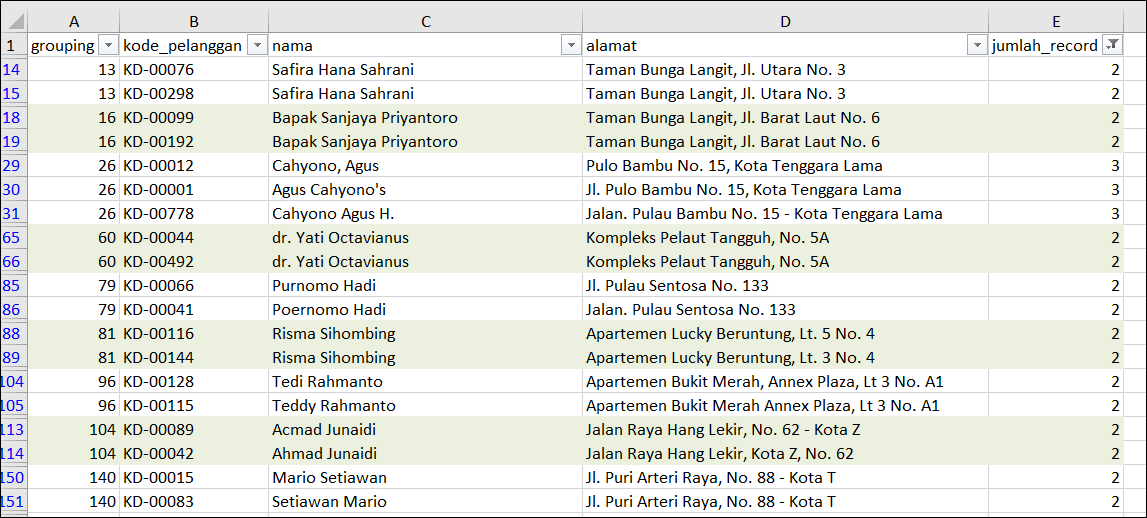

Dari dataset ini kita akan mencari grouping duplikat berdasarkan dua kolom, yaitu nama dan alamat. Karena pada kasus nyata, satu kolom nama tentunya tidak cukup – sebagai contoh untuk kasus perbankan pelaporan ke OJK biasanya melibatkan sampai enam kolom.

In [ ]:
library(RMySQL)
library(stringdist)
library(openxlsx)

#Membuka koneksi
con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

#Mengambil kolom kode_pelanggan, nama dan alamat dari dqlab_messy_data
sql <- "select kode_pelanggan, nama, alamat from dqlab_messy_data"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)

#Inisialisai variable untuk hasil.akhir
hasil.akhir <- NULL

#Inisialiasi variable grouping_no dengan nilai 1
grouping_no <- 1

while(length(data.pelanggan$nama)>0)
{
  #Variable referensi nama dan alamat diambil dari item pertama
  referensi.nama <- data.pelanggan$nama[1]
  referensi.alamat <- data.pelanggan$alamat[1]
  
  #Menghitung jarak antara referensi dengan item-item nama dan alamat
  #gunakan method "cosine" untuk nama, dan method "lv" untuk alamat
  jarak.teks.nama <- stringdist(referensi.nama, data.pelanggan$nama, method="cosine")
  jarak.teks.alamat <- stringdist(referensi.alamat, data.pelanggan$alamat, method="lv")

  #Hasil filter jarak dengan threshold 
  # - lebih kecil sama dengan angka 0.15 untuk nama
  # - lebih kecil dari angka 15 untuk alamat
  #disimpan ke variable filter.jarak
  filter.jarak <- (jarak.teks.nama <= 0.15 & jarak.teks.alamat < 15)

  #Melakukan filtering pada variable data.pelanggan, dan mengambil tiga kolom 
  #untuk disimpan ke tiga variable 
  kode_pelanggan.temp <- data.pelanggan[filter.jarak,]$kode_pelanggan
  nama.temp <- data.pelanggan[filter.jarak,]$nama
  alamat.temp <- data.pelanggan[filter.jarak,]$alamat
  
  #Konstruksi temporary variable
  var.temp <- data.frame(grouping=grouping_no, kode_pelanggan=kode_pelanggan.temp, nama=nama.temp, alamat=alamat.temp, jumlah_record=length(kode_pelanggan.temp))

  #Menggabungkan temporary variable dengan hasil sebelumnya
  hasil.akhir <- rbind(hasil.akhir, var.temp)
  
  #Menggabungkan hasil sebelumnya
  data.pelanggan <- data.pelanggan[!filter.jarak,]

  #Menambahkan nilai grouping untuk diambil pada iterasi selanjutnya
  grouping_no <- grouping_no + 1
}

#Menulis hasil ke file staging.duplikat.awal.xlsx
write.xlsx(hasil.akhir, file="staging.duplikat.awal.xlsx")

#Menutup seluruh koneksi MySQL
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [32]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)
library(sqldf)
library(stringdist)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


# Mengambil data
data.pelanggan <- sqldf("SELECT Kode_Pelanggan as kode_pelanggan, Nama_Lengkap as nama, Alamat as alamat FROM data")


#Inisialisai variable untuk hasil.akhir
hasil.akhir <- NULL

#Inisialiasi variable grouping_no dengan nilai 1
grouping_no <- 1

while(length(data.pelanggan$nama)>0)
{
  #Variable referensi nama dan alamat diambil dari item pertama
  referensi.nama <- data.pelanggan$nama[1]
  referensi.alamat <- data.pelanggan$alamat[1]
  
  #Menghitung jarak antara referensi dengan item-item nama dan alamat
  #gunakan method "cosine" untuk nama, dan method "lv" untuk alamat
  jarak.teks.nama <- stringdist(referensi.nama, data.pelanggan$nama, method="cosine")
  jarak.teks.alamat <- stringdist(referensi.alamat, data.pelanggan$alamat, method="lv")

  #Hasil filter jarak dengan threshold 
  # - lebih kecil sama dengan angka 0.15 untuk nama
  # - lebih kecil dari angka 15 untuk alamat
  #disimpan ke variable filter.jarak
  filter.jarak <- (jarak.teks.nama <= 0.15 & jarak.teks.alamat < 15)

  #Melakukan filtering pada variable data.pelanggan, dan mengambil tiga kolom 
  #untuk disimpan ke tiga variable 
  kode_pelanggan.temp <- data.pelanggan[filter.jarak,]$kode_pelanggan
  nama.temp <- data.pelanggan[filter.jarak,]$nama
  alamat.temp <- data.pelanggan[filter.jarak,]$alamat
  
  #Konstruksi temporary variable
  var.temp <- data.frame(grouping=grouping_no, kode_pelanggan=kode_pelanggan.temp, nama=nama.temp, alamat=alamat.temp, jumlah_record=length(kode_pelanggan.temp))

  #Menggabungkan temporary variable dengan hasil sebelumnya
  hasil.akhir <- rbind(hasil.akhir, var.temp)
  
  #Menggabungkan hasil sebelumnya
  data.pelanggan <- data.pelanggan[!filter.jarak,]

  #Menambahkan nilai grouping untuk diambil pada iterasi selanjutnya
  grouping_no <- grouping_no + 1
}

#Menulis hasil ke file staging.duplikat.awal.xlsx
write.xlsx(hasil.akhir, file="staging.duplikat.awal.byme.xlsx")

Note: zip::zip() is deprecated, please use zip::zipr() instead


## [6] Melakukan Grouping Duplikat dari Dataset Hasil Standarisasi
Subbbab berikut ini hampir sama dengan sebelumnya, kecuali kita menggunakan sumber data yang sudah terstandarisasi yang tersimpan di file Excel staging.final.xlsx.

In [33]:
library(stringdist)
library(openxlsx)

#Membaca file staging.final.xlsx
data.pelanggan <- read.xlsx("staging.final.xlsx")

#Inisialisai variable untuk hasil.akhir
hasil.akhir <- NULL

#Inisialiasi variable grouping_no dengan nilai 1
grouping_no <- 1

while(length(data.pelanggan$nama)>0)
{
  #Variable referensi nama dan alamat diambil dari item pertama
  referensi.nama <- data.pelanggan$nama[1]
  referensi.alamat <- data.pelanggan$alamat[1]
  
  #Menghitung jarak antara referensi dengan item-item nama dan alamat
  #gunakan method "cosine" untuk nama, dan method "lv" untuk alamat
  jarak.teks.nama <- stringdist(referensi.nama, data.pelanggan$nama, method="cosine")
  jarak.teks.alamat <- stringdist(referensi.alamat, data.pelanggan$alamat, method="lv")

  #Hasil filter jarak dengan threshold 
  # - lebih kecil sama dengan angka 0.15 untuk nama
  # - lebih kecil dari angka 15 untuk alamat
  #disimpan ke variable filter.jarak
  filter.jarak <- (jarak.teks.nama <= 0.15 & jarak.teks.alamat < 15)

  #Melakukan filtering pada variable data.pelanggan, dan mengambil tiga kolom 
  #untuk disimpan ke tiga variable 
  kode_pelanggan.temp <- data.pelanggan[filter.jarak,]$kode_pelanggan
  nama.temp <- data.pelanggan[filter.jarak,]$nama
  alamat.temp <- data.pelanggan[filter.jarak,]$alamat
  
  #Konstruksi temporary variable
  var.temp <- data.frame(grouping=grouping_no, kode_pelanggan=kode_pelanggan.temp, nama=nama.temp, alamat=alamat.temp, jumlah_record=length(kode_pelanggan.temp))

  #Menggabungkan temporary variable dengan hasil sebelumnya
  hasil.akhir <- rbind(hasil.akhir, var.temp)
  
  #Menggabungkan hasil sebelumnya
  data.pelanggan <- data.pelanggan[!filter.jarak,]

  #Menambahkan nilai grouping untuk diambil pada iterasi selanjutnya
  grouping_no <- grouping_no + 1
}

#Menulis hasil ke file staging.duplikat.standarisasi.xlsx
write.xlsx(hasil.akhir, file="staging.duplikat.standarisasi.byme.xlsx")

Jika dibuka, difilter berdasarkan data duplikat, dan highlight maka hasilnya terlihat sebagai berikut. Perhatikan jika jumlah grouping duplikat kali ini lebih banyak dari sebelumnya sebanyak dua grouping (ditandai dengan anak panah). Namun ada satu grouping yang sebenarnya salah.

Ini juga contoh yang menunjukkan bahwa otomatisasi tidak bisa 100% akurat.

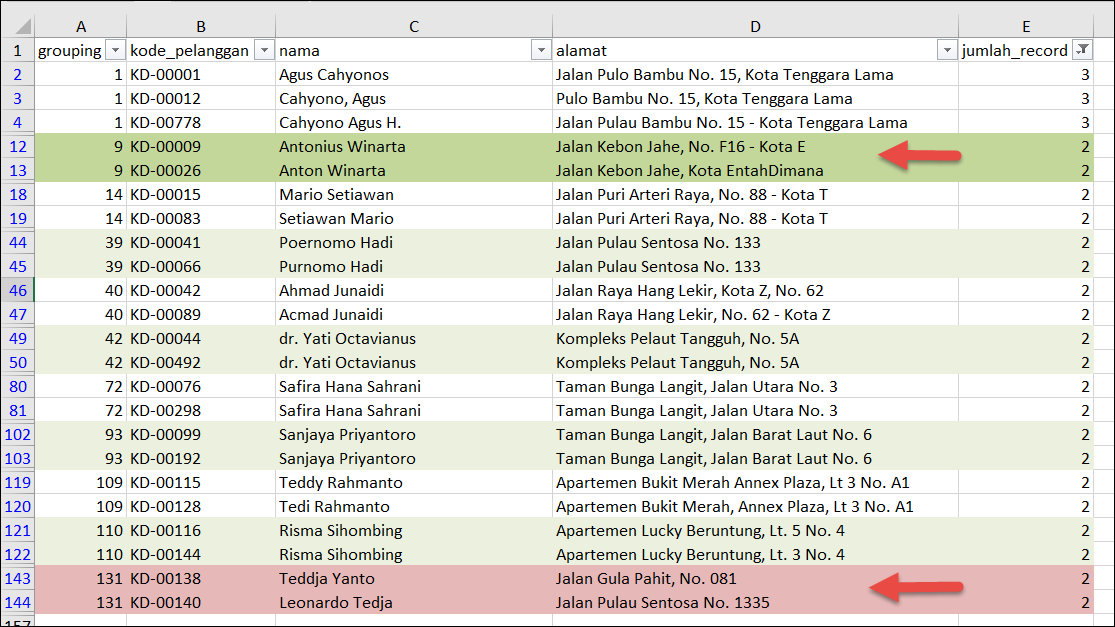

## [7] Kesimpulan
Duplikasi data adalah kondisi dimana dalam suatu dataset terdapat lebih dari satu data yang sebenarnya mewakili satu entity tapi tidak berhasil dikelompokkan menjadi satu.

Keadaan ini dapat berubah menjadi masalah karena bisnis bisa telat menganalisa data karena data tidak dapat dikonsolidasikan dengan baik. Ini berakibat kepada kesempatan bisnis yang hilang _(opportunity lost)_.

Dan sepanjang bab ini kita telah membahas cara mengatasi duplikat ini sebagai berikut:
- Jarak teks _(string distance)_ sebagai dasar untuk mencari data duplikat di dataset dengan menggunakan function stringdist
- Metode-metode jarak teks yang tersedia seperti Cosine, Levenstein, Jaro Winkler, dan lain-lain. Namun untuk praktek kita gunakan dua metode pertama untuk nama dan alamat.
- Algoritma sederhana untuk mencari duplikat di vector.
- Penerapan algoritma pencarian duplikat di dataset kita sebelum dan sesudah standarisasi.
- Terlihat bahwa penerapan standarisasi selain membuat data rapi, juga menaikkan kemungkinan mendapatkan data duplikat.

Penanganan duplikasi ini sebenarnya banyak kaitannya dengan pembuatan master data – yaitu data mewakili objek dan stakeholder bisnis misalkan customer, produk, lokasi, dan lain-lain. Master data ini sedemikian pentingnya sehingga banyak analisa tidak akan berhasil jika buruk kualitas master datanya.

Banyak sekali kasus yang membuat deduplikasi data ini sangat sulit diolah, lebih dari sekedar penerapan algoritma. Tapi bab ini memberi dasar yang baik sehingga Anda mendapatkan pengetahuan __how-to__ dan jalan untuk memulai.

# Data Enrichment
Banyaknya data yang tidak memiliki nilai (missing value) di dataset pelanggan akan mengganggu analisa. Pada bab ini, kita akan coba mempelajari cara mencari nilai yang dapat menggantikan missing value ini.

## [1] Apa itu Data Enrichment?
__Data enrichment__ adalah proses pengisian data yang hilang atau menambah data baik dari sumber internal maupun eksternal dengan cara mengkorelasikan berdasarkan beberapa kolom tertentu sehingga analisa data lebih tajam.

Sebagai contoh, data Nilai Belanja Setahun yang kosong dapat diisi dengan nilai rata-rata (mean) dari keseluruhan data.

Contoh lain, data kodepos yang kosong dapat diisi jika kita memiliki master kode pos. Atau dengan cara mencari dari alamat lain yang mirip dan terisi kode posnya.

## [2] Mengganti missing value dengan nilai mean
Kolom nilai_belanja_setahun dari dataset kita adalah kolom bertipe numerik yang beberapa diantaranya berisi missing value (NA).

Jika kita lihat hasil summary dari kolom nilai_belanja_setahun, tampilannya akan terlihat sebagai berikut.

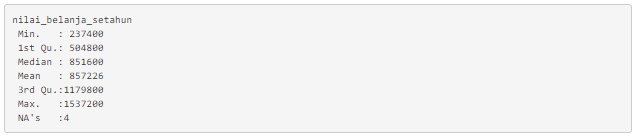

Pada baris terakhir yaitu NA's : 4 menyatakan bahwa kolom ini memiliki empat NA atau missing value. Dan untuk mengisinya, biasa menggunakan nilai rata-rata (mean) atau nilai tengah (median).

Untuk subbab ini, kita akan mengisi dengan nilai rata-rata (mean). Untuk melakukan perhitungan rata-rata kita akan gunakan function mean.

Berikut adalah contoh menghitung nilai mean dengan contoh variable data.pelanggan sebagai perwakilan dataset kita, dan hasilnya disimpan sebagai variable __nilai_rata_rata__.
>```nilai_rata_rata <- mean(data.pelanggan$nilai_belanja_setahun, na.rm=TRUE)```

dimana :
- __nilai_rata_rata__ adalah variable untuk menyimpan hasil function mean.
- __mean__ adalah function yang digunakan untuk menghitung nilai rata-rata.
- __data.pelanggan$nilai_belanja_setahun__ adalah kolom nilai_belanja_setahun.
- __rm = TRUE__ adalah opsi untuk tidak mengikutsertakan missing value. Ini wajib disertakan untuk kasus kita.

Kemudian kita isi ke bagian data frame yang telah filter dulu isi yang memiliki missing value NA function is.na  sebagai berikut.
>```data.pelanggan$nilai_belanja_setahun[is.na(data.pelanggan$nilai_belanja_setahun)] <- nilai_rata_rata```

In [ ]:
library(RMySQL)
library(openxlsx)

con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

sql <- "SELECT kode_pelanggan, nilai_belanja_setahun from dqlab_messy_data"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)

#Melakukan konversi nilai_belanja_setahun menjadi numerik
#karena sebelumnya disimpan dalam bentuk character
data.pelanggan$nilai_belanja_setahun <- as.numeric(data.pelanggan$nilai_belanja_setahun)
summary(data.pelanggan)

#Menghitung rata-rata dengan function mean dan disimpan dalam variable nilai_rata_rata
nilai_rata_rata <- mean(data.pelanggan$nilai_belanja_setahun, na.rm=TRUE)

#Mengisi missing value dengan nilai rata-rata
data.pelanggan$nilai_belanja_setahun[is.na(data.pelanggan$nilai_belanja_setahun)] <- nilai_rata_rata

#Melihat summary setelah missing value
summary(data.pelanggan)

#Menulis ke dalam file staging.enrichment.mean.xlsx
write.xlsx(data.pelanggan, file="staging.enrichment.mean.xlsx")
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [36]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)
library(sqldf)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


# Mengambil data
data.pelanggan <- sqldf("SELECT Kode_Pelanggan as kode_pelanggan, Nilai_Belanja_Setahun as nilai_belanja_setahun FROM data")

#Melakukan konversi nilai_belanja_setahun menjadi numerik
#karena sebelumnya disimpan dalam bentuk character
data.pelanggan$nilai_belanja_setahun <- as.numeric(data.pelanggan$nilai_belanja_setahun)
summary(data.pelanggan)

#Menghitung rata-rata dengan function mean dan disimpan dalam variable nilai_rata_rata
nilai_rata_rata <- mean(data.pelanggan$nilai_belanja_setahun, na.rm=TRUE)

#Mengisi missing value dengan nilai rata-rata
data.pelanggan$nilai_belanja_setahun[is.na(data.pelanggan$nilai_belanja_setahun)] <- nilai_rata_rata

#Melihat summary setelah missing value
summary(data.pelanggan)

#Menulis ke dalam file staging.enrichment.mean.xlsx
write.xlsx(data.pelanggan, file="staging.enrichment.mean.byme.xlsx")

 kode_pelanggan     nilai_belanja_setahun
 Length:155         Min.   : 237400      
 Class :character   1st Qu.: 504800      
 Mode  :character   Median : 851600      
                    Mean   : 857227      
                    3rd Qu.:1179800      
                    Max.   :1537200      
                    NA's   :4            

 kode_pelanggan     nilai_belanja_setahun
 Length:155         Min.   : 237400      
 Class :character   1st Qu.: 520000      
 Mode  :character   Median : 857227      
                    Mean   : 857227      
                    3rd Qu.:1168250      
                    Max.   :1537200      

Ada summary dari dua kolom yang ditampilkan, terlihat untuk nilai_belanja_setahun sudah tidak ada missing value dan nilai mean masih sama dengan sebelumnya (lihat Lesson) tetapi nilai median menjadi berbeda.

## [3] Mengganti missing value dengan nilai median
Subbab ini hampir sama penjelasannya dengan subbab sebelumnya. Kita akan mengambil kembali dataset nilai_belanja_setahun dengan empat nilai missing value awal (seperti pada bagian sebelumnya).


Kali ini kita akan mengisi dengan nilai tengah (median). Untuk melakukan perhitungan rata-rata kita akan gunakan function __median__.

Berikut adalah contoh menghitung nilai mean dengan contoh variable __data.pelanggan__ sebagai perwakilan dataset kita, dan hasilnya disimpan sebagai variable __nilai_tengah__.
>```nilai_tengah <- median(data.pelanggan$nilai_belanja_setahun, na.rm=TRUE)```

dimana :
- __nilai_tengah__ adalah variable untuk menyimpan hasil function median.
- __median__ adalah function yang digunakan untuk menghitung nilai rata-rata.
- __data.pelanggan$nilai_belanja_setahun__ adalah kolom nilai_belanja_setahun.
- __rm = TRUE__ adalah opsi untuk tidak mengikutsertakan missing value. Ini wajib disertakan untuk kasus kita.

Kemudian kita isi ke bagian data frame yang telah filter dulu isi yang memiliki missing value NA function is.na  sebagai berikut.
> ```data.pelanggan$nilai_belanja_setahun[is.na(data.pelanggan$nilai_belanja_setahun)] <- nilai_tengah```

In [ ]:
library(RMySQL)
library(openxlsx)

con <- dbConnect(MySQL(), user="demo", password="demo", host="mysqlhost",
                 dbname="dqlabdatawrangling")

sql <- "SELECT kode_pelanggan, nilai_belanja_setahun from dqlab_messy_data"

rs <- tryCatch(dbSendQuery(con, sql), finally = print("query ok"))
data.pelanggan <- fetch(rs, n=-1)
dbClearResult(rs)

#Melakukan konversi nilai_belanja_setahun menjadi numerik
#karena sebelumnya disimpan dalam bentuk character
data.pelanggan$nilai_belanja_setahun <- as.numeric(data.pelanggan$nilai_belanja_setahun)
summary(data.pelanggan)

#Menghitung nilai tengah dengan function median dan disimpan dalam variable nilai_tengah
nilai_tengah <- median(data.pelanggan$nilai_belanja_setahun, na.rm=TRUE)

#Mengisi missing value dengan nilai tengah
data.pelanggan$nilai_belanja_setahun[is.na(data.pelanggan$nilai_belanja_setahun)] <- nilai_tengah

#Melihat summary setelah missing value
summary(data.pelanggan)

#Menulis ke dalam file staging.enrichment.mean.xlsx
write.xlsx(data.pelanggan, file="staging.enrichment.median.xlsx")
all_cons <- dbListConnections(MySQL())
for(con in all_cons)
    + dbDisconnect(con)

In [38]:
# (Bukan dari DQLab)
# Karena datanya belum ada di server MySQLku, makanya datanya kita coba pakai file excel
library(openxlsx)
library(sqldf)

# Membaca dataset pelanggan
data <- read.xlsx("data.pelanggan.dengan.pola.xlsx", sheet="Sheet 1")

# karena tanda titik tidak bisa dibaca di SQL,maka diubah menjadi tanda underscore("." change to "_")
colnames(data) <- gsub("\\.","_",colnames(data))


# Mengambil data
data.pelanggan <- sqldf("SELECT Kode_Pelanggan as kode_pelanggan, Nilai_Belanja_Setahun as nilai_belanja_setahun FROM data")

#Melakukan konversi nilai_belanja_setahun menjadi numerik
#karena sebelumnya disimpan dalam bentuk character
data.pelanggan$nilai_belanja_setahun <- as.numeric(data.pelanggan$nilai_belanja_setahun)
summary(data.pelanggan)

#Menghitung nilai tengah dengan function median dan disimpan dalam variable nilai_tengah
nilai_tengah <- median(data.pelanggan$nilai_belanja_setahun, na.rm=TRUE)

#Mengisi missing value dengan nilai tengah
data.pelanggan$nilai_belanja_setahun[is.na(data.pelanggan$nilai_belanja_setahun)] <- nilai_tengah

#Melihat summary setelah missing value
summary(data.pelanggan)

#Menulis ke dalam file staging.enrichment.mean.xlsx
write.xlsx(data.pelanggan, file="staging.enrichment.median.byme.xlsx")

 kode_pelanggan     nilai_belanja_setahun
 Length:155         Min.   : 237400      
 Class :character   1st Qu.: 504800      
 Mode  :character   Median : 851600      
                    Mean   : 857227      
                    3rd Qu.:1179800      
                    Max.   :1537200      
                    NA's   :4            

 kode_pelanggan     nilai_belanja_setahun
 Length:155         Min.   : 237400      
 Class :character   1st Qu.: 520000      
 Mode  :character   Median : 851600      
                    Mean   : 857081      
                    3rd Qu.:1168250      
                    Max.   :1537200      

Ada summary dari dua kolom yang ditampilkan, terlihat untuk nilai_belanja_setahun sudah tidak ada missing value dan nilai median masih sama dengan sebelumnya (lihat Lesson) tetapi nilai mean berbeda.

## [4] Melakukan enrichment Kode Pos
Enrichment selanjutnya sekaligus yang terakhir yang akan kita akan lakukan adalah kode_pos.

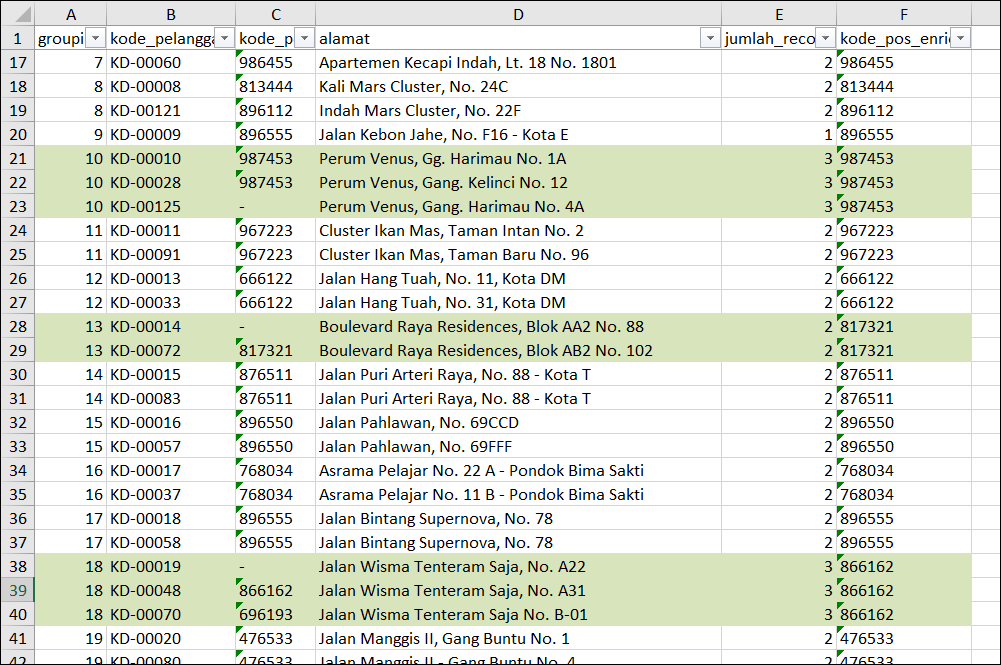

Hal pertama yang kita lakukan adalah mencari duplikat. Untuk contoh pada praktek ini kita gunakan satu kolom saja, yaitu alamat dan dengan threshold yang lebih ketat yaitu angka 10 .

Catatan: pada praktek sebelumnya kita menggunakan angka 15.

Hal kedua yang perlu kita lakukan adalah mencari nomor grouping dari kode pos yang kosong. Kemudian berdasarkan grouping, kita ambil kode pos yang tidak kosong.

Ini adalah pendekatan sederhana setelah kita mengenal proses duplikasi namun cukup panjang. Mari kita langsung lakukan tugas praktek untuk memahaminya.

In [49]:
library(stringdist)
library(openxlsx)

#Membaca file staging.final.xlsx
data.pelanggan <- read.xlsx("staging.final.xlsx")

str(data.pelanggan)

#------------------- 1. PERSIAPAN: MENEMUKAN DUPLIKASI ALAMAT -----------------------
#Konversi Factor
data.pelanggan$kode_pos <- as.factor(data.pelanggan$kode_pos)

#Inisialiasi variable grouping_no dengan nilai 1
grouping_no <- 1

#Inisialisasi hasil.akhir
hasil.akhir <- NULL

while(length(data.pelanggan$alamat)>0)
{
  #Variable referensi alamat diambil dari item pertama
  referensi.alamat <- data.pelanggan$alamat[1]
  
  #Menghitung jarak antara referensi dengan item alamat dengan method "lv" 
  jarak.teks.alamat <- stringdist(referensi.alamat, data.pelanggan$alamat, method="lv")

  #Hasil filter jarak dengan threshold 
  # - lebih kecil dari angka 10 untuk alamat
  #disimpan ke variable filter.jarak
  filter.jarak <- (jarak.teks.alamat < 10)

  #Melakukan filtering pada variable data.pelanggan, dan mengambil dua kolom 
  #untuk disimpan ke dua variable 
  kode_pelanggan.temp <- data.pelanggan[filter.jarak,]$kode_pelanggan
  alamat.temp <- data.pelanggan[filter.jarak,]$alamat
  kode_pos.temp <- data.pelanggan[filter.jarak,]$kode_pos
  
  #Konstruksi temporary variable
  var.temp <- data.frame(grouping=grouping_no, kode_pelanggan=kode_pelanggan.temp, kode_pos=kode_pos.temp, alamat=alamat.temp, jumlah_record=length(kode_pelanggan.temp))

  #Menggabungkan temporary variable dengan hasil sebelumnya
  hasil.akhir <- rbind(hasil.akhir, var.temp)
  
  #Membuang porsi yang sudah ditemukan
  data.pelanggan <- data.pelanggan[!filter.jarak,]

  #Menambahkan nilai grouping untuk diambil pada iterasi selanjutnya
  grouping_no <- grouping_no + 1
}
hasil.akhir
summary(hasil.akhir$kode_pos)
#----------------- 2. MENGISI KODE POS YANG KOSONG --------------------
#Inisialisasi kolom baru kode pos
hasil.akhir$kode_pos_enrich <-hasil.akhir$kode_pos 

#Mengambil nomor grouping kode pos yang kosong
kode_pos_kosong <- hasil.akhir[hasil.akhir$kode_pos == "-",]

while(length(kode_pos_kosong$kode_pos)>0)
{
	grouping_no <- kode_pos_kosong$grouping[1]
	#Membuat variable filter 
	filter.data <- hasil.akhir$grouping == grouping_no & hasil.akhir$kode_pos != "-" 
	#Mengambil data pertama dari hasil filter dengan function head
	temp.data <- head(hasil.akhir[filter.data,],1)
  	#Mengisi kolom kode_pos_enrich dengan kolom kode_pos yang ditemukan
hasil.akhir[hasil.akhir$grouping == grouping_no,]$kode_pos_enrich <- temp.data$kode_pos
  
    #Menghapus row pertama dari variable kode_pos_kosong
    kode_pos_kosong <- kode_pos_kosong[-1,]
}
hasil.akhir
summary(hasil.akhir$kode_pos_enrich)

#Menulis hasil ke file staging.enrichment.kode_pos.xlsx
write.xlsx(hasil.akhir, file="staging.enrichment.kode_pos.byme.xlsx")


'data.frame':	155 obs. of  9 variables:
 $ kode_pelanggan    : chr  "KD-00001" "KD-00002" "KD-00003" "KD-00004" ...
 $ nama              : chr  "Agus Cahyonos" "Khairul Nissa" "Slamet Wiyanto" "DRS. Maria Simangunsong" ...
 $ alamat            : chr  "Jalan Pulo Bambu No. 15, Kota Tenggara Lama" "Taman Vivo Indah, Blok AA No. 7" "Meta Residences, No. 32C" "Gang Bulan Desember III, No. 9" ...
 $ no_telepon        : chr  "08298911112222" "+6287132221371404" "+6285725955303368" "+6283376770990635" ...
 $ anomali_no_telepon: logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ kode_pos          : chr  "876511" "712983" "764550" "967220" ...
 $ tanggal_lahir     : chr  "08-02-1967" "23-10-1991" "23-11-1962" "17-02-2097" ...
 $ umur              : num  51.2 26.5 55.5 -78.9 31.7 ...
 $ umur_valid        : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


grouping,kode_pelanggan,kode_pos,alamat,jumlah_record
1,KD-00001,876511,"Jalan Pulo Bambu No. 15, Kota Tenggara Lama",4
1,KD-00012,876511,"Pulo Bambu No. 15, Kota Tenggara Lama",4
1,KD-00045,876511,"Pulo Bambu No. 57, Kota Tenggara Lama",4
1,KD-00778,876511,Jalan Pulau Bambu No. 15 - Kota Tenggara Lama,4
2,KD-00002,712983,"Taman Vivo Indah, Blok AA No. 7",2
2,KD-00075,712983,"Taman Vivo Indah, Blok AA No. 7",2
3,KD-00003,764550,"Meta Residences, No. 32C",2
3,KD-00043,764550,"Meta Residences, No. 1A",2
4,KD-00004,967220,"Gang Bulan Desember III, No. 9",3
4,KD-00071,967220,"Gang Bulan Desember III, No. 155",3


- 321321 349922 349981 476511 476533 487451 487851 511431 511432 567120 
     5      8      1      2      2      2      1      1      2      2      3 
567130 567151 633429 633430 633431 666122 666123 696193 712983 712984 764449 
     3      2      2      1      1      3      1      9      2      6      2 
764450 764550 768031 768034 768035 768091 811613 813442 813444 817321 817324 
     2      2      2      2      1      2      3      3      1      1      1 
866162 876511 876512 876551 876552 876612 876614 877521 877613 877614 877615 
     1      6      1      2      2      2      1      3      1      1      1 
893422 896112 896113 896114 896115 896549 896550 896555 896566 967220 967221 
     1      1      1      1      1      8      2      7      1      3      2 
967222 967223 967224 967229 986454 986455 986456 987451 987452 987453 987601 
     1      3      1      2      1      8      2      1      2      2      2

grouping,kode_pelanggan,kode_pos,alamat,jumlah_record,kode_pos_enrich
1,KD-00001,876511,"Jalan Pulo Bambu No. 15, Kota Tenggara Lama",4,876511
1,KD-00012,876511,"Pulo Bambu No. 15, Kota Tenggara Lama",4,876511
1,KD-00045,876511,"Pulo Bambu No. 57, Kota Tenggara Lama",4,876511
1,KD-00778,876511,Jalan Pulau Bambu No. 15 - Kota Tenggara Lama,4,876511
2,KD-00002,712983,"Taman Vivo Indah, Blok AA No. 7",2,712983
2,KD-00075,712983,"Taman Vivo Indah, Blok AA No. 7",2,712983
3,KD-00003,764550,"Meta Residences, No. 32C",2,764550
3,KD-00043,764550,"Meta Residences, No. 1A",2,764550
4,KD-00004,967220,"Gang Bulan Desember III, No. 9",3,967220
4,KD-00071,967220,"Gang Bulan Desember III, No. 155",3,967220


- 321321 349922 349981 476511 476533 487451 487851 511431 511432 567120 
     0      8      1      2      2      2      1      1      2      2      3 
567130 567151 633429 633430 633431 666122 666123 696193 712983 712984 764449 
     3      2      2      1      1      3      1      8      2      6      2 
764450 764550 768031 768034 768035 768091 811613 813442 813444 817321 817324 
     2      2      2      2      1      3      3      3      1      2      1 
866162 876511 876512 876551 876552 876612 876614 877521 877613 877614 877615 
     3      6      1      2      2      2      1      3      1      1      1 
893422 896112 896113 896114 896115 896549 896550 896555 896566 967220 967221 
     1      1      1      1      1      8      2      7      1      3      2 
967222 967223 967224 967229 986454 986455 986456 987451 987452 987453 987601 
     1      3      1      2      1      9      2      1      2      3      2

Perhatikan bahwa pada grouping yang sama (group 18 dengan apply threshold pada alamat) memiliki dua kode pos yang berbeda. Ini hal yang lumrah di kasus nyata, dan kembali menunjukkan proses pencarian duplikasi akurasinya tidak bisa 100 persen. Tapi ada kemungkinan lain, mungkin kode pos yang salah tulis? Ini dapat kita periksa setelah ada output lengkap dengan alamat.

Tapi selalu bisa ditingkatkan dengan membuat sistem yang lebih komplek – seperti yang telah kita bahas di penutupan bab sebelumnya.

Pada hasilnya (file excel) diberikan dua kolom kode pos, sebelum dan sesudah di-enrich sehingga Anda dapat membandingkannya dengan manual. Cobalah perhatikan untuk grouping 18, dimana Jalan  Wisma ada blok A dan B, dengan kode pos yang sangat ekstrem berbeda. Ini dapat menjadi insight Anda untuk melakukan pengecekan data ke sumber data lebih lanjut.

Tapi tentunya dengan otomatisasi ini sudah meningkatkan produktivitas pembersihan data Anda dengan sangat tinggi.

## [5] Konsolidasi Data Akhir
Tiba saatnya kita menggabungkan seluruh hasil berikut. Skenario konsolidasi sumber data kita adalah sebagai berikut :
- Hasil enrichment (di dalamnya sudah ada informasi grouping duplikat).
    - Enrichment untuk nilai belanja setahun dengan metode mean, yang median tidak kita ambil – file dengan nama __enrichment.mean.xlsx__.
    - Enrichment untuk nilai kode pos – file dengan nama __enrichment.kode_pos.xlsx__.
- Hasil standarisasi – file dengan nama __final.xlsx__.

Kesemua file tersebut memiliki kolom kode_pelanggan yang menjadi key atau kunci untuk menggabungkan seluruh file tersebut dengan function __merge__.

Berbeda dengan sebelumnya, function merge kali ini ada yang mengambil field-field tertentu saja.

In [50]:
library(openxlsx)

#Membaca file staging.enrichment.mean.xlsx dan menyimpannnya dalam variable staging.enrichment.mean
staging.enrichment.mean <- read.xlsx("staging.enrichment.mean.xlsx")

#Membaca file staging.enrichment.kode_pos.xlsx dan menyimpannnya dalam variable staging.enrichment.kode_pos
staging.enrichment.kode_pos <- read.xlsx("staging.enrichment.kode_pos.xlsx")

#Membaca file staging.final.xlsx dan menyimpannnya dalam variable staging.final
staging.final <- read.xlsx("staging.final.xlsx")

staging.enrichment.mean

#Membaca file staging.enrichment.kode_pos.xlsx dan menyimpannnya dalam variable staging.enrichment.kode_pos
staging.enrichment.kode_pos <- read.xlsx("staging.enrichment.kode_pos.xlsx")
#Ambil field, kode_pelanggan, dan kode_pos_enrich saja
staging.enrichment.kode_pos <- staging.enrichment.kode_pos[,c("kode_pelanggan", "kode_pos_enrich", "grouping")]
staging.enrichment.kode_pos

#Membaca file staging.final.xlsx dan menyimpannnya dalam variable staging.final
staging.final <- read.xlsx("staging.final.xlsx")

#Menggabungkan variable staging.enrichment.mean dengan staging.enrichment.kode_pos melalui kolom kode_pelanggan
hasil.final <- merge(x=staging.enrichment.mean, y=staging.enrichment.kode_pos, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)

#Menggabungkan variable staging.final dengan hasil.final melalui kolom kode_pelanggan
hasil.final <- merge(x=staging.final, y=hasil.final, by.x = "kode_pelanggan", by.y = "kode_pelanggan", all = TRUE)
hasil.final

#Menulis hasil ke file staging.final.xlsx
write.xlsx(hasil.final, file="hasil.final.byme.xlsx") 


kode_pelanggan,nilai_belanja_setahun
KD-00032,1275600
KD-00053,317800
KD-00133,1537200
KD-00056,1524700
KD-00111,655400
KD-00036,1444400
KD-00126,350400
KD-00137,354600
KD-00046,541300
KD-00027,536000


kode_pelanggan,kode_pos_enrich,grouping
KD-00001,876511,1
KD-00012,876511,1
KD-00045,876511,1
KD-00778,876511,1
KD-00002,712983,2
KD-00075,712983,2
KD-00003,764550,3
KD-00043,764550,3
KD-00004,967220,4
KD-00071,967220,4


kode_pelanggan,nama,alamat,no_telepon,anomali_no_telepon,kode_pos,tanggal_lahir,umur,umur_valid,nilai_belanja_setahun,kode_pos_enrich,grouping
KD-00001,Agus Cahyonos,"Jalan Pulo Bambu No. 15, Kota Tenggara Lama",08298911112222,TRUE,876511,08-02-1967,51.24932,TRUE,1082900,876511,1
KD-00002,Khairul Nissa,"Taman Vivo Indah, Blok AA No. 7",+6287132221371404,FALSE,712983,23-10-1991,26.52877,TRUE,1336200,712983,2
KD-00003,Slamet Wiyanto,"Meta Residences, No. 32C",+6285725955303368,FALSE,764550,23-11-1962,55.46301,TRUE,601700,764550,3
KD-00004,DRS. Maria Simangunsong,"Gang Bulan Desember III, No. 9",+6283376770990635,FALSE,967220,17-02-2097,-78.86575,TRUE,451500,967220,4
KD-00005,Prihatin Setyonugroho,"Jalan Tegal Sari Indah, No. D87 -- Kota H",+6286843623971825,FALSE,476511,19-08-1986,31.70959,TRUE,1488900,476511,5
KD-00006,DR. Candra Wijaya,"Perum Pluto, Blok C No. 1",+6284063423953696,FALSE,487851,05-09-1990,27.66027,TRUE,257100,487851,6
KD-00007,"Indra Kurniawan, ST","Apartemen Kecapi Indah, Lt. 16 No. 1610",+6283840529196797,FALSE,986455,23-10-1979,38.53699,TRUE,805900,986455,7
KD-00008,Willy Sanjaya,"Kali Mars Cluster, No. 24C",+6285312577710538,FALSE,813444,22-07-1973,44.79452,TRUE,879800,813444,8
KD-00009,Antonius Winarta,"Jalan Kebon Jahe, No. F16 - Kota E",+6282722234294686,FALSE,896555,NA,NA,NA,272600,896555,9
KD-00010,"Sri Wahyuni, Ir","Perum Venus, Gg. Harimau No. 1A",+6284079659289143,FALSE,987453,23-10-1991,26.52877,TRUE,389400,987453,10


Jika berjalan dengan lancar, maka outputnya adalah satu file bernama "hasil.final.xlsx" yang jika dibuka dengan Excel tampilannya adalah sebagai berikut.

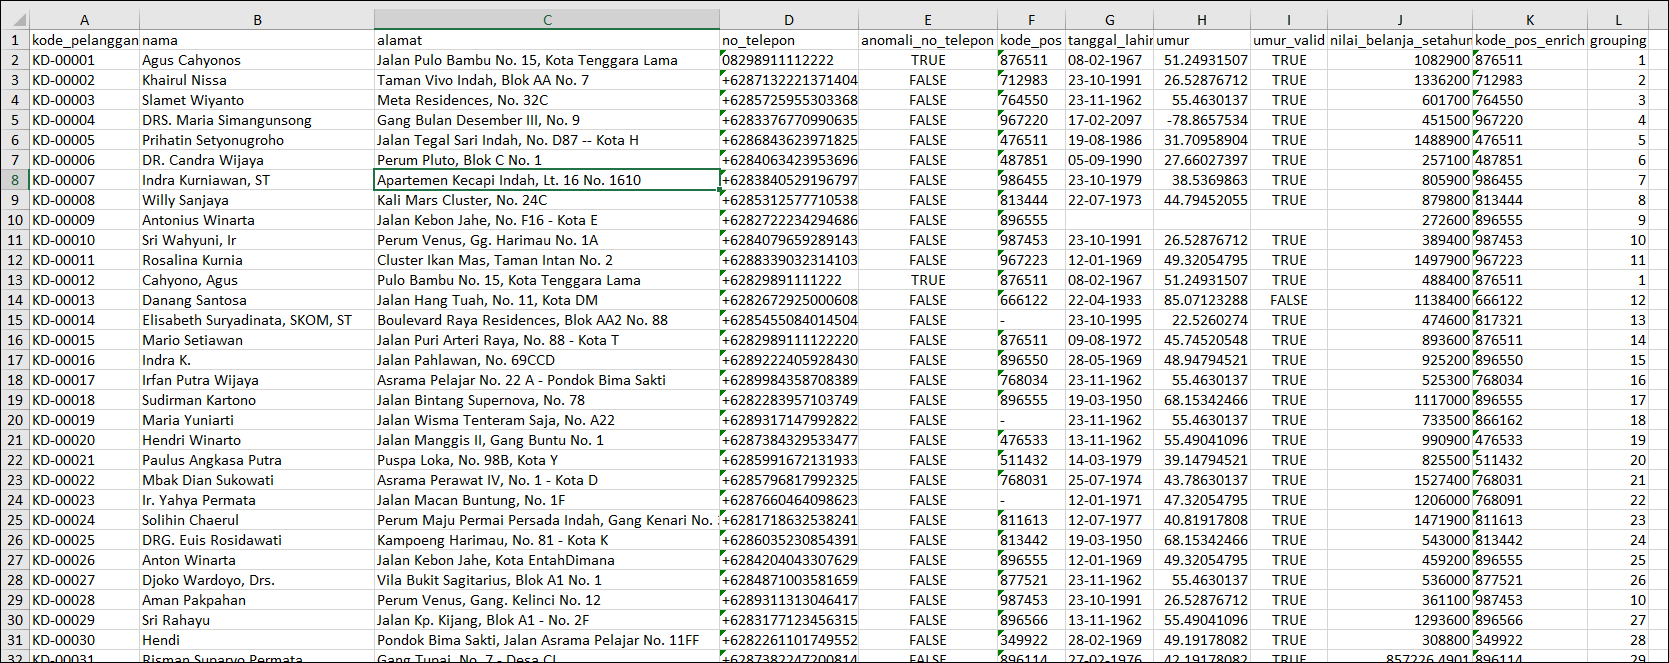

Terlihat data jauh lebih rapi dengan lebih banyak informasi seperti infomasi anomali no telepon, umur dan apakah umur valid atau ga, kemudian informasi duplikat, dan missing value yang telah disii untuk kolom kode pos dan nilai belanja setahun.

## [6] Kesimpulan
__Data enrichment__ adalah proses pengisian data yang hilang atau menambah data baik dari sumber internal maupun eksternal dengan cara mengkorelasikan berdasarkan beberapa kolom tertentu sehingga analisa data lebih tajam.

Pendekatan pada bab ini menunjukkan bagaimana menggunakan teknik grouping duplikat juga memungkinkan kita melakukan enrichment.

Kita telah melakukan hal-hal berikut pada bab ini :
- Kolom __nilai_belanja_setahun__ yang kosong diisi dengan perhitungan nilai rata-rata menggunakan function __mean__ dan atau nilai tengah menggunakan function __median__.
- Data __kodepos__ yang kosong diisi dengan langkah melakukan grouping duplikat dari kolom alamat.
Dan pada bagian terakhir kita juga mengkonsolidasikan seluruh data mulai dari hasil standarisasi, grouping duplikat dan pengisian missing value.

Hasil konsolidasi terlihat jauh lebih rapi dengan lebih banyak informasi seperti infomasi anomali no telepon, umur dan apakah umur valid atau ga, kemudian informasi duplikat, dan missing value yang telah disii untuk kolom kode pos dan nilai belanja setahun.

Hasil ini tentunya akan membantu para analis mengolah data dengan tingkat kepercayaan diri lebih tinggi.

# Kesimpulan Data Wrangling with R (Part 2)
Kesimpulan sekaligus penutup bab "Data Wrangling with R - Part 2"

## [1] Bab Penutup
Selamat, Anda telah menyelesaikan course Data Wrangling with R – Part 2. Salah satu course terpenting di DQLab. Dikatakan demikian karena fokus bab ini yang ke arah profiling, cleansing, deduplikasi dan enrichment – adalah proses yang paling banyak dibutuhkan sebelum analis dapat melakukan tugasnya.

Oleh sebab itu DQLab memfokuskan bab ini dengan contoh yang sangat intensif sehingga Anda mendapatkan Skillset untuk melakukan 80 persen problem di data analytic ini.

Sejauh ini Anda telah melakukan hal berikut :
- __Contoh Dataset "Kotor"__ : Perkenalan contoh dataset master pelanggan yang sengaja dirancang dengan "kotor" atau mengandung isi yang tidak standar – menyerupai kondisi riil yang banyak ditemukan oleh tim DQLab selama terlibat dalam proyek-proyek pengolahan data di Indonesia.
- __Profiling__ : Bagaimana mengidentifikasi pola dataset kita sebelum tau apa yang perlu dibersihkan atau dirapikan dengan menggunakan package __bpa__.
- __Membaca Database Relasional__ : Bagaimana mengakses dari sistem database dengan memperkenalkan objek-objek database dan bahasa SQL (Structured Query Language) dengan menggunakan package RMySQL.
- __Data Cleansing – Standarisasi__ : Bagaimana melakukan perapian isi berbagai tipe data dengan menggunakan fungsi-fungsi transformasi data dengan menggunakan gabungan berbagai function seperti gsub, trimws, colsplit dibantu dengan penerapan Regular Expression (regex).
- __Data Cleansing – Missing Value__ : Bagaimana mengisi missing value pada kolom numerik dengan menggunakan metode pengisian nilai rata-rata (mean) dan nilai tengah (median).
- __Data Cleansing – Deduplikasi__ : Menemukan data yang redundancy dan melakukan grouping terhadap data yang redundan.
- __Data Enrichment__ : Bagaimana melengkapi data kosong dengan melengkapi data kosong dengan melakukan lookup dari internal data.

## [2] What Next?
Data wrangling mencakup area yang sangat luas. Dari sisi sumber data yang perlu dikonsumsi seperti :
- file dbf – merupakan file sistem dbase, clipper, foxpro yang masih banyak digunakan di Indonesia.
- artikel web – crawling.
- email – teks dan gambar.
- gambar / foto yang berisi teks.
- dan lain-lain.

Selain itu, algoritma yang digunakan pada contoh R ini cocok untuk banyak kasus. Namun dengan makin kompleksnya data dari sisi jumlah dan kecepatan penambahan data, maka kemampuan penanganan ini perlu otomatisasi atau kalau tidak akan memakan waktu perusahaan atau organisasi sehingga tujuan akhir – berupa informasi yang diceritakan oleh data – tidak dapat tercapai.

Untuk mengatasinya, sistem dengan pengembangan produk dan template manajemen data yang baik sudah tidak bisa ditawar.